In [34]:
#import training data 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
import torch
from torch.utils.data import DataLoader, TensorDataset
import pytorch_lightning as pl
from torch import nn
import torch.nn.functional as F
from pytorch_lightning import Trainer
from pytorch_lightning.callbacks import EarlyStopping
import torch
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import optuna
from pytorch_lightning import Trainer
from pytorch_lightning.callbacks import EarlyStopping
from optuna.integration import PyTorchLightningPruningCallback
import tensorboard
import tensorboardX
from pytorch_lightning.loggers import TensorBoardLogger


c:\Users\vinay\anaconda3\envs\myenv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Importing Data

In [35]:
df_train = pd.read_csv("C:/Users/vinay/Downloads/house-prices-advanced-regression-techniques/train.csv")


In [3]:
# Check the first 5 rows
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## EDA Analysis

<Axes: xlabel='SalePrice', ylabel='Count'>

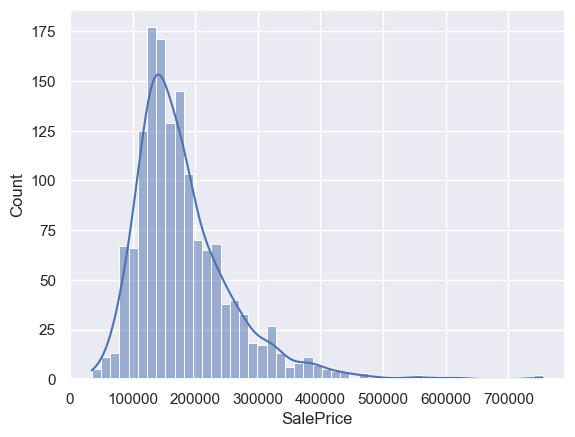

In [294]:
# Check the distribution of the target variable data
sns.histplot(df_train['SalePrice'], kde=True)

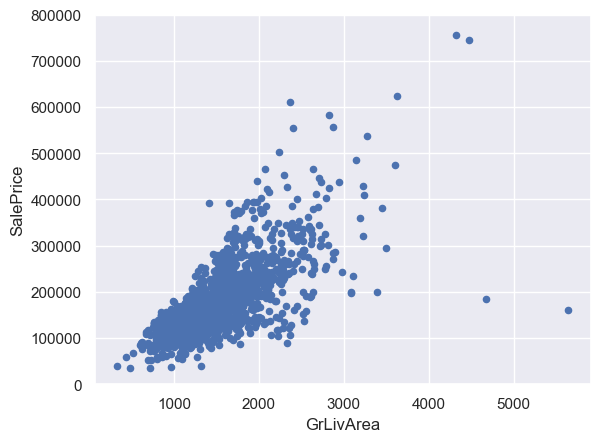

In [295]:
#scatter plot grlivarea/saleprice
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [296]:
df_train.columns 

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

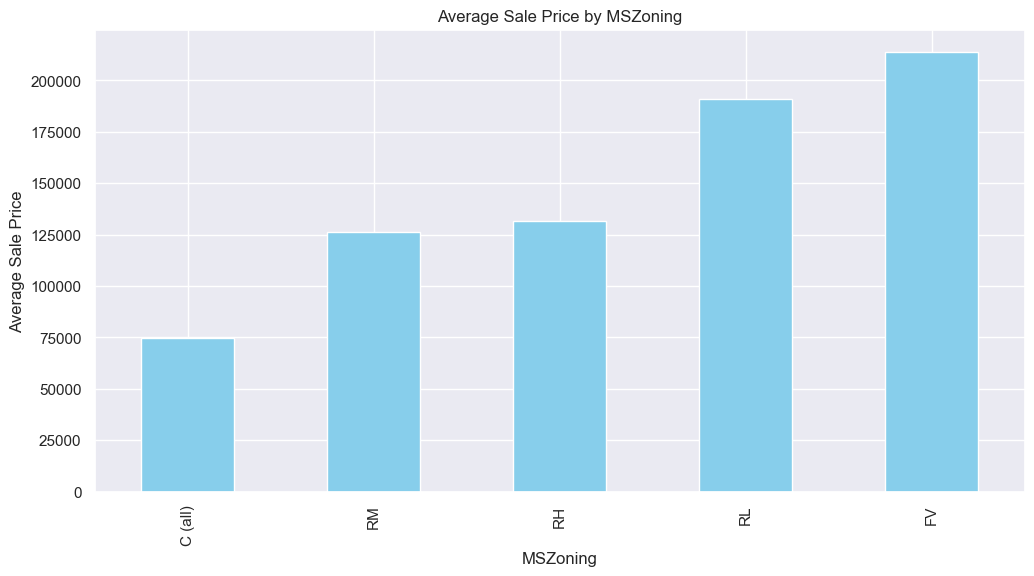

In [297]:
# Sales price by Mszoning
# Calculate average sale price per MSSubClass
avg_prices = df_train.groupby('MSZoning')['SalePrice'].mean().sort_values()

# Create bar chart
plt.figure(figsize=(12, 6))
avg_prices.plot(kind='bar', color='skyblue')
plt.title('Average Sale Price by MSZoning')
plt.xlabel('MSZoning')
plt.ylabel('Average Sale Price')
plt.grid(True)
plt.show()

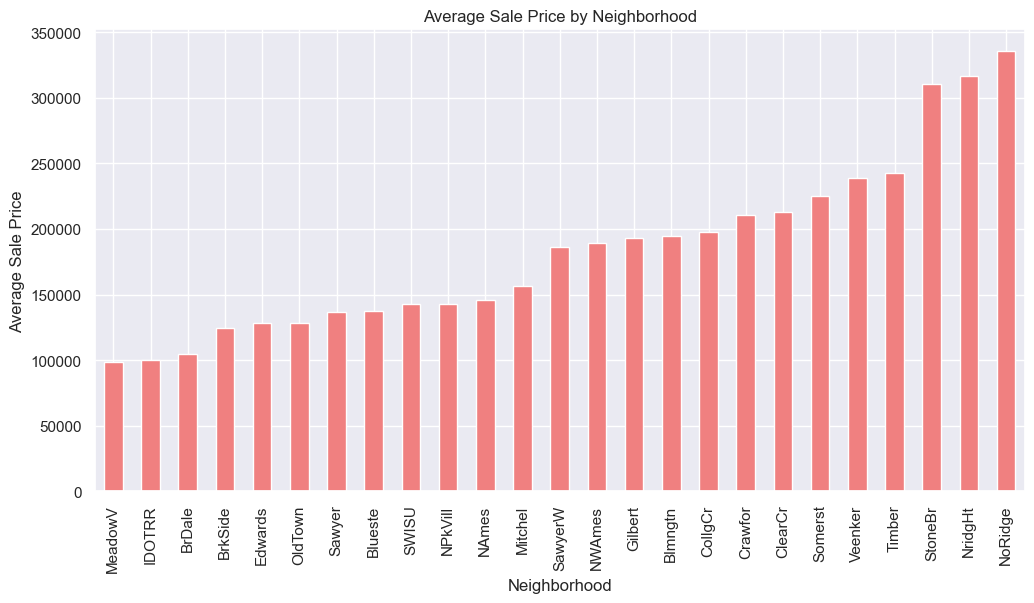

In [298]:
#sales price by neighborhood
# Calculate average sale price per Neighborhood
avg_prices = df_train.groupby('Neighborhood')['SalePrice'].mean().sort_values()

# Create bar chart
plt.figure(figsize=(12, 6))
avg_prices.plot(kind='bar', color='lightcoral')
plt.title('Average Sale Price by Neighborhood') 
plt.xlabel('Neighborhood')
plt.ylabel('Average Sale Price')
plt.grid(True)
plt.show()

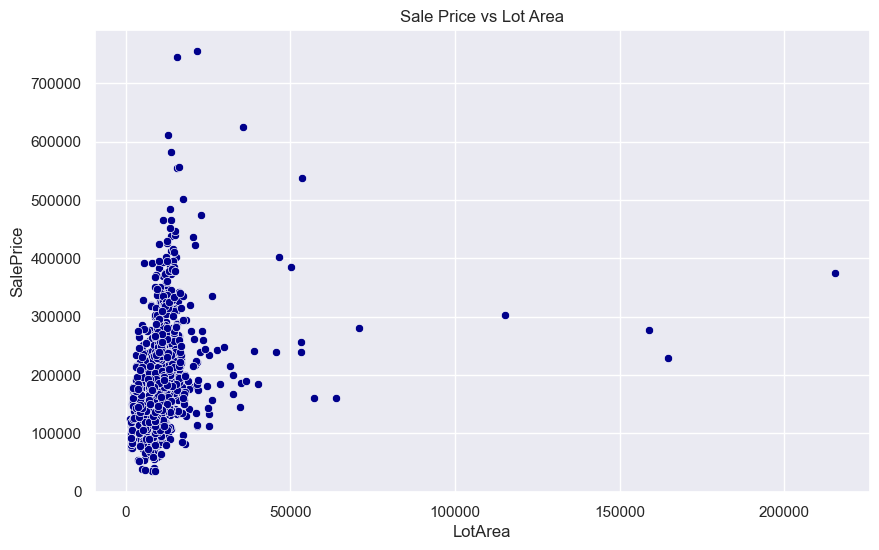

In [299]:
#Scatter Plot of Sale Price against Lot Area
plt.figure(figsize=(10,6))
sns.scatterplot(x='LotArea', y='SalePrice', data=df_train, color='darkblue')
plt.title('Sale Price vs Lot Area')
plt.show()


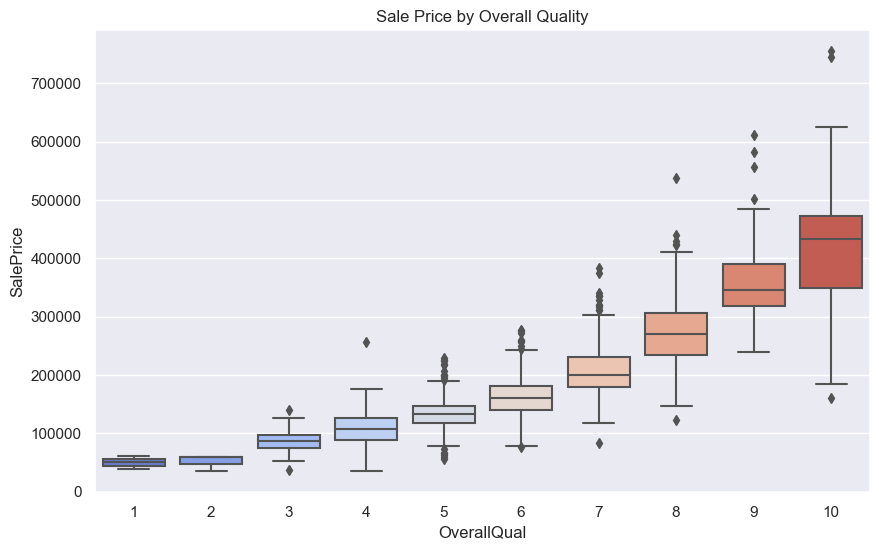

In [300]:
#Box Plot of Sale Price by Overall Quality
plt.figure(figsize=(10,6))
sns.boxplot(x='OverallQual', y='SalePrice', data=df_train, palette='coolwarm')
plt.title('Sale Price by Overall Quality')
plt.show()

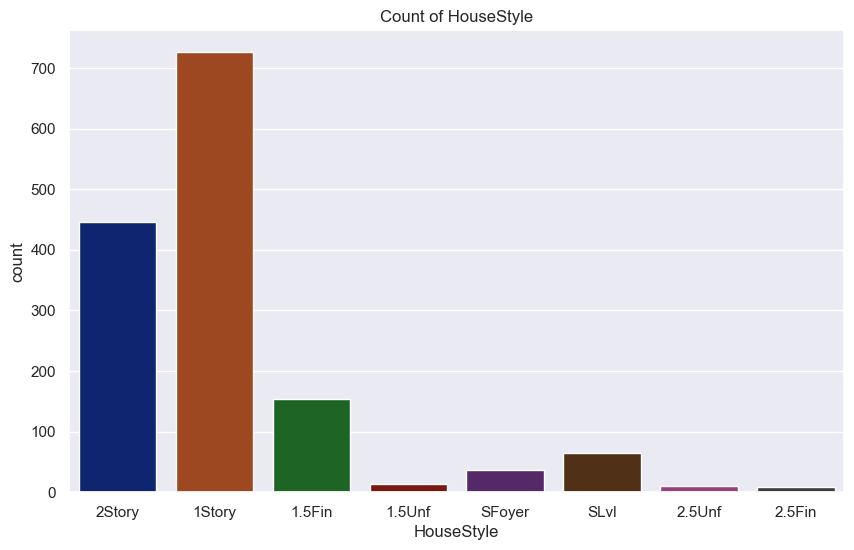

In [301]:
#Count of HouseStyle
plt.figure(figsize=(10,6))
sns.countplot(x='HouseStyle', data=df_train, palette='dark')
plt.title('Count of HouseStyle')
plt.show()


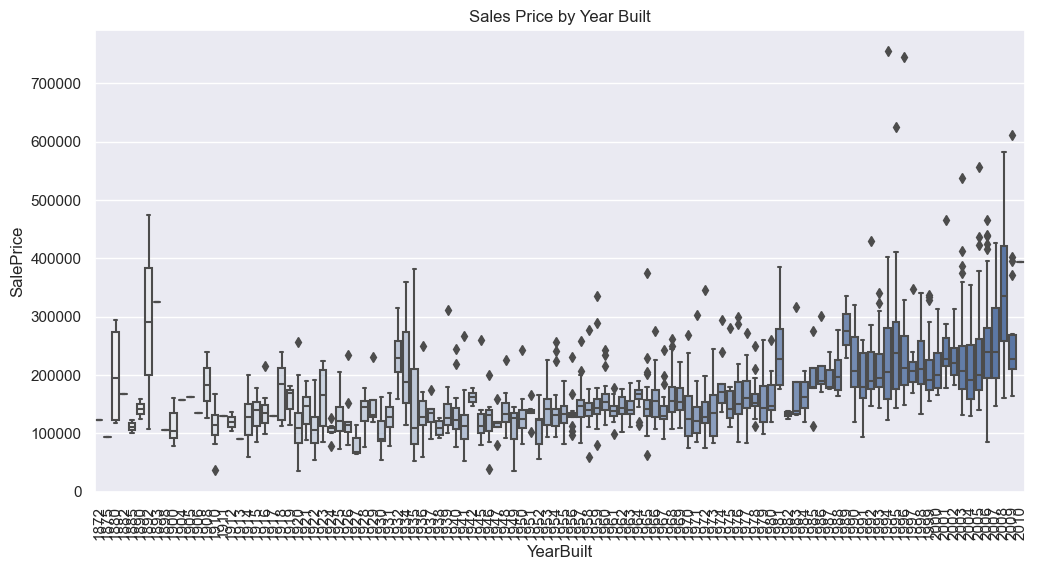

In [302]:
#box plot of sales price by year built
plt.figure(figsize=(12,6))
sns.boxplot(x='YearBuilt', y='SalePrice', data=df_train, palette='light:b')
plt.title('Sales Price by Year Built')
plt.xticks(rotation=90)
plt.show()


C:\Users\vinay\AppData\Local\Temp\ipykernel_24528\341253023.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_train.drop(columns=['Id', 'YrSold', 'MoSold', 'YearBuilt', 'YearRemodAdd']).corr(), cmap='coolwarm', annot=False)


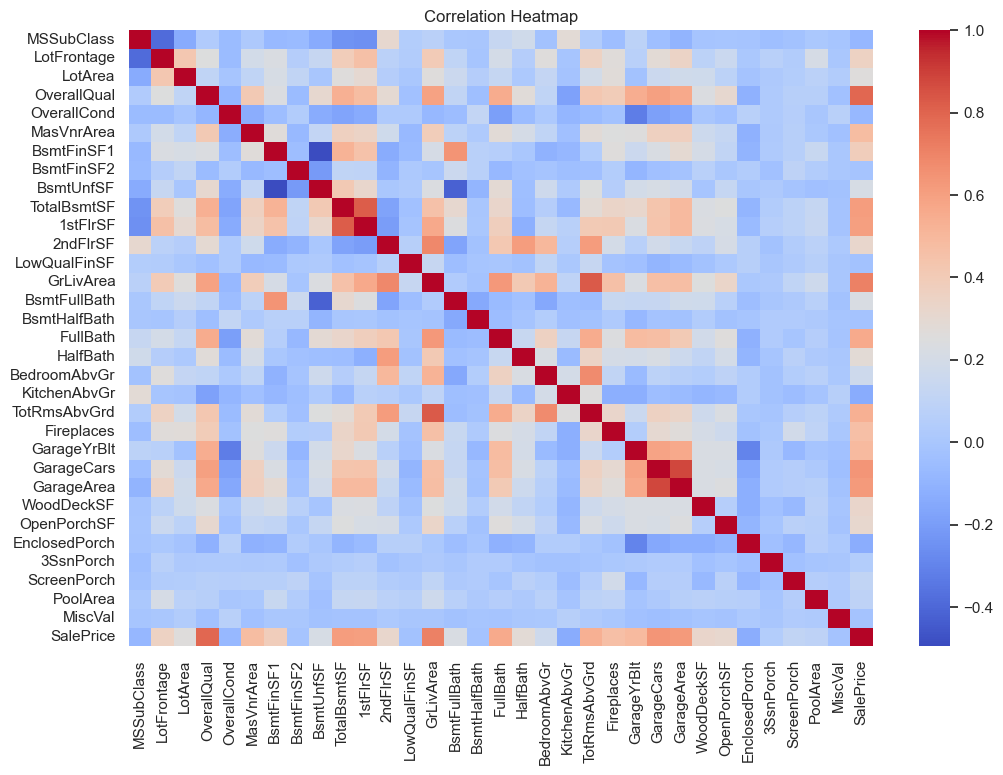

In [303]:
#correlation heatmap of numerical features , columns with 'Year' or 'Yr' in name are not included as well as Id
plt.figure(figsize=(12,8))
sns.heatmap(df_train.drop(columns=['Id', 'YrSold', 'MoSold', 'YearBuilt', 'YearRemodAdd']).corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()




c:\Users\vinay\anaconda3\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


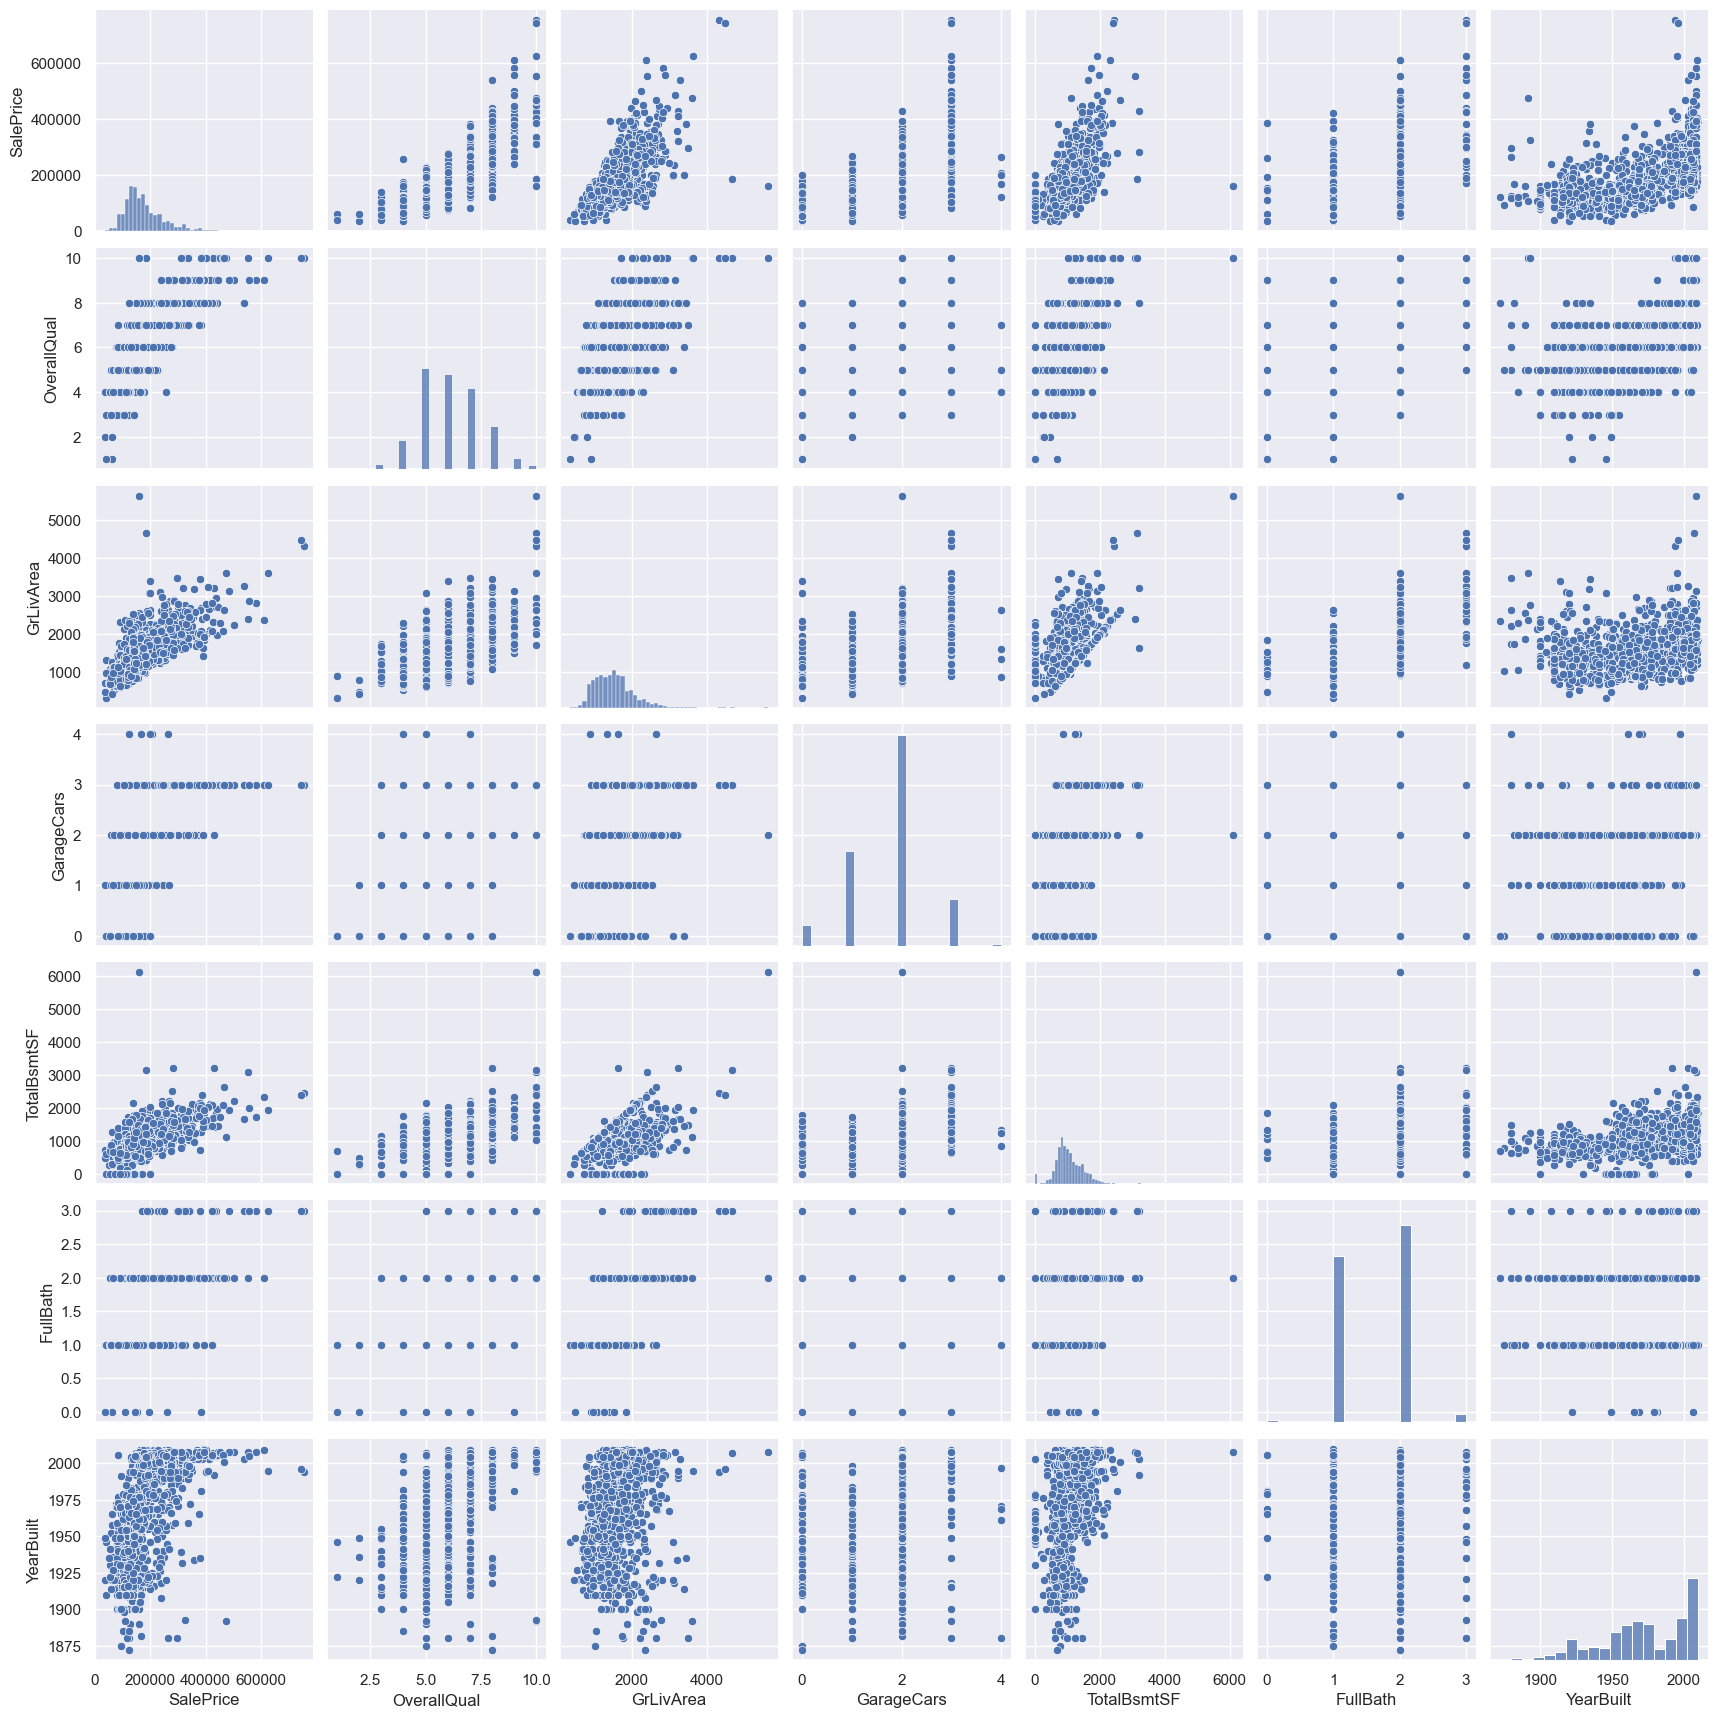

In [304]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show()

In [305]:
#count of missing data and percentage of missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)


,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


In [307]:
# Print dtypes in smaller chunks
chunk_size = 20  # Number of dtypes to print at a time
total_columns = len(df_train.dtypes)
for start in range(0, total_columns, chunk_size):
    end = start + chunk_size
    print(df_train.dtypes[start:end])

Id                int64
MSSubClass        int64
MSZoning         object
LotFrontage     float64
LotArea           int64
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
OverallQual       int64
OverallCond       int64
YearBuilt         int64
dtype: object
YearRemodAdd      int64
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
MasVnrArea      float64
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinSF1        int64
BsmtFinType2     object
BsmtFinSF2        int64
BsmtUnfSF         int64
TotalBsmtSF       int64
Heating          object
dtype: object
HeatingQC   

## Preprocessing

df_train_1=df_train.copy()

df_train=df_train_1.copy()

In [6]:
def create_features(df, current_year=2023):
    # Maps for feature creation
    building_type_map = {
        '1Fam': 'Single',
        '2FmCon': 'MultiFamily',
        'Duplx': 'MultiFamily',
        'TwnhsE': 'Townhouse',
        'TwnhsI': 'Townhouse'
    }
    house_style_map = {
        '1Story': 'OneStory',
        '1.5Fin': 'OneStory',
        '1.5Unf': 'OneStory',
        '2Story': 'TwoPlusStory',
        '2.5Fin': 'TwoPlusStory',
        '2.5Unf': 'TwoPlusStory',
        'SFoyer': 'TwoPlusStory',
        'SLvl': 'TwoPlusStory'
    }

    # Apply transformations to the DataFrame
    df = df.copy()
    df['AgeCategory'] = df.apply(lambda x: 'New' if current_year - max(x['YearBuilt'], x['YearRemodAdd']) <= 15 else 'Old', axis=1)
    df['Building Type Group'] = df['BldgType'].map(building_type_map)
    df['House Style Group'] = df['HouseStyle'].map(house_style_map)
    df['House Category'] = df['Building Type Group'] + '_' + df['House Style Group'] + '_' + df['AgeCategory']

    return df

In [7]:
df_train = create_features(df_train, current_year=2016)

In [8]:
# Define categorical columns as described
categorical_columns = [
    'MSSubClass', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
    'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
    'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle',
    'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
    'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
    'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
    'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
    'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
    'Fence', 'MiscFeature', 'SaleType', 'SaleCondition','House Category'
]

# Convert the columns to categorical
df_train[categorical_columns] = df_train[categorical_columns].apply(lambda x: x.astype('category'))


In [9]:
df_train.drop(columns=['YearBuilt', 'YearRemodAdd', 'BldgType', 'HouseStyle', 'Id','House Style Group','Building Type Group','AgeCategory'], inplace=True)

In [10]:
#split data into features and target
X = df_train.drop(columns=['SalePrice','House Category'], axis=1)
y = df_train[['SalePrice', 'House Category']]


In [11]:
#Split the data into training and validation sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)



In [13]:
# Identify categorical and numerical columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Column transformer with OneHotEncoder for categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numerical_cols),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_cols)
    ])

# Pipeline with preprocessing
full_pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

# Fit and transform the data
X_train_processed = full_pipeline.fit_transform(X_train)
X_val_processed = full_pipeline.transform(X_val)
X_test_processed = full_pipeline.transform(X_test)

In [14]:
# Handle the regression target by scaling
scaler_y_reg = StandardScaler()
y_train_reg = scaler_y_reg.fit_transform(y_train[['SalePrice']].values)
y_val_reg = scaler_y_reg.transform(y_val[['SalePrice']].values)
y_test_reg = scaler_y_reg.transform(y_test[['SalePrice']].values)

# Handle the classification target by encoding
encoder_y_cat = OneHotEncoder(sparse_output=False)
y_train_cat = encoder_y_cat.fit_transform(y_train[['House Category']])
y_val_cat = encoder_y_cat.transform(y_val[['House Category']])
y_test_cat = encoder_y_cat.transform(y_test[['House Category']])

In [15]:
y_train_combined = np.hstack([y_train_reg, y_train_cat])
y_val_combined = np.hstack([y_val_reg, y_val_cat])
y_test_combined = np.hstack([y_test_reg, y_test_cat])

## Pytorch Model - Evaluation

In [16]:

# Ensure X_train_processed, X_val_processed, X_test_processed are converted to dense arrays if they are sparse
X_train_tensor = torch.tensor(X_train_processed.toarray() if hasattr(X_train_processed, "toarray") else X_train_processed, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_combined, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val_processed.toarray() if hasattr(X_val_processed, "toarray") else X_val_processed, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val_combined, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_processed.toarray() if hasattr(X_test_processed, "toarray") else X_test_processed, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_combined, dtype=torch.float32)

# Create datasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)
test_loader = DataLoader(test_dataset, batch_size=32)

In [17]:

class MultiTaskModel(pl.LightningModule):
    def __init__(self, num_features, num_classes):
        super().__init__()
        self.shared_layers = nn.Sequential(
            nn.Linear(num_features, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 64),
            nn.ReLU()
        )
        self.regression_head = nn.Linear(64, 1)  # Output node for regression (price)
        self.classification_head = nn.Linear(64, num_classes)  # Output nodes for classification (category)

    def forward(self, x):
        x = self.shared_layers(x)
        price = self.regression_head(x)
        category = self.classification_head(x)
        return price, category

    def training_step(self, batch, batch_idx):
        x, y = batch
        y_price, y_cat = y[:, 0], y[:, 1:]
        pred_price, pred_cat = self(x)
        loss_reg = F.mse_loss(pred_price.squeeze(), y_price)
        loss_cat = F.cross_entropy(pred_cat, torch.argmax(y_cat, dim=1))
        total_loss = loss_reg + loss_cat
        self.log('train_loss', total_loss)
        return total_loss

    def validation_step(self, batch, batch_idx):
        x, y = batch
        y_price, y_cat = y[:, 0], y[:, 1:]
        pred_price, pred_cat = self(x)
        loss_reg = F.mse_loss(pred_price.squeeze(), y_price)
        loss_cat = F.cross_entropy(pred_cat, torch.argmax(y_cat, dim=1))
        total_loss = loss_reg + loss_cat
        self.log('val_loss', total_loss)
        return total_loss
    
    def test_step(self, batch, batch_idx):
        x, y = batch
        y_price, y_cat = y[:, 0], y[:, 1:]
        pred_price, pred_cat = self(x)
        loss_reg = F.mse_loss(pred_price.squeeze(), y_price)
        loss_cat = F.cross_entropy(pred_cat, torch.argmax(y_cat, dim=1))
        total_loss = loss_reg + loss_cat
        self.log('test_loss', total_loss)
        return total_loss

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=0.001)

# Assuming num_features = X_train_tensor.shape[1] and num_classes is the number of categories in y_cat_encoded
model = MultiTaskModel(num_features=X_train_tensor.shape[1], num_classes=y_train_tensor.shape[1] - 1)

In [31]:

trainer = Trainer(max_epochs=100)
trainer.fit(model, train_loader, val_loader)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 48.1 K
1 | regression_head     | Linear     | 65    
2 | classification_head | Linear     | 585   
---------------------------------------------------
48.7 K    Trainable params
0         Non-trainable params
48.7 K    Total params
0.195     Total estimated model params size (MB)


c:\Users\vinay\anaconda3\envs\myenv\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
c:\Users\vinay\anaconda3\envs\myenv\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
c:\Users\vinay\anaconda3\envs\myenv\lib\site-packages\pytorch_lightning\loops\fit_loop.py:298: The number of training batches (30) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Epoch 99: 100%|██████████| 30/30 [00:00<00:00, 49.84it/s, v_num=16]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 30/30 [00:00<00:00, 48.53it/s, v_num=16]


In [20]:

# Configure EarlyStopping
early_stop_callback = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    min_delta=0.00,      # Minimum change to qualify as an improvement
    patience=3,          # Number of epochs with no improvement after which training will be stopped
    verbose=True,
    mode='min'           # Minimize the loss
)

# Setup the trainer with the early stopping callback
trainer = pl.Trainer(
    max_epochs=100,
    callbacks=[early_stop_callback]
)

# Train the model
trainer.fit(model, train_loader, val_loader)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 48.1 K
1 | regression_head     | Linear     | 65    
2 | classification_head | Linear     | 585   
---------------------------------------------------
48.7 K    Trainable params
0         Non-trainable params
48.7 K    Total params
0.195     Total estimated model params size (MB)


c:\Users\vinay\anaconda3\envs\myenv\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
c:\Users\vinay\anaconda3\envs\myenv\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
c:\Users\vinay\anaconda3\envs\myenv\lib\site-packages\pytorch_lightning\loops\fit_loop.py:298: The number of training batches (30) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 107.27it/s, v_num=19]

Metric val_loss improved. New best score: 1.476


Epoch 1: 100%|██████████| 30/30 [00:00<00:00, 116.02it/s, v_num=19]

Metric val_loss improved by 0.302 >= min_delta = 0.0. New best score: 1.174


Epoch 2: 100%|██████████| 30/30 [00:00<00:00, 108.94it/s, v_num=19]

Metric val_loss improved by 0.263 >= min_delta = 0.0. New best score: 0.911


Epoch 3: 100%|██████████| 30/30 [00:00<00:00, 113.55it/s, v_num=19]

Metric val_loss improved by 0.119 >= min_delta = 0.0. New best score: 0.792


Epoch 5: 100%|██████████| 30/30 [00:00<00:00, 101.76it/s, v_num=19]

Metric val_loss improved by 0.020 >= min_delta = 0.0. New best score: 0.772


Epoch 7: 100%|██████████| 30/30 [00:00<00:00, 126.09it/s, v_num=19]

Metric val_loss improved by 0.047 >= min_delta = 0.0. New best score: 0.725


Epoch 10: 100%|██████████| 30/30 [00:00<00:00, 93.77it/s, v_num=19] 

Monitored metric val_loss did not improve in the last 3 records. Best score: 0.725. Signaling Trainer to stop.


Epoch 10: 100%|██████████| 30/30 [00:00<00:00, 91.29it/s, v_num=19]


In [33]:
# Run the test after training
trainer.test(model, test_loader)


c:\Users\vinay\anaconda3\envs\myenv\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


Testing DataLoader 0: 100%|██████████| 10/10 [00:00<00:00, 95.74it/s] 
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_loss           1.3383013010025024
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'test_loss': 1.3383013010025024}]

In [43]:

def evaluate_model(model, loader):
    model.eval()
    with torch.no_grad():
        # Initialize lists to store targets and predictions across batches
        all_preds_reg = []
        all_preds_cat = []
        all_y_reg = []
        all_y_cat = []

        for batch in loader:
            x, y = batch
            y_reg, y_cat = y[:, 0], y[:, 1:]
            pred_reg, pred_cat = model(x)

            # Store regression and classification results
            all_preds_reg.extend(pred_reg.view(-1).tolist())
            all_preds_cat.extend(torch.softmax(pred_cat, dim=1).tolist())
            all_y_reg.extend(y_reg.tolist())
            all_y_cat.extend(y_cat.tolist())

        # Compute regression metrics
        mse = np.mean((np.array(all_preds_reg) - np.array(all_y_reg))**2)
        
        # Convert classification results to arrays for easier manipulation
        all_preds_cat = np.array(all_preds_cat)
        all_y_cat = np.array(all_y_cat)

        # Assuming y_cat is one-hot encoded, convert it to single labels
        true_labels = np.argmax(all_y_cat, axis=1)
        pred_labels = np.argmax(all_preds_cat, axis=1)

        # Compute classification metrics
        accuracy = accuracy_score(true_labels, pred_labels)
        precision = precision_score(true_labels, pred_labels, average='weighted')
        recall = recall_score(true_labels, pred_labels, average='weighted')
        f1 = f1_score(true_labels, pred_labels, average='weighted')

        # ROC AUC Calculation
        if all_y_cat.shape[1] > 2:
            # Multi-class scenario
            y_bin = label_binarize(true_labels, classes=np.unique(true_labels))
            roc_auc = roc_auc_score(y_bin, all_preds_cat, multi_class='ovr')
            fpr, tpr, _ = roc_curve(y_bin.ravel(), all_preds_cat.ravel())
        else:
            # Binary class scenario
            roc_auc = roc_auc_score(true_labels, all_preds_cat[:, 1])
            fpr, tpr, _ = roc_curve(true_labels, all_preds_cat[:, 1])

        # Plotting ROC Curve
        plt.figure(figsize=(10, 6))
        plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend(loc="lower right")
        plt.show()

        return {
            'MSE': mse,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'ROC AUC': roc_auc
        }

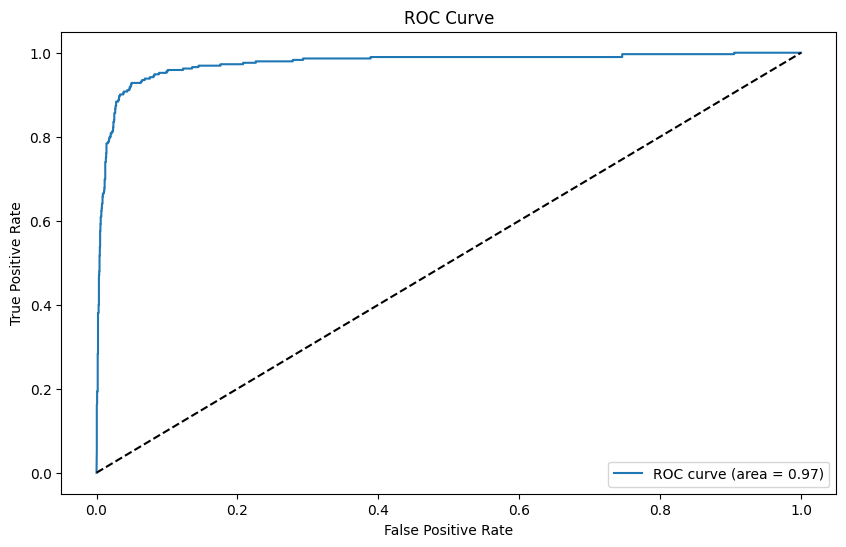

Evaluation Results: {'MSE': 0.2528397834231182, 'Accuracy': 0.815068493150685, 'Precision': 0.8131998463657443, 'Recall': 0.815068493150685, 'F1 Score': 0.8078927090459674, 'ROC AUC': 0.9700551581286803}


In [35]:
results = evaluate_model(model, test_loader)
print("Evaluation Results:", results)

In [27]:


class MultiTaskModel(pl.LightningModule):
    def __init__(self, num_features, num_classes):
        super().__init__()
        # Shared layers with varied activation functions
        self.shared_layers = nn.Sequential(
            nn.Linear(num_features, 128),
            nn.ELU(),  # Using ELU for a smoother alternative to ReLU
            nn.Dropout(0.1),
            nn.Linear(128, 64),
            nn.Tanh()  # 
        )
        # Output node for regression (price), no activation function is needed explicitly here
        self.regression_head = nn.Linear(64, 1)
        # Output nodes for classification (category), Softmax will be applied later
        self.classification_head = nn.Linear(64, num_classes)

    def forward(self, x):
        # Process inputs through the shared layers
        shared_out = self.shared_layers(x)
        # Regression output (no activation needed; assuming regression targets are unbounded)
        price_output = self.regression_head(shared_out)
        # Classification output (logits, softmax will be applied outside the model for numerical stability)
        category_logits = self.classification_head(shared_out)
        return price_output, category_logits

    def training_step(self, batch, batch_idx):
        x, y = batch
        y_price, y_cat = y[:, 0], y[:, 1:]
        pred_price, pred_cat_logits = self(x)
        # Calculate loss
        loss_reg = F.mse_loss(pred_price.squeeze(), y_price)
        loss_cat = F.cross_entropy(pred_cat_logits, torch.argmax(y_cat, dim=1))
        total_loss = loss_reg + loss_cat
        self.log('train_loss', total_loss)
        return total_loss

    def validation_step(self, batch, batch_idx):
        x, y = batch
        y_price, y_cat = y[:, 0], y[:, 1:]
        pred_price, pred_cat_logits = self(x)
        loss_reg = F.mse_loss(pred_price.squeeze(), y_price)
        loss_cat = F.cross_entropy(pred_cat_logits, torch.argmax(y_cat, dim=1))
        total_loss = loss_reg + loss_cat
        self.log('val_loss', total_loss)
        return total_loss
    
    def test_step(self, batch, batch_idx):
        x, y = batch
        y_price, y_cat = y[:, 0], y[:, 1:]
        pred_price, pred_cat = self(x)
        loss_reg = F.mse_loss(pred_price.squeeze(), y_price)
        loss_cat = F.cross_entropy(pred_cat, torch.argmax(y_cat, dim=1))
        total_loss = loss_reg + loss_cat
        self.log('test_loss', total_loss)
        return total_loss

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=0.01)

In [28]:
# Assuming num_features = X_train_tensor.shape[1] and num_classes is the number of categories in y_cat_encoded
model = MultiTaskModel(num_features=X_train_tensor.shape[1], num_classes=y_train_tensor.shape[1] - 1)

In [29]:

# Configure EarlyStopping
early_stop_callback = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    min_delta=0.00,      # Minimum change to qualify as an improvement
    patience=3,          # Number of epochs with no improvement after which training will be stopped
    verbose=True,
    mode='min'           # Minimize the loss
)

# Setup the trainer with the early stopping callback
trainer = pl.Trainer(
    max_epochs=100,
    callbacks=[early_stop_callback]
)

# Train the model
trainer.fit(model, train_loader, val_loader)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 48.1 K
1 | regression_head     | Linear     | 65    
2 | classification_head | Linear     | 585   
---------------------------------------------------
48.7 K    Trainable params
0         Non-trainable params
48.7 K    Total params
0.195     Total estimated model params size (MB)


Sanity Checking DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]

c:\Users\vinay\anaconda3\envs\myenv\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
c:\Users\vinay\anaconda3\envs\myenv\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
c:\Users\vinay\anaconda3\envs\myenv\lib\site-packages\pytorch_lightning\loops\fit_loop.py:298: The number of training batches (30) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 45.16it/s, v_num=2]

Metric val_loss improved. New best score: 0.975


Epoch 1: 100%|██████████| 30/30 [00:00<00:00, 48.93it/s, v_num=2]

Metric val_loss improved by 0.216 >= min_delta = 0.0. New best score: 0.760


Epoch 3: 100%|██████████| 30/30 [00:00<00:00, 47.47it/s, v_num=2]

Metric val_loss improved by 0.028 >= min_delta = 0.0. New best score: 0.732


Epoch 6: 100%|██████████| 30/30 [00:00<00:00, 38.47it/s, v_num=2]

Monitored metric val_loss did not improve in the last 3 records. Best score: 0.732. Signaling Trainer to stop.


Epoch 6: 100%|██████████| 30/30 [00:00<00:00, 37.24it/s, v_num=2]


In [30]:
# Run the test after training
trainer.test(model, test_loader)

c:\Users\vinay\anaconda3\envs\myenv\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


Testing DataLoader 0:  90%|█████████ | 9/10 [00:00<00:00, 137.42it/s]

Testing DataLoader 0: 100%|██████████| 10/10 [00:00<00:00, 100.12it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_loss           0.8419529795646667
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'test_loss': 0.8419529795646667}]

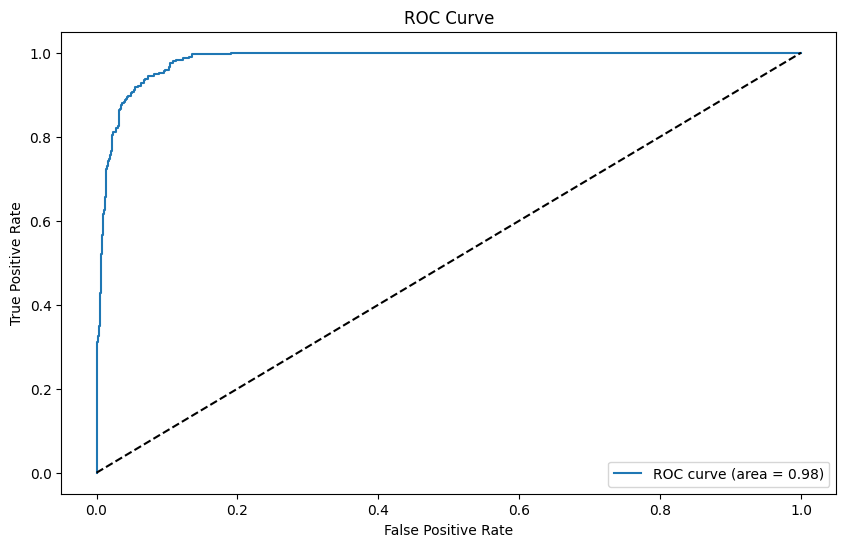

Evaluation Results: {'MSE': 0.26348512353374337, 'Accuracy': 0.8047945205479452, 'Precision': 0.804655073286315, 'Recall': 0.8047945205479452, 'F1 Score': 0.7996309968544484, 'ROC AUC': 0.9800432575276005}


In [31]:
results = evaluate_model(model, test_loader)
print("Evaluation Results:", results)

In [39]:

class MultiTaskModel(pl.LightningModule):
    def __init__(self, num_features, num_classes):
        super().__init__()
        # Shared layers
        self.shared_layers = nn.Sequential(
            nn.Linear(num_features, 256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Dropout(0.2),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.1),
            nn.Linear(128, 64),
            nn.ReLU()
        )
        # Regression head
        self.regression_head = nn.Linear(64, 1)
        # Classification head
        self.classification_head = nn.Linear(64, num_classes)

    def forward(self, x):
        # Process inputs through the shared layers
        shared_out = self.shared_layers(x)
        # Regression output
        price_output = self.regression_head(shared_out)
        # Classification output (logits for numerical stability)
        category_logits = self.classification_head(shared_out)
        return price_output, category_logits

    def training_step(self, batch, batch_idx):
        x, y = batch
        y_price, y_cat = y[:, 0], y[:, 1:]
        pred_price, pred_cat_logits = self(x)
        # Calculate the loss for regression and classification
        loss_reg = F.mse_loss(pred_price.squeeze(), y_price)
        loss_cat = F.cross_entropy(pred_cat_logits, torch.argmax(y_cat, dim=1))
        total_loss = loss_reg + loss_cat
        self.log('train_loss', total_loss)
        return total_loss

    def validation_step(self, batch, batch_idx):
        x, y = batch
        y_price, y_cat = y[:, 0], y[:, 1:]
        pred_price, pred_cat_logits = self(x)
        loss_reg = F.mse_loss(pred_price.squeeze(), y_price)
        loss_cat = F.cross_entropy(pred_cat_logits, torch.argmax(y_cat, dim=1))
        total_loss = loss_reg + loss_cat
        self.log('val_loss', total_loss)
        return total_loss
    
    def test_step(self, batch, batch_idx):
        x, y = batch
        y_price, y_cat = y[:, 0], y[:, 1:]
        pred_price, pred_cat_logits = self(x)
        loss_reg = F.mse_loss(pred_price.squeeze(), y_price)
        loss_cat = F.cross_entropy(pred_cat_logits, torch.argmax(y_cat, dim=1))
        total_loss = loss_reg + loss_cat
        self.log('test_loss', total_loss)
        return total_loss

    def configure_optimizers(self):
        optimizer = torch.optim.SGD(self.parameters(), lr=0.001, momentum=0.9)
    
# Assuming num_features = X_train_tensor.shape[1] and num_classes is the number of categories in y_cat_encoded
model = MultiTaskModel(num_features=X_train_tensor.shape[1], num_classes=y_train_tensor.shape[1] - 1)

In [40]:

# Configure EarlyStopping
early_stop_callback = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    min_delta=0.00,      # Minimum change to qualify as an improvement
    patience=3,          # Number of epochs with no improvement after which training will be stopped
    verbose=True,
    mode='min'           # Minimize the loss
)

# Setup the trainer with the early stopping callback
trainer = pl.Trainer(
    max_epochs=100,
    callbacks=[early_stop_callback]
)

# Train the model
trainer.fit(model, train_loader, val_loader)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
c:\Users\vinay\anaconda3\envs\myenv\lib\site-packages\pytorch_lightning\core\optimizer.py:181: `LightningModule.configure_optimizers` returned `None`, this fit will run with no optimizer

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 121 K 
1 | regression_head     | Linear     | 65    
2 | classification_head | Linear     | 585   
---------------------------------------------------
122 K     Trainable params
0         Non-trainable params
122 K     Total params
0.489     Total estimated model params size (MB)


Sanity Checking DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]

c:\Users\vinay\anaconda3\envs\myenv\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
c:\Users\vinay\anaconda3\envs\myenv\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
c:\Users\vinay\anaconda3\envs\myenv\lib\site-packages\pytorch_lightning\loops\fit_loop.py:298: The number of training batches (30) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 44.71it/s, v_num=4]

Metric val_loss improved. New best score: 3.105


Epoch 3: 100%|██████████| 30/30 [00:00<00:00, 36.00it/s, v_num=4]

Monitored metric val_loss did not improve in the last 3 records. Best score: 3.105. Signaling Trainer to stop.


Epoch 3: 100%|██████████| 30/30 [00:00<00:00, 34.99it/s, v_num=4]


In [41]:
# Run the test after training
trainer.test(model, test_loader)

c:\Users\vinay\anaconda3\envs\myenv\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


Testing DataLoader 0:  60%|██████    | 6/10 [00:00<00:00, 105.19it/s]

Testing DataLoader 0: 100%|██████████| 10/10 [00:00<00:00, 58.06it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_loss           3.3449599742889404
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'test_loss': 3.3449599742889404}]

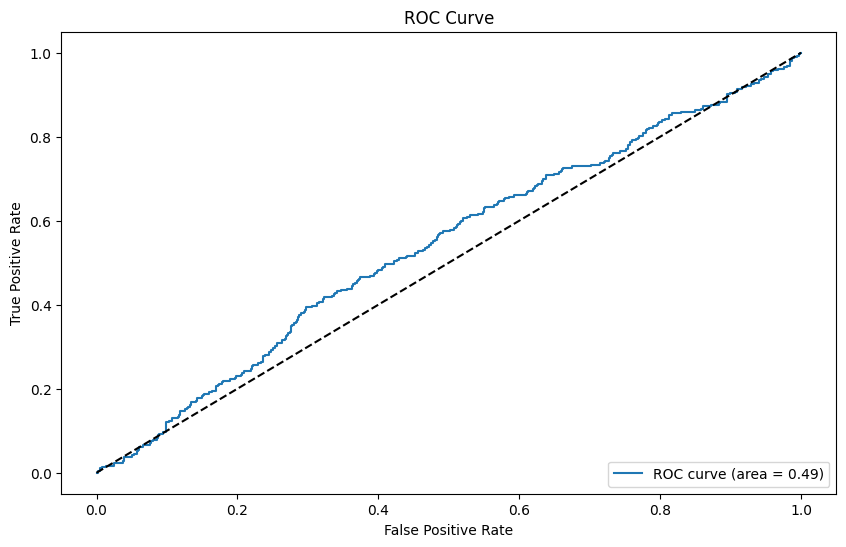

Evaluation Results: {'MSE': 1.1436550718350504, 'Accuracy': 0.13013698630136986, 'Precision': 0.25859305210081573, 'Recall': 0.13013698630136986, 'F1 Score': 0.12673280003814863, 'ROC AUC': 0.48883223969264983}


In [42]:
results = evaluate_model(model, test_loader)
print("Evaluation Results:", results)

## Hyperparameter Tuning - Model 1

In [56]:

class MultiTaskModel(pl.LightningModule):
    def __init__(self, num_features, num_classes, dropout_rate, hidden_dim1, hidden_dim2, lr):
        super().__init__()
        self.save_hyperparameters()
        self.shared_layers = nn.Sequential(
            nn.Linear(num_features, hidden_dim1),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(hidden_dim1, hidden_dim2),
            nn.ReLU(),
            nn.Dropout(dropout_rate)
        )
        self.regression_head = nn.Linear(hidden_dim2, 1)
        self.classification_head = nn.Linear(hidden_dim2, num_classes)

    def forward(self, x):
        x = self.shared_layers(x)
        price = self.regression_head(x)
        category = self.classification_head(x)
        return price, category

    def training_step(self, batch, batch_idx):
        x, y = batch
        y_price, y_cat = y[:, 0], y[:, 1:]
        pred_price, pred_cat = self(x)
        loss_reg = F.mse_loss(pred_price.squeeze(), y_price)
        loss_cat = F.cross_entropy(pred_cat, torch.argmax(y_cat, dim=1))
        total_loss = loss_reg + loss_cat
        self.log('train_loss', total_loss)
        return total_loss

    def validation_step(self, batch, batch_idx):
        x, y = batch
        y_price, y_cat = y[:, 0], y[:, 1:]
        pred_price, pred_cat = self(x)
        loss_reg = F.mse_loss(pred_price.squeeze(), y_price)
        loss_cat = F.cross_entropy(pred_cat, torch.argmax(y_cat, dim=1))
        val_loss = loss_reg + loss_cat
        self.log('val_loss', val_loss, on_step=False, on_epoch=True, prog_bar=True)
        return {"val_loss": val_loss}

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=self.hparams.lr)

class Objective:
    def __init__(self, train_loader, val_loader, num_features, num_classes):
        self.train_loader = train_loader
        self.val_loader = val_loader
        self.num_features = num_features
        self.num_classes = num_classes

    def __call__(self, trial):
        lr = trial.suggest_float('lr', 1e-5, 1e-1, log=True)
        dropout_rate = trial.suggest_float('dropout_rate', 0.1, 0.8)
        hidden_dim1 = trial.suggest_categorical('hidden_dim1', [64,128, 256, 512])
        hidden_dim2 = trial.suggest_categorical('hidden_dim2', [64, 128, 256,512])

        model = MultiTaskModel(
            num_features=self.num_features,
            num_classes=self.num_classes,
            dropout_rate=dropout_rate,
            hidden_dim1=hidden_dim1,
            hidden_dim2=hidden_dim2,
            lr=lr
        )
        trainer = Trainer(
            max_epochs=10,
            callbacks=[
                EarlyStopping(monitor='val_loss', mode='min', patience=3, verbose=True),
                PyTorchLightningPruningCallback(trial, monitor="val_loss")
            ],
            logger=False
        )
        trainer.fit(model, self.train_loader, self.val_loader)
        val_loss = trainer.callback_metrics.get("val_loss", float('inf'))
        return val_loss


def run_study(train_loader, val_loader, num_features, num_classes):
    study = optuna.create_study(direction='minimize')
    study.optimize(Objective(train_loader, val_loader, num_features, num_classes), n_trials=100, timeout=3600)

    best_params = study.best_trial.params
    print("Best trial:", study.best_trial)
    return best_params

# Example usage:
best_params = run_study(train_loader, val_loader, X_train_tensor.shape[1], y_train_tensor.shape[1] - 1)
print("Best Hyperparameters:", best_params)

[I 2024-04-22 22:19:39,644] A new study created in memory with name: no-name-0771470b-3ca1-45ad-8a9f-9f54f84df578
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 96.1 K
1 | regression_head     | Linear     | 65    
2 | classification_head | Linear     | 585   
---------------------------------------------------
96.7 K    Trainable params
0         Non-trainable params
96.7 K    Total params
0.387     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 37.34it/s, val_loss=1.360]    

Metric val_loss improved. New best score: 1.358


Epoch 1: 100%|██████████| 30/30 [00:00<00:00, 44.56it/s, val_loss=1.010]

Metric val_loss improved by 0.352 >= min_delta = 0.0. New best score: 1.006


Epoch 2: 100%|██████████| 30/30 [00:00<00:00, 35.28it/s, val_loss=0.966]

Metric val_loss improved by 0.040 >= min_delta = 0.0. New best score: 0.966


Epoch 3: 100%|██████████| 30/30 [00:00<00:00, 47.63it/s, val_loss=0.846]

Metric val_loss improved by 0.121 >= min_delta = 0.0. New best score: 0.846


Epoch 5: 100%|██████████| 30/30 [00:00<00:00, 46.96it/s, val_loss=0.839]

Metric val_loss improved by 0.006 >= min_delta = 0.0. New best score: 0.839


Epoch 6: 100%|██████████| 30/30 [00:00<00:00, 39.20it/s, val_loss=0.835]

Metric val_loss improved by 0.004 >= min_delta = 0.0. New best score: 0.835


Epoch 7: 100%|██████████| 30/30 [00:00<00:00, 31.38it/s, val_loss=0.750]

Metric val_loss improved by 0.085 >= min_delta = 0.0. New best score: 0.750


Epoch 8: 100%|██████████| 30/30 [00:00<00:00, 43.60it/s, val_loss=0.730]

Metric val_loss improved by 0.020 >= min_delta = 0.0. New best score: 0.730


Epoch 9: 100%|██████████| 30/30 [00:00<00:00, 45.88it/s, val_loss=0.758]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 30/30 [00:00<00:00, 43.70it/s, val_loss=0.758]

[I 2024-04-22 22:19:47,451] Trial 0 finished with value: 0.7577965259552002 and parameters: {'lr': 0.005288856261959638, 'dropout_rate': 0.19048856651623947, 'hidden_dim1': 256, 'hidden_dim2': 64}. Best is trial 0 with value: 0.7577965259552002.


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 112 K 
1 | regression_head     | Linear     | 129   
2 | classification_head | Linear     | 1.2 K 
---------------------------------------------------
113 K     Trainable params
0         Non-trainable params
113 K     Total params
0.455     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 36.60it/s, val_loss=1.720]   

Metric val_loss improved. New best score: 1.719


Epoch 1: 100%|██████████| 30/30 [00:00<00:00, 43.29it/s, val_loss=1.530]

Metric val_loss improved by 0.190 >= min_delta = 0.0. New best score: 1.529


Epoch 4: 100%|██████████| 30/30 [00:00<00:00, 34.95it/s, val_loss=1.910]

Monitored metric val_loss did not improve in the last 3 records. Best score: 1.529. Signaling Trainer to stop.


Epoch 4: 100%|██████████| 30/30 [00:00<00:00, 34.03it/s, val_loss=1.910]

[I 2024-04-22 22:19:51,535] Trial 1 finished with value: 1.9106274843215942 and parameters: {'lr': 0.01369780525946762, 'dropout_rate': 0.6599842098542733, 'hidden_dim1': 256, 'hidden_dim2': 128}. Best is trial 0 with value: 0.7577965259552002.


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 224 K 
1 | regression_head     | Linear     | 129   
2 | classification_head | Linear     | 1.2 K 
---------------------------------------------------
226 K     Trainable params
0         Non-trainable params
226 K     Total params
0.905     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 39.16it/s, val_loss=2.750]    

Metric val_loss improved. New best score: 2.752


Epoch 1: 100%|██████████| 30/30 [00:00<00:00, 33.86it/s, val_loss=2.340]

Metric val_loss improved by 0.416 >= min_delta = 0.0. New best score: 2.337


Epoch 2: 100%|██████████| 30/30 [00:00<00:00, 30.00it/s, val_loss=2.000]

Metric val_loss improved by 0.335 >= min_delta = 0.0. New best score: 2.002


Epoch 3: 100%|██████████| 30/30 [00:00<00:00, 42.83it/s, val_loss=1.870]

Metric val_loss improved by 0.129 >= min_delta = 0.0. New best score: 1.873


Epoch 4: 100%|██████████| 30/30 [00:00<00:00, 45.65it/s, val_loss=1.790]

Metric val_loss improved by 0.080 >= min_delta = 0.0. New best score: 1.794


Epoch 5: 100%|██████████| 30/30 [00:00<00:00, 46.07it/s, val_loss=1.730]

Metric val_loss improved by 0.064 >= min_delta = 0.0. New best score: 1.730


Epoch 6: 100%|██████████| 30/30 [00:00<00:00, 40.04it/s, val_loss=1.670]

Metric val_loss improved by 0.063 >= min_delta = 0.0. New best score: 1.667


Epoch 7: 100%|██████████| 30/30 [00:00<00:00, 35.11it/s, val_loss=1.610]

Metric val_loss improved by 0.061 >= min_delta = 0.0. New best score: 1.606


Epoch 8: 100%|██████████| 30/30 [00:00<00:00, 40.52it/s, val_loss=1.550]

Metric val_loss improved by 0.057 >= min_delta = 0.0. New best score: 1.549


Epoch 9: 100%|██████████| 30/30 [00:00<00:00, 46.22it/s, val_loss=1.480]

Metric val_loss improved by 0.066 >= min_delta = 0.0. New best score: 1.483
`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 30/30 [00:00<00:00, 43.90it/s, val_loss=1.480]


[I 2024-04-22 22:19:59,637] Trial 2 finished with value: 1.483267903327942 and parameters: {'lr': 0.0001876346303461236, 'dropout_rate': 0.6574530245047494, 'hidden_dim1': 512, 'hidden_dim2': 128}. Best is trial 0 with value: 0.7577965259552002.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 24.1 K
1 | regression_head     | Linear     | 65    
2 | classification_head | Linear     | 585   
---------------------------------------------------
24.7 K    Trainable params
0         Non-trainable params
24.7 K    Total params
0.099     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 51.63it/s, val_loss=1.550]   

Metric val_loss improved. New best score: 1.547


Epoch 1: 100%|██████████| 30/30 [00:00<00:00, 38.69it/s, val_loss=1.110]

Metric val_loss improved by 0.439 >= min_delta = 0.0. New best score: 1.108


Epoch 2: 100%|██████████| 30/30 [00:00<00:00, 57.02it/s, val_loss=1.030]

Metric val_loss improved by 0.075 >= min_delta = 0.0. New best score: 1.033


Epoch 3: 100%|██████████| 30/30 [00:00<00:00, 54.66it/s, val_loss=0.836]

Metric val_loss improved by 0.197 >= min_delta = 0.0. New best score: 0.836


Epoch 6: 100%|██████████| 30/30 [00:00<00:00, 45.99it/s, val_loss=1.060]

Monitored metric val_loss did not improve in the last 3 records. Best score: 0.836. Signaling Trainer to stop.


Epoch 6: 100%|██████████| 30/30 [00:00<00:00, 44.43it/s, val_loss=1.060]


[I 2024-04-22 22:20:04,310] Trial 3 finished with value: 1.0572997331619263 and parameters: {'lr': 0.011066408406465247, 'dropout_rate': 0.27273188948610594, 'hidden_dim1': 64, 'hidden_dim2': 64}. Best is trial 0 with value: 0.7577965259552002.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 36.5 K
1 | regression_head     | Linear     | 257   
2 | classification_head | Linear     | 2.3 K 
---------------------------------------------------
39.1 K    Trainable params
0         Non-trainable params
39.1 K    Total params
0.156     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 53.93it/s, val_loss=3.080]    

Metric val_loss improved. New best score: 3.079


Epoch 1: 100%|██████████| 30/30 [00:00<00:00, 47.04it/s, val_loss=3.060]

Metric val_loss improved by 0.018 >= min_delta = 0.0. New best score: 3.060


Epoch 2: 100%|██████████| 30/30 [00:00<00:00, 35.78it/s, val_loss=3.040]

Metric val_loss improved by 0.018 >= min_delta = 0.0. New best score: 3.042


Epoch 3: 100%|██████████| 30/30 [00:00<00:00, 35.91it/s, val_loss=3.020]

Metric val_loss improved by 0.018 >= min_delta = 0.0. New best score: 3.024


Epoch 4: 100%|██████████| 30/30 [00:00<00:00, 36.96it/s, val_loss=3.010]

Metric val_loss improved by 0.018 >= min_delta = 0.0. New best score: 3.006


Epoch 5: 100%|██████████| 30/30 [00:00<00:00, 37.81it/s, val_loss=2.990]

Metric val_loss improved by 0.019 >= min_delta = 0.0. New best score: 2.987


Epoch 6: 100%|██████████| 30/30 [00:00<00:00, 38.59it/s, val_loss=2.970]

Metric val_loss improved by 0.019 >= min_delta = 0.0. New best score: 2.968


Epoch 7: 100%|██████████| 30/30 [00:00<00:00, 38.66it/s, val_loss=2.950]

Metric val_loss improved by 0.020 >= min_delta = 0.0. New best score: 2.948


Epoch 8: 100%|██████████| 30/30 [00:00<00:00, 45.02it/s, val_loss=2.930]

Metric val_loss improved by 0.021 >= min_delta = 0.0. New best score: 2.926


Epoch 9: 100%|██████████| 30/30 [00:00<00:00, 41.80it/s, val_loss=2.900]

Metric val_loss improved by 0.023 >= min_delta = 0.0. New best score: 2.904
`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 30/30 [00:00<00:00, 39.53it/s, val_loss=2.900]


[I 2024-04-22 22:20:12,101] Trial 4 finished with value: 2.9035043716430664 and parameters: {'lr': 1.2806687921371598e-05, 'dropout_rate': 0.13762145177487853, 'hidden_dim1': 64, 'hidden_dim2': 256}. Best is trial 0 with value: 0.7577965259552002.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 96.1 K
1 | regression_head     | Linear     | 65    
2 | classification_head | Linear     | 585   
---------------------------------------------------
96.7 K    Trainable params
0         Non-trainable params
96.7 K    Total params
0.387     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 52.65it/s]                   

[I 2024-04-22 22:20:12,960] Trial 5 pruned. Trial was pruned at epoch 0.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 211 K 
1 | regression_head     | Linear     | 513   
2 | classification_head | Linear     | 4.6 K 
---------------------------------------------------
216 K     Trainable params
0         Non-trainable params
216 K     Total params
0.865     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 35.32it/s]                   

[I 2024-04-22 22:20:14,207] Trial 6 pruned. Trial was pruned at epoch 0.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 112 K 
1 | regression_head     | Linear     | 129   
2 | classification_head | Linear     | 1.2 K 
---------------------------------------------------
113 K     Trainable params
0         Non-trainable params
113 K     Total params
0.455     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 53.72it/s]                    

[I 2024-04-22 22:20:15,014] Trial 7 pruned. Trial was pruned at epoch 0.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 290 K 
1 | regression_head     | Linear     | 257   
2 | classification_head | Linear     | 2.3 K 
---------------------------------------------------
293 K     Trainable params
0         Non-trainable params
293 K     Total params
1.173     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 45.54it/s]                   

[I 2024-04-22 22:20:15,925] Trial 8 pruned. Trial was pruned at epoch 0.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 290 K 
1 | regression_head     | Linear     | 257   
2 | classification_head | Linear     | 2.3 K 
---------------------------------------------------
293 K     Trainable params
0         Non-trainable params
293 K     Total params
1.173     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 45.04it/s]                    

[I 2024-04-22 22:20:16,792] Trial 9 pruned. Trial was pruned at epoch 0.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 48.1 K
1 | regression_head     | Linear     | 65    
2 | classification_head | Linear     | 585   
---------------------------------------------------
48.7 K    Trainable params
0         Non-trainable params
48.7 K    Total params
0.195     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 52.86it/s]                   

[I 2024-04-22 22:20:17,692] Trial 10 pruned. Trial was pruned at epoch 0.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 24.1 K
1 | regression_head     | Linear     | 65    
2 | classification_head | Linear     | 585   
---------------------------------------------------
24.7 K    Trainable params
0         Non-trainable params
24.7 K    Total params
0.099     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 52.76it/s]                    

[I 2024-04-22 22:20:18,500] Trial 11 pruned. Trial was pruned at epoch 0.


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 36.16it/s]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 24.1 K
1 | regression_head     | Linear     | 65    
2 | classification_head | Linear     | 585   
---------------------------------------------------
24.7 K    Trainable params
0         Non-trainable params
24.7 K    Total params
0.099     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 39.84it/s, val_loss=1.560]    

Metric val_loss improved. New best score: 1.562


Epoch 1: 100%|██████████| 30/30 [00:01<00:00, 29.81it/s, val_loss=1.190]

Metric val_loss improved by 0.376 >= min_delta = 0.0. New best score: 1.186


Epoch 2: 100%|██████████| 30/30 [00:00<00:00, 33.54it/s, val_loss=0.961]

Metric val_loss improved by 0.226 >= min_delta = 0.0. New best score: 0.961


Epoch 3: 100%|██████████| 30/30 [00:00<00:00, 40.35it/s, val_loss=0.800]

Metric val_loss improved by 0.160 >= min_delta = 0.0. New best score: 0.800


Epoch 4: 100%|██████████| 30/30 [00:00<00:00, 37.44it/s, val_loss=0.745]

Metric val_loss improved by 0.055 >= min_delta = 0.0. New best score: 0.745


Epoch 5: 100%|██████████| 30/30 [00:00<00:00, 39.47it/s, val_loss=0.723]

Metric val_loss improved by 0.023 >= min_delta = 0.0. New best score: 0.723


Epoch 7: 100%|██████████| 30/30 [00:00<00:00, 39.11it/s, val_loss=0.704]

Metric val_loss improved by 0.019 >= min_delta = 0.0. New best score: 0.704


Epoch 9: 100%|██████████| 30/30 [00:00<00:00, 39.11it/s, val_loss=0.751]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 30/30 [00:00<00:00, 37.12it/s, val_loss=0.751]

[I 2024-04-22 22:20:27,358] Trial 12 finished with value: 0.7509270906448364 and parameters: {'lr': 0.003464758074992208, 'dropout_rate': 0.12965632861312043, 'hidden_dim1': 64, 'hidden_dim2': 64}. Best is trial 12 with value: 0.7509270906448364.


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 48.1 K
1 | regression_head     | Linear     | 65    
2 | classification_head | Linear     | 585   
---------------------------------------------------
48.7 K    Trainable params
0         Non-trainable params
48.7 K    Total params
0.195     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:01<00:00, 26.32it/s, val_loss=1.470]    

Metric val_loss improved. New best score: 1.473


Epoch 1: 100%|██████████| 30/30 [00:00<00:00, 30.02it/s, val_loss=1.040]

Metric val_loss improved by 0.431 >= min_delta = 0.0. New best score: 1.042


Epoch 2: 100%|██████████| 30/30 [00:00<00:00, 33.15it/s, val_loss=0.932]

Metric val_loss improved by 0.110 >= min_delta = 0.0. New best score: 0.932


Epoch 3: 100%|██████████| 30/30 [00:00<00:00, 35.04it/s, val_loss=0.790]

Metric val_loss improved by 0.142 >= min_delta = 0.0. New best score: 0.790


Epoch 4: 100%|██████████| 30/30 [00:01<00:00, 26.57it/s, val_loss=0.721]

Metric val_loss improved by 0.069 >= min_delta = 0.0. New best score: 0.721


Epoch 5: 100%|██████████| 30/30 [00:00<00:00, 36.27it/s, val_loss=0.684]

Metric val_loss improved by 0.038 >= min_delta = 0.0. New best score: 0.684


Epoch 8: 100%|██████████| 30/30 [00:01<00:00, 27.86it/s, val_loss=0.714]

Monitored metric val_loss did not improve in the last 3 records. Best score: 0.684. Signaling Trainer to stop.


Epoch 8: 100%|██████████| 30/30 [00:01<00:00, 26.94it/s, val_loss=0.714]

[I 2024-04-22 22:20:36,468] Trial 13 finished with value: 0.713752031326294 and parameters: {'lr': 0.0028396559453866817, 'dropout_rate': 0.10432286003009503, 'hidden_dim1': 128, 'hidden_dim2': 64}. Best is trial 13 with value: 0.713752031326294.


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 105 K 
1 | regression_head     | Linear     | 513   
2 | classification_head | Linear     | 4.6 K 
---------------------------------------------------
110 K     Trainable params
0         Non-trainable params
110 K     Total params
0.444     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 31.05it/s, val_loss=1.550]   

Metric val_loss improved. New best score: 1.552


Epoch 1: 100%|██████████| 30/30 [00:00<00:00, 30.08it/s, val_loss=1.150]

Metric val_loss improved by 0.403 >= min_delta = 0.0. New best score: 1.149


Epoch 2: 100%|██████████| 30/30 [00:00<00:00, 30.70it/s, val_loss=1.000]

Metric val_loss improved by 0.149 >= min_delta = 0.0. New best score: 1.000


Epoch 3: 100%|██████████| 30/30 [00:01<00:00, 25.27it/s, val_loss=0.771]

Metric val_loss improved by 0.229 >= min_delta = 0.0. New best score: 0.771


Epoch 4: 100%|██████████| 30/30 [00:01<00:00, 29.66it/s, val_loss=0.765]

Metric val_loss improved by 0.006 >= min_delta = 0.0. New best score: 0.765


Epoch 5: 100%|██████████| 30/30 [00:00<00:00, 33.23it/s, val_loss=0.752]

Metric val_loss improved by 0.013 >= min_delta = 0.0. New best score: 0.752


Epoch 6: 100%|██████████| 30/30 [00:00<00:00, 34.09it/s, val_loss=0.694]

Metric val_loss improved by 0.058 >= min_delta = 0.0. New best score: 0.694


Epoch 9: 100%|██████████| 30/30 [00:00<00:00, 35.05it/s, val_loss=0.715]

Monitored metric val_loss did not improve in the last 3 records. Best score: 0.694. Signaling Trainer to stop.
`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 30/30 [00:00<00:00, 33.08it/s, val_loss=0.715]

[I 2024-04-22 22:20:46,982] Trial 14 finished with value: 0.7151796221733093 and parameters: {'lr': 0.0012151400907766037, 'dropout_rate': 0.10357251164670231, 'hidden_dim1': 128, 'hidden_dim2': 512}. Best is trial 13 with value: 0.713752031326294.


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 105 K 
1 | regression_head     | Linear     | 513   
2 | classification_head | Linear     | 4.6 K 
---------------------------------------------------
110 K     Trainable params
0         Non-trainable params
110 K     Total params
0.444     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 37.37it/s]                   

[I 2024-04-22 22:20:48,234] Trial 15 pruned. Trial was pruned at epoch 0.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 105 K 
1 | regression_head     | Linear     | 513   
2 | classification_head | Linear     | 4.6 K 
---------------------------------------------------
110 K     Trainable params
0         Non-trainable params
110 K     Total params
0.444     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:01<00:00, 26.76it/s, val_loss=1.540]   

Metric val_loss improved. New best score: 1.539


Epoch 1: 100%|██████████| 30/30 [00:00<00:00, 31.19it/s, val_loss=1.160]

Metric val_loss improved by 0.381 >= min_delta = 0.0. New best score: 1.158


Epoch 2: 100%|██████████| 30/30 [00:00<00:00, 31.25it/s, val_loss=0.887]

Metric val_loss improved by 0.271 >= min_delta = 0.0. New best score: 0.887


Epoch 3: 100%|██████████| 30/30 [00:00<00:00, 39.95it/s, val_loss=0.887]

[I 2024-04-22 22:20:52,448] Trial 16 pruned. Trial was pruned at epoch 3.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 105 K 
1 | regression_head     | Linear     | 513   
2 | classification_head | Linear     | 4.6 K 
---------------------------------------------------
110 K     Trainable params
0         Non-trainable params
110 K     Total params
0.444     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 36.92it/s]                    

[I 2024-04-22 22:20:53,823] Trial 17 pruned. Trial was pruned at epoch 0.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 105 K 
1 | regression_head     | Linear     | 513   
2 | classification_head | Linear     | 4.6 K 
---------------------------------------------------
110 K     Trainable params
0         Non-trainable params
110 K     Total params
0.444     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 41.39it/s]                   

[I 2024-04-22 22:20:54,873] Trial 18 pruned. Trial was pruned at epoch 0.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 105 K 
1 | regression_head     | Linear     | 513   
2 | classification_head | Linear     | 4.6 K 
---------------------------------------------------
110 K     Trainable params
0         Non-trainable params
110 K     Total params
0.444     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 41.10it/s]                   

[I 2024-04-22 22:20:55,916] Trial 19 pruned. Trial was pruned at epoch 0.


Epoch 0: 100%|██████████| 30/30 [00:01<00:00, 28.01it/s]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 48.1 K
1 | regression_head     | Linear     | 65    
2 | classification_head | Linear     | 585   
---------------------------------------------------
48.7 K    Trainable params
0         Non-trainable params
48.7 K    Total params
0.195     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 34.58it/s]                   

[I 2024-04-22 22:20:57,307] Trial 20 pruned. Trial was pruned at epoch 0.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 24.1 K
1 | regression_head     | Linear     | 65    
2 | classification_head | Linear     | 585   
---------------------------------------------------
24.7 K    Trainable params
0         Non-trainable params
24.7 K    Total params
0.099     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 47.32it/s]                    

[I 2024-04-22 22:20:58,263] Trial 21 pruned. Trial was pruned at epoch 0.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 24.1 K
1 | regression_head     | Linear     | 65    
2 | classification_head | Linear     | 585   
---------------------------------------------------
24.7 K    Trainable params
0         Non-trainable params
24.7 K    Total params
0.099     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 49.77it/s]                    

[I 2024-04-22 22:20:59,182] Trial 22 pruned. Trial was pruned at epoch 0.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 48.1 K
1 | regression_head     | Linear     | 65    
2 | classification_head | Linear     | 585   
---------------------------------------------------
48.7 K    Trainable params
0         Non-trainable params
48.7 K    Total params
0.195     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 46.80it/s]                   

[I 2024-04-22 22:21:00,139] Trial 23 pruned. Trial was pruned at epoch 0.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 24.1 K
1 | regression_head     | Linear     | 65    
2 | classification_head | Linear     | 585   
---------------------------------------------------
24.7 K    Trainable params
0         Non-trainable params
24.7 K    Total params
0.099     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 42.02it/s]                   

[I 2024-04-22 22:21:01,315] Trial 24 pruned. Trial was pruned at epoch 0.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 105 K 
1 | regression_head     | Linear     | 513   
2 | classification_head | Linear     | 4.6 K 
---------------------------------------------------
110 K     Trainable params
0         Non-trainable params
110 K     Total params
0.444     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 33.33it/s, val_loss=1.300]   

Metric val_loss improved. New best score: 1.299


Epoch 1: 100%|██████████| 30/30 [00:00<00:00, 38.34it/s, val_loss=1.300]

[I 2024-04-22 22:21:03,339] Trial 25 pruned. Trial was pruned at epoch 1.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 56.3 K
1 | regression_head     | Linear     | 129   
2 | classification_head | Linear     | 1.2 K 
---------------------------------------------------
57.6 K    Trainable params
0         Non-trainable params
57.6 K    Total params
0.230     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 45.63it/s]                   

[I 2024-04-22 22:21:04,314] Trial 26 pruned. Trial was pruned at epoch 0.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 36.5 K
1 | regression_head     | Linear     | 257   
2 | classification_head | Linear     | 2.3 K 
---------------------------------------------------
39.1 K    Trainable params
0         Non-trainable params
39.1 K    Total params
0.156     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 43.35it/s]                   

[I 2024-04-22 22:21:05,506] Trial 27 pruned. Trial was pruned at epoch 0.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 192 K 
1 | regression_head     | Linear     | 65    
2 | classification_head | Linear     | 585   
---------------------------------------------------
192 K     Trainable params
0         Non-trainable params
192 K     Total params
0.771     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 37.22it/s]                   

[I 2024-04-22 22:21:06,639] Trial 28 pruned. Trial was pruned at epoch 0.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 48.1 K
1 | regression_head     | Linear     | 65    
2 | classification_head | Linear     | 585   
---------------------------------------------------
48.7 K    Trainable params
0         Non-trainable params
48.7 K    Total params
0.195     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 47.36it/s]                   

[I 2024-04-22 22:21:07,580] Trial 29 pruned. Trial was pruned at epoch 0.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 53.2 K
1 | regression_head     | Linear     | 513   
2 | classification_head | Linear     | 4.6 K 
---------------------------------------------------
58.3 K    Trainable params
0         Non-trainable params
58.3 K    Total params
0.233     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:01<00:00, 26.06it/s, val_loss=1.540]

Metric val_loss improved. New best score: 1.541


Epoch 1: 100%|██████████| 30/30 [00:00<00:00, 36.01it/s, val_loss=1.540]

[I 2024-04-22 22:21:09,939] Trial 30 pruned. Trial was pruned at epoch 1.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 96.1 K
1 | regression_head     | Linear     | 65    
2 | classification_head | Linear     | 585   
---------------------------------------------------
96.7 K    Trainable params
0         Non-trainable params
96.7 K    Total params
0.387     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 39.64it/s]                   

[I 2024-04-22 22:21:11,022] Trial 31 pruned. Trial was pruned at epoch 0.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 112 K 
1 | regression_head     | Linear     | 129   
2 | classification_head | Linear     | 1.2 K 
---------------------------------------------------
113 K     Trainable params
0         Non-trainable params
113 K     Total params
0.455     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 34.72it/s, val_loss=1.240]    

Metric val_loss improved. New best score: 1.243


Epoch 1: 100%|██████████| 30/30 [00:01<00:00, 28.62it/s, val_loss=0.963]

Metric val_loss improved by 0.280 >= min_delta = 0.0. New best score: 0.963


Epoch 2: 100%|██████████| 30/30 [00:01<00:00, 28.02it/s, val_loss=0.820]

Metric val_loss improved by 0.143 >= min_delta = 0.0. New best score: 0.820


Epoch 3: 100%|██████████| 30/30 [00:00<00:00, 30.05it/s, val_loss=0.712]

Metric val_loss improved by 0.108 >= min_delta = 0.0. New best score: 0.712


Epoch 6: 100%|██████████| 30/30 [00:01<00:00, 29.12it/s, val_loss=0.815]

Monitored metric val_loss did not improve in the last 3 records. Best score: 0.712. Signaling Trainer to stop.


Epoch 6: 100%|██████████| 30/30 [00:01<00:00, 28.17it/s, val_loss=0.815]

[I 2024-04-22 22:21:18,293] Trial 32 finished with value: 0.8148444890975952 and parameters: {'lr': 0.005039340602125999, 'dropout_rate': 0.14908335956978333, 'hidden_dim1': 256, 'hidden_dim2': 128}. Best is trial 13 with value: 0.713752031326294.


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 96.1 K
1 | regression_head     | Linear     | 65    
2 | classification_head | Linear     | 585   
---------------------------------------------------
96.7 K    Trainable params
0         Non-trainable params
96.7 K    Total params
0.387     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 34.63it/s, val_loss=1.500]   

Metric val_loss improved. New best score: 1.499


Epoch 1: 100%|██████████| 30/30 [00:00<00:00, 34.66it/s, val_loss=1.060]

Metric val_loss improved by 0.437 >= min_delta = 0.0. New best score: 1.063


Epoch 2: 100%|██████████| 30/30 [00:00<00:00, 34.55it/s, val_loss=0.951]

Metric val_loss improved by 0.112 >= min_delta = 0.0. New best score: 0.951


Epoch 3: 100%|██████████| 30/30 [00:00<00:00, 33.14it/s, val_loss=0.951]

[I 2024-04-22 22:21:22,363] Trial 33 pruned. Trial was pruned at epoch 3.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 96.1 K
1 | regression_head     | Linear     | 65    
2 | classification_head | Linear     | 585   
---------------------------------------------------
96.7 K    Trainable params
0         Non-trainable params
96.7 K    Total params
0.387     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 33.64it/s, val_loss=1.530]   

Metric val_loss improved. New best score: 1.535


Epoch 1: 100%|██████████| 30/30 [00:00<00:00, 41.33it/s, val_loss=1.530]

[I 2024-04-22 22:21:24,437] Trial 34 pruned. Trial was pruned at epoch 1.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 192 K 
1 | regression_head     | Linear     | 65    
2 | classification_head | Linear     | 585   
---------------------------------------------------
192 K     Trainable params
0         Non-trainable params
192 K     Total params
0.771     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 35.98it/s]                   

[I 2024-04-22 22:21:25,654] Trial 35 pruned. Trial was pruned at epoch 0.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 112 K 
1 | regression_head     | Linear     | 129   
2 | classification_head | Linear     | 1.2 K 
---------------------------------------------------
113 K     Trainable params
0         Non-trainable params
113 K     Total params
0.455     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 34.80it/s]                    

[I 2024-04-22 22:21:26,871] Trial 36 pruned. Trial was pruned at epoch 0.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 24.1 K
1 | regression_head     | Linear     | 65    
2 | classification_head | Linear     | 585   
---------------------------------------------------
24.7 K    Trainable params
0         Non-trainable params
24.7 K    Total params
0.099     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 44.65it/s]                   

[I 2024-04-22 22:21:27,881] Trial 37 pruned. Trial was pruned at epoch 0.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 145 K 
1 | regression_head     | Linear     | 257   
2 | classification_head | Linear     | 2.3 K 
---------------------------------------------------
147 K     Trainable params
0         Non-trainable params
147 K     Total params
0.592     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 39.86it/s]                    

[I 2024-04-22 22:21:28,988] Trial 38 pruned. Trial was pruned at epoch 0.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 48.1 K
1 | regression_head     | Linear     | 65    
2 | classification_head | Linear     | 585   
---------------------------------------------------
48.7 K    Trainable params
0         Non-trainable params
48.7 K    Total params
0.195     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 45.00it/s]                   

[I 2024-04-22 22:21:29,995] Trial 39 pruned. Trial was pruned at epoch 0.


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 31.79it/s]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 421 K 
1 | regression_head     | Linear     | 513   
2 | classification_head | Linear     | 4.6 K 
---------------------------------------------------
427 K     Trainable params
0         Non-trainable params
427 K     Total params
1.708     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:01<00:00, 23.01it/s, val_loss=1.410]   

Metric val_loss improved. New best score: 1.408


Epoch 1: 100%|██████████| 30/30 [00:00<00:00, 30.52it/s, val_loss=1.410]

[I 2024-04-22 22:21:32,822] Trial 40 pruned. Trial was pruned at epoch 1.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 112 K 
1 | regression_head     | Linear     | 129   
2 | classification_head | Linear     | 1.2 K 
---------------------------------------------------
113 K     Trainable params
0         Non-trainable params
113 K     Total params
0.455     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 38.23it/s]                   

[I 2024-04-22 22:21:33,954] Trial 41 pruned. Trial was pruned at epoch 0.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 112 K 
1 | regression_head     | Linear     | 129   
2 | classification_head | Linear     | 1.2 K 
---------------------------------------------------
113 K     Trainable params
0         Non-trainable params
113 K     Total params
0.455     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:01<00:00, 29.40it/s, val_loss=1.350]   

Metric val_loss improved. New best score: 1.348


Epoch 1: 100%|██████████| 30/30 [00:01<00:00, 24.31it/s, val_loss=1.110]

Metric val_loss improved by 0.236 >= min_delta = 0.0. New best score: 1.112


Epoch 2: 100%|██████████| 30/30 [00:00<00:00, 31.91it/s, val_loss=0.824]

Metric val_loss improved by 0.288 >= min_delta = 0.0. New best score: 0.824


Epoch 5: 100%|██████████| 30/30 [00:01<00:00, 27.46it/s, val_loss=0.732]

Metric val_loss improved by 0.091 >= min_delta = 0.0. New best score: 0.732


Epoch 6: 100%|██████████| 30/30 [00:00<00:00, 33.02it/s, val_loss=0.728]

Metric val_loss improved by 0.004 >= min_delta = 0.0. New best score: 0.728


Epoch 9: 100%|██████████| 30/30 [00:00<00:00, 33.48it/s, val_loss=0.830]

Monitored metric val_loss did not improve in the last 3 records. Best score: 0.728. Signaling Trainer to stop.
`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 30/30 [00:00<00:00, 32.00it/s, val_loss=0.830]

[I 2024-04-22 22:21:44,594] Trial 42 finished with value: 0.8298503756523132 and parameters: {'lr': 0.004452992471633695, 'dropout_rate': 0.24092911500617753, 'hidden_dim1': 256, 'hidden_dim2': 128}. Best is trial 13 with value: 0.713752031326294.


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 112 K 
1 | regression_head     | Linear     | 129   
2 | classification_head | Linear     | 1.2 K 
---------------------------------------------------
113 K     Trainable params
0         Non-trainable params
113 K     Total params
0.455     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:01<00:00, 26.95it/s, val_loss=1.330]   

Metric val_loss improved. New best score: 1.333


Epoch 1: 100%|██████████| 30/30 [00:00<00:00, 32.55it/s, val_loss=0.932]

Metric val_loss improved by 0.401 >= min_delta = 0.0. New best score: 0.932


Epoch 2: 100%|██████████| 30/30 [00:00<00:00, 32.32it/s, val_loss=0.802]

Metric val_loss improved by 0.129 >= min_delta = 0.0. New best score: 0.802


Epoch 3: 100%|██████████| 30/30 [00:00<00:00, 32.06it/s, val_loss=0.798]

Metric val_loss improved by 0.004 >= min_delta = 0.0. New best score: 0.798


Epoch 6: 100%|██████████| 30/30 [00:00<00:00, 31.37it/s, val_loss=0.825]

Monitored metric val_loss did not improve in the last 3 records. Best score: 0.798. Signaling Trainer to stop.


Epoch 6: 100%|██████████| 30/30 [00:00<00:00, 30.33it/s, val_loss=0.825]

[I 2024-04-22 22:21:52,138] Trial 43 finished with value: 0.8252640962600708 and parameters: {'lr': 0.007570325112222033, 'dropout_rate': 0.10083744145252552, 'hidden_dim1': 256, 'hidden_dim2': 128}. Best is trial 13 with value: 0.713752031326294.


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 112 K 
1 | regression_head     | Linear     | 129   
2 | classification_head | Linear     | 1.2 K 
---------------------------------------------------
113 K     Trainable params
0         Non-trainable params
113 K     Total params
0.455     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 33.27it/s, val_loss=1.490]   

Metric val_loss improved. New best score: 1.487


Epoch 1: 100%|██████████| 30/30 [00:01<00:00, 29.93it/s, val_loss=1.490]

[I 2024-04-22 22:21:54,467] Trial 44 pruned. Trial was pruned at epoch 1.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 112 K 
1 | regression_head     | Linear     | 129   
2 | classification_head | Linear     | 1.2 K 
---------------------------------------------------
113 K     Trainable params
0         Non-trainable params
113 K     Total params
0.455     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 38.27it/s]                   

[I 2024-04-22 22:21:55,603] Trial 45 pruned. Trial was pruned at epoch 0.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 24.1 K
1 | regression_head     | Linear     | 65    
2 | classification_head | Linear     | 585   
---------------------------------------------------
24.7 K    Trainable params
0         Non-trainable params
24.7 K    Total params
0.099     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 46.77it/s]                   

[I 2024-04-22 22:21:56,572] Trial 46 pruned. Trial was pruned at epoch 0.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 72.8 K
1 | regression_head     | Linear     | 257   
2 | classification_head | Linear     | 2.3 K 
---------------------------------------------------
75.4 K    Trainable params
0         Non-trainable params
75.4 K    Total params
0.302     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 33.67it/s, val_loss=1.450]    

Metric val_loss improved. New best score: 1.446


Epoch 1: 100%|██████████| 30/30 [00:01<00:00, 22.38it/s, val_loss=1.040]

Metric val_loss improved by 0.411 >= min_delta = 0.0. New best score: 1.035


Epoch 2: 100%|██████████| 30/30 [00:00<00:00, 32.91it/s, val_loss=0.914]

Metric val_loss improved by 0.122 >= min_delta = 0.0. New best score: 0.914


Epoch 3: 100%|██████████| 30/30 [00:00<00:00, 30.93it/s, val_loss=0.781]

Metric val_loss improved by 0.133 >= min_delta = 0.0. New best score: 0.781


Epoch 4: 100%|██████████| 30/30 [00:00<00:00, 31.53it/s, val_loss=0.760]

Metric val_loss improved by 0.022 >= min_delta = 0.0. New best score: 0.760


Epoch 6: 100%|██████████| 30/30 [00:00<00:00, 34.42it/s, val_loss=0.693]

Metric val_loss improved by 0.067 >= min_delta = 0.0. New best score: 0.693


Epoch 9: 100%|██████████| 30/30 [00:00<00:00, 30.80it/s, val_loss=0.761]

Monitored metric val_loss did not improve in the last 3 records. Best score: 0.693. Signaling Trainer to stop.
`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 30/30 [00:01<00:00, 28.82it/s, val_loss=0.761]

[I 2024-04-22 22:22:06,955] Trial 47 finished with value: 0.761345386505127 and parameters: {'lr': 0.0024320532059198094, 'dropout_rate': 0.1380571637292588, 'hidden_dim1': 128, 'hidden_dim2': 256}. Best is trial 13 with value: 0.713752031326294.


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 72.8 K
1 | regression_head     | Linear     | 257   
2 | classification_head | Linear     | 2.3 K 
---------------------------------------------------
75.4 K    Trainable params
0         Non-trainable params
75.4 K    Total params
0.302     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 36.73it/s]                   

[I 2024-04-22 22:22:08,251] Trial 48 pruned. Trial was pruned at epoch 0.


Epoch 0: 100%|██████████| 30/30 [00:01<00:00, 28.61it/s]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 72.8 K
1 | regression_head     | Linear     | 257   
2 | classification_head | Linear     | 2.3 K 
---------------------------------------------------
75.4 K    Trainable params
0         Non-trainable params
75.4 K    Total params
0.302     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 37.34it/s]                   

[I 2024-04-22 22:22:09,469] Trial 49 pruned. Trial was pruned at epoch 0.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 72.8 K
1 | regression_head     | Linear     | 257   
2 | classification_head | Linear     | 2.3 K 
---------------------------------------------------
75.4 K    Trainable params
0         Non-trainable params
75.4 K    Total params
0.302     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 37.70it/s]                    

[I 2024-04-22 22:22:10,636] Trial 50 pruned. Trial was pruned at epoch 0.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 72.8 K
1 | regression_head     | Linear     | 257   
2 | classification_head | Linear     | 2.3 K 
---------------------------------------------------
75.4 K    Trainable params
0         Non-trainable params
75.4 K    Total params
0.302     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 31.56it/s]                   

[I 2024-04-22 22:22:11,968] Trial 51 pruned. Trial was pruned at epoch 0.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 105 K 
1 | regression_head     | Linear     | 513   
2 | classification_head | Linear     | 4.6 K 
---------------------------------------------------
110 K     Trainable params
0         Non-trainable params
110 K     Total params
0.444     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 32.43it/s, val_loss=1.470]    

Metric val_loss improved. New best score: 1.467


Epoch 1: 100%|██████████| 30/30 [00:00<00:00, 37.75it/s, val_loss=1.470]

[I 2024-04-22 22:22:14,069] Trial 52 pruned. Trial was pruned at epoch 1.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 72.8 K
1 | regression_head     | Linear     | 257   
2 | classification_head | Linear     | 2.3 K 
---------------------------------------------------
75.4 K    Trainable params
0         Non-trainable params
75.4 K    Total params
0.302     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 40.26it/s]                    

[I 2024-04-22 22:22:15,174] Trial 53 pruned. Trial was pruned at epoch 0.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 96.1 K
1 | regression_head     | Linear     | 65    
2 | classification_head | Linear     | 585   
---------------------------------------------------
96.7 K    Trainable params
0         Non-trainable params
96.7 K    Total params
0.387     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:01<00:00, 29.52it/s, val_loss=1.420]   

Metric val_loss improved. New best score: 1.425


Epoch 1: 100%|██████████| 30/30 [00:00<00:00, 41.09it/s, val_loss=1.420]

[I 2024-04-22 22:22:17,385] Trial 54 pruned. Trial was pruned at epoch 1.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 53.2 K
1 | regression_head     | Linear     | 513   
2 | classification_head | Linear     | 4.6 K 
---------------------------------------------------
58.3 K    Trainable params
0         Non-trainable params
58.3 K    Total params
0.233     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 40.81it/s]                   

[I 2024-04-22 22:22:18,492] Trial 55 pruned. Trial was pruned at epoch 0.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 56.3 K
1 | regression_head     | Linear     | 129   
2 | classification_head | Linear     | 1.2 K 
---------------------------------------------------
57.6 K    Trainable params
0         Non-trainable params
57.6 K    Total params
0.230     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 42.36it/s]                   

[I 2024-04-22 22:22:19,591] Trial 56 pruned. Trial was pruned at epoch 0.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 192 K 
1 | regression_head     | Linear     | 65    
2 | classification_head | Linear     | 585   
---------------------------------------------------
192 K     Trainable params
0         Non-trainable params
192 K     Total params
0.771     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 36.20it/s]                   

[I 2024-04-22 22:22:20,917] Trial 57 pruned. Trial was pruned at epoch 0.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 105 K 
1 | regression_head     | Linear     | 513   
2 | classification_head | Linear     | 4.6 K 
---------------------------------------------------
110 K     Trainable params
0         Non-trainable params
110 K     Total params
0.444     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 37.04it/s]                   

[I 2024-04-22 22:22:22,108] Trial 58 pruned. Trial was pruned at epoch 0.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 24.1 K
1 | regression_head     | Linear     | 65    
2 | classification_head | Linear     | 585   
---------------------------------------------------
24.7 K    Trainable params
0         Non-trainable params
24.7 K    Total params
0.099     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 41.17it/s]                   

[I 2024-04-22 22:22:23,158] Trial 59 pruned. Trial was pruned at epoch 0.


Epoch 0: 100%|██████████| 30/30 [00:01<00:00, 29.58it/s]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 72.8 K
1 | regression_head     | Linear     | 257   
2 | classification_head | Linear     | 2.3 K 
---------------------------------------------------
75.4 K    Trainable params
0         Non-trainable params
75.4 K    Total params
0.302     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 30.76it/s]                    

[I 2024-04-22 22:22:24,583] Trial 60 pruned. Trial was pruned at epoch 0.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 112 K 
1 | regression_head     | Linear     | 129   
2 | classification_head | Linear     | 1.2 K 
---------------------------------------------------
113 K     Trainable params
0         Non-trainable params
113 K     Total params
0.455     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 33.64it/s, val_loss=1.140]   

Metric val_loss improved. New best score: 1.144


Epoch 1: 100%|██████████| 30/30 [00:00<00:00, 33.28it/s, val_loss=0.910]

Metric val_loss improved by 0.233 >= min_delta = 0.0. New best score: 0.910


Epoch 2: 100%|██████████| 30/30 [00:00<00:00, 30.70it/s, val_loss=0.895]

Metric val_loss improved by 0.015 >= min_delta = 0.0. New best score: 0.895


Epoch 3: 100%|██████████| 30/30 [00:00<00:00, 33.66it/s, val_loss=0.778]

Metric val_loss improved by 0.117 >= min_delta = 0.0. New best score: 0.778


Epoch 5: 100%|██████████| 30/30 [00:00<00:00, 46.64it/s, val_loss=0.756]

Metric val_loss improved by 0.022 >= min_delta = 0.0. New best score: 0.756


Epoch 8: 100%|██████████| 30/30 [00:00<00:00, 33.98it/s, val_loss=0.904]

Monitored metric val_loss did not improve in the last 3 records. Best score: 0.756. Signaling Trainer to stop.


Epoch 8: 100%|██████████| 30/30 [00:00<00:00, 33.07it/s, val_loss=0.904]

[I 2024-04-22 22:22:32,332] Trial 61 finished with value: 0.903705894947052 and parameters: {'lr': 0.008976914914246487, 'dropout_rate': 0.1021680154268566, 'hidden_dim1': 256, 'hidden_dim2': 128}. Best is trial 13 with value: 0.713752031326294.


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 112 K 
1 | regression_head     | Linear     | 129   
2 | classification_head | Linear     | 1.2 K 
---------------------------------------------------
113 K     Trainable params
0         Non-trainable params
113 K     Total params
0.455     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 33.39it/s, val_loss=1.340]    

Metric val_loss improved. New best score: 1.337


Epoch 1: 100%|██████████| 30/30 [00:00<00:00, 41.36it/s, val_loss=1.340]

[I 2024-04-22 22:22:34,281] Trial 62 pruned. Trial was pruned at epoch 1.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 112 K 
1 | regression_head     | Linear     | 129   
2 | classification_head | Linear     | 1.2 K 
---------------------------------------------------
113 K     Trainable params
0         Non-trainable params
113 K     Total params
0.455     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 36.57it/s]                   

[I 2024-04-22 22:22:35,383] Trial 63 pruned. Trial was pruned at epoch 0.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 112 K 
1 | regression_head     | Linear     | 129   
2 | classification_head | Linear     | 1.2 K 
---------------------------------------------------
113 K     Trainable params
0         Non-trainable params
113 K     Total params
0.455     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 45.05it/s, val_loss=1.220]    

Metric val_loss improved. New best score: 1.216


Epoch 1: 100%|██████████| 30/30 [00:00<00:00, 36.33it/s, val_loss=0.944]

Metric val_loss improved by 0.272 >= min_delta = 0.0. New best score: 0.944


Epoch 2: 100%|██████████| 30/30 [00:00<00:00, 37.52it/s, val_loss=0.928]

Metric val_loss improved by 0.016 >= min_delta = 0.0. New best score: 0.928


Epoch 3: 100%|██████████| 30/30 [00:00<00:00, 33.96it/s, val_loss=0.781]

Metric val_loss improved by 0.147 >= min_delta = 0.0. New best score: 0.781


Epoch 4: 100%|██████████| 30/30 [00:00<00:00, 39.13it/s, val_loss=0.772]

Metric val_loss improved by 0.009 >= min_delta = 0.0. New best score: 0.772


Epoch 6: 100%|██████████| 30/30 [00:00<00:00, 36.82it/s, val_loss=0.765]

Metric val_loss improved by 0.008 >= min_delta = 0.0. New best score: 0.765


Epoch 7: 100%|██████████| 30/30 [00:00<00:00, 30.57it/s, val_loss=0.746]

Metric val_loss improved by 0.018 >= min_delta = 0.0. New best score: 0.746


Epoch 9: 100%|██████████| 30/30 [00:00<00:00, 37.66it/s, val_loss=0.953]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 30/30 [00:00<00:00, 36.71it/s, val_loss=0.953]

[I 2024-04-22 22:22:43,730] Trial 64 finished with value: 0.953120768070221 and parameters: {'lr': 0.004687241151870178, 'dropout_rate': 0.16724674427239672, 'hidden_dim1': 256, 'hidden_dim2': 128}. Best is trial 13 with value: 0.713752031326294.


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 112 K 
1 | regression_head     | Linear     | 129   
2 | classification_head | Linear     | 1.2 K 
---------------------------------------------------
113 K     Trainable params
0         Non-trainable params
113 K     Total params
0.455     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 41.80it/s, val_loss=1.430]   

Metric val_loss improved. New best score: 1.427


Epoch 1: 100%|██████████| 30/30 [00:00<00:00, 30.63it/s, val_loss=1.070]

Metric val_loss improved by 0.355 >= min_delta = 0.0. New best score: 1.073


Epoch 2: 100%|██████████| 30/30 [00:00<00:00, 42.59it/s, val_loss=0.806]

Metric val_loss improved by 0.267 >= min_delta = 0.0. New best score: 0.806


Epoch 3: 100%|██████████| 30/30 [00:00<00:00, 40.61it/s, val_loss=0.771]

Metric val_loss improved by 0.035 >= min_delta = 0.0. New best score: 0.771


Epoch 4: 100%|██████████| 30/30 [00:00<00:00, 38.49it/s, val_loss=0.722]

Metric val_loss improved by 0.048 >= min_delta = 0.0. New best score: 0.722


Epoch 6: 100%|██████████| 30/30 [00:00<00:00, 44.36it/s, val_loss=0.667]

Metric val_loss improved by 0.056 >= min_delta = 0.0. New best score: 0.667


Epoch 9: 100%|██████████| 30/30 [00:00<00:00, 40.73it/s, val_loss=0.777]

Monitored metric val_loss did not improve in the last 3 records. Best score: 0.667. Signaling Trainer to stop.
`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 30/30 [00:00<00:00, 39.38it/s, val_loss=0.777]

[I 2024-04-22 22:22:51,873] Trial 65 finished with value: 0.7769607901573181 and parameters: {'lr': 0.002537865930141008, 'dropout_rate': 0.1013376253405327, 'hidden_dim1': 256, 'hidden_dim2': 128}. Best is trial 13 with value: 0.713752031326294.


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 96.1 K
1 | regression_head     | Linear     | 65    
2 | classification_head | Linear     | 585   
---------------------------------------------------
96.7 K    Trainable params
0         Non-trainable params
96.7 K    Total params
0.387     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 46.37it/s]                   

[I 2024-04-22 22:22:52,988] Trial 66 pruned. Trial was pruned at epoch 0.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 53.2 K
1 | regression_head     | Linear     | 513   
2 | classification_head | Linear     | 4.6 K 
---------------------------------------------------
58.3 K    Trainable params
0         Non-trainable params
58.3 K    Total params
0.233     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 45.45it/s]                    

[I 2024-04-22 22:22:53,913] Trial 67 pruned. Trial was pruned at epoch 0.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 48.1 K
1 | regression_head     | Linear     | 65    
2 | classification_head | Linear     | 585   
---------------------------------------------------
48.7 K    Trainable params
0         Non-trainable params
48.7 K    Total params
0.195     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 56.68it/s]                    

[I 2024-04-22 22:22:54,683] Trial 68 pruned. Trial was pruned at epoch 0.


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 42.49it/s]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 112 K 
1 | regression_head     | Linear     | 129   
2 | classification_head | Linear     | 1.2 K 
---------------------------------------------------
113 K     Trainable params
0         Non-trainable params
113 K     Total params
0.455     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 33.57it/s, val_loss=1.390]    

Metric val_loss improved. New best score: 1.387


Epoch 1: 100%|██████████| 30/30 [00:00<00:00, 36.59it/s, val_loss=0.864]

Metric val_loss improved by 0.524 >= min_delta = 0.0. New best score: 0.864


Epoch 2: 100%|██████████| 30/30 [00:00<00:00, 44.35it/s, val_loss=0.811]

Metric val_loss improved by 0.052 >= min_delta = 0.0. New best score: 0.811


Epoch 3: 100%|██████████| 30/30 [00:00<00:00, 52.88it/s, val_loss=0.811]

[I 2024-04-22 22:22:58,039] Trial 69 pruned. Trial was pruned at epoch 3.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 192 K 
1 | regression_head     | Linear     | 65    
2 | classification_head | Linear     | 585   
---------------------------------------------------
192 K     Trainable params
0         Non-trainable params
192 K     Total params
0.771     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 37.00it/s, val_loss=1.310]    

Metric val_loss improved. New best score: 1.306


Epoch 1: 100%|██████████| 30/30 [00:00<00:00, 33.64it/s, val_loss=1.030]

Metric val_loss improved by 0.275 >= min_delta = 0.0. New best score: 1.031


Epoch 2: 100%|██████████| 30/30 [00:00<00:00, 39.58it/s, val_loss=0.886]

Metric val_loss improved by 0.146 >= min_delta = 0.0. New best score: 0.886


Epoch 3: 100%|██████████| 30/30 [00:00<00:00, 50.25it/s, val_loss=0.886]

[I 2024-04-22 22:23:01,498] Trial 70 pruned. Trial was pruned at epoch 3.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 112 K 
1 | regression_head     | Linear     | 129   
2 | classification_head | Linear     | 1.2 K 
---------------------------------------------------
113 K     Trainable params
0         Non-trainable params
113 K     Total params
0.455     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 42.83it/s, val_loss=1.300]    

Metric val_loss improved. New best score: 1.303


Epoch 1: 100%|██████████| 30/30 [00:00<00:00, 34.01it/s, val_loss=1.300]

[I 2024-04-22 22:23:03,354] Trial 71 pruned. Trial was pruned at epoch 1.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 112 K 
1 | regression_head     | Linear     | 129   
2 | classification_head | Linear     | 1.2 K 
---------------------------------------------------
113 K     Trainable params
0         Non-trainable params
113 K     Total params
0.455     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 51.43it/s]                    

[I 2024-04-22 22:23:04,264] Trial 72 pruned. Trial was pruned at epoch 0.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 112 K 
1 | regression_head     | Linear     | 129   
2 | classification_head | Linear     | 1.2 K 
---------------------------------------------------
113 K     Trainable params
0         Non-trainable params
113 K     Total params
0.455     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 42.35it/s, val_loss=1.370]   

Metric val_loss improved. New best score: 1.371


Epoch 1: 100%|██████████| 30/30 [00:00<00:00, 40.84it/s, val_loss=0.982]

Metric val_loss improved by 0.388 >= min_delta = 0.0. New best score: 0.982


Epoch 2: 100%|██████████| 30/30 [00:00<00:00, 30.60it/s, val_loss=0.830]

Metric val_loss improved by 0.152 >= min_delta = 0.0. New best score: 0.830


Epoch 3: 100%|██████████| 30/30 [00:00<00:00, 35.14it/s, val_loss=0.784]

Metric val_loss improved by 0.047 >= min_delta = 0.0. New best score: 0.784


Epoch 4: 100%|██████████| 30/30 [00:00<00:00, 38.67it/s, val_loss=0.774]

Metric val_loss improved by 0.010 >= min_delta = 0.0. New best score: 0.774


Epoch 5: 100%|██████████| 30/30 [00:00<00:00, 38.70it/s, val_loss=0.770]

Metric val_loss improved by 0.004 >= min_delta = 0.0. New best score: 0.770


Epoch 6: 100%|██████████| 30/30 [00:00<00:00, 30.11it/s, val_loss=0.742]

Metric val_loss improved by 0.027 >= min_delta = 0.0. New best score: 0.742


Epoch 9: 100%|██████████| 30/30 [00:00<00:00, 37.02it/s, val_loss=0.805]

Monitored metric val_loss did not improve in the last 3 records. Best score: 0.742. Signaling Trainer to stop.
`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 30/30 [00:00<00:00, 35.01it/s, val_loss=0.805]


[I 2024-04-22 22:23:13,147] Trial 73 finished with value: 0.8053681254386902 and parameters: {'lr': 0.0029749037574978506, 'dropout_rate': 0.18022201650462838, 'hidden_dim1': 256, 'hidden_dim2': 128}. Best is trial 13 with value: 0.713752031326294.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 112 K 
1 | regression_head     | Linear     | 129   
2 | classification_head | Linear     | 1.2 K 
---------------------------------------------------
113 K     Trainable params
0         Non-trainable params
113 K     Total params
0.455     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 37.12it/s]                   

[I 2024-04-22 22:23:14,388] Trial 74 pruned. Trial was pruned at epoch 0.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 112 K 
1 | regression_head     | Linear     | 129   
2 | classification_head | Linear     | 1.2 K 
---------------------------------------------------
113 K     Trainable params
0         Non-trainable params
113 K     Total params
0.455     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 43.21it/s]                   

[I 2024-04-22 22:23:15,395] Trial 75 pruned. Trial was pruned at epoch 0.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 48.1 K
1 | regression_head     | Linear     | 65    
2 | classification_head | Linear     | 585   
---------------------------------------------------
48.7 K    Trainable params
0         Non-trainable params
48.7 K    Total params
0.195     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 46.15it/s]                   

[I 2024-04-22 22:23:16,347] Trial 76 pruned. Trial was pruned at epoch 0.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 53.2 K
1 | regression_head     | Linear     | 513   
2 | classification_head | Linear     | 4.6 K 
---------------------------------------------------
58.3 K    Trainable params
0         Non-trainable params
58.3 K    Total params
0.233     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 43.31it/s]                    

[I 2024-04-22 22:23:17,353] Trial 77 pruned. Trial was pruned at epoch 0.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 145 K 
1 | regression_head     | Linear     | 257   
2 | classification_head | Linear     | 2.3 K 
---------------------------------------------------
147 K     Trainable params
0         Non-trainable params
147 K     Total params
0.592     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 39.11it/s, val_loss=1.300]   

Metric val_loss improved. New best score: 1.296


Epoch 1: 100%|██████████| 30/30 [00:00<00:00, 37.42it/s, val_loss=1.050]

Metric val_loss improved by 0.243 >= min_delta = 0.0. New best score: 1.053


Epoch 2: 100%|██████████| 30/30 [00:00<00:00, 39.11it/s, val_loss=0.893]

Metric val_loss improved by 0.160 >= min_delta = 0.0. New best score: 0.893


Epoch 3: 100%|██████████| 30/30 [00:00<00:00, 44.44it/s, val_loss=0.893]

[I 2024-04-22 22:23:20,751] Trial 78 pruned. Trial was pruned at epoch 3.


Epoch 3: 100%|██████████| 30/30 [00:00<00:00, 31.30it/s, val_loss=0.893]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 56.3 K
1 | regression_head     | Linear     | 129   
2 | classification_head | Linear     | 1.2 K 
---------------------------------------------------
57.6 K    Trainable params
0         Non-trainable params
57.6 K    Total params
0.230     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 41.43it/s, val_loss=1.300]   

Metric val_loss improved. New best score: 1.305


Epoch 1: 100%|██████████| 30/30 [00:00<00:00, 54.31it/s, val_loss=1.300]

[I 2024-04-22 22:23:22,563] Trial 79 pruned. Trial was pruned at epoch 1.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 96.1 K
1 | regression_head     | Linear     | 65    
2 | classification_head | Linear     | 585   
---------------------------------------------------
96.7 K    Trainable params
0         Non-trainable params
96.7 K    Total params
0.387     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 49.10it/s]                   

[I 2024-04-22 22:23:23,454] Trial 80 pruned. Trial was pruned at epoch 0.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 112 K 
1 | regression_head     | Linear     | 129   
2 | classification_head | Linear     | 1.2 K 
---------------------------------------------------
113 K     Trainable params
0         Non-trainable params
113 K     Total params
0.455     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 42.15it/s, val_loss=1.410]    

Metric val_loss improved. New best score: 1.411


Epoch 1: 100%|██████████| 30/30 [00:00<00:00, 39.21it/s, val_loss=1.410]

[I 2024-04-22 22:23:25,228] Trial 81 pruned. Trial was pruned at epoch 1.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 112 K 
1 | regression_head     | Linear     | 129   
2 | classification_head | Linear     | 1.2 K 
---------------------------------------------------
113 K     Trainable params
0         Non-trainable params
113 K     Total params
0.455     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 38.75it/s, val_loss=1.140]    

Metric val_loss improved. New best score: 1.139


Epoch 1: 100%|██████████| 30/30 [00:00<00:00, 42.50it/s, val_loss=0.976]

Metric val_loss improved by 0.162 >= min_delta = 0.0. New best score: 0.976


Epoch 2: 100%|██████████| 30/30 [00:00<00:00, 40.80it/s, val_loss=0.873]

Metric val_loss improved by 0.103 >= min_delta = 0.0. New best score: 0.873


Epoch 3: 100%|██████████| 30/30 [00:00<00:00, 36.05it/s, val_loss=0.873]

[I 2024-04-22 22:23:28,604] Trial 82 pruned. Trial was pruned at epoch 3.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 112 K 
1 | regression_head     | Linear     | 129   
2 | classification_head | Linear     | 1.2 K 
---------------------------------------------------
113 K     Trainable params
0         Non-trainable params
113 K     Total params
0.455     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 38.31it/s, val_loss=1.200]    

Metric val_loss improved. New best score: 1.197


Epoch 1: 100%|██████████| 30/30 [00:00<00:00, 39.99it/s, val_loss=0.960]

Metric val_loss improved by 0.238 >= min_delta = 0.0. New best score: 0.960


Epoch 2: 100%|██████████| 30/30 [00:00<00:00, 42.40it/s, val_loss=0.848]

Metric val_loss improved by 0.112 >= min_delta = 0.0. New best score: 0.848


Epoch 3: 100%|██████████| 30/30 [00:00<00:00, 30.18it/s, val_loss=0.741]

Metric val_loss improved by 0.107 >= min_delta = 0.0. New best score: 0.741


Epoch 6: 100%|██████████| 30/30 [00:00<00:00, 41.01it/s, val_loss=0.881]

Monitored metric val_loss did not improve in the last 3 records. Best score: 0.741. Signaling Trainer to stop.


Epoch 6: 100%|██████████| 30/30 [00:00<00:00, 38.84it/s, val_loss=0.881]

[I 2024-04-22 22:23:34,409] Trial 83 finished with value: 0.881481409072876 and parameters: {'lr': 0.004471935510784701, 'dropout_rate': 0.20123089746551173, 'hidden_dim1': 256, 'hidden_dim2': 128}. Best is trial 13 with value: 0.713752031326294.


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 112 K 
1 | regression_head     | Linear     | 129   
2 | classification_head | Linear     | 1.2 K 
---------------------------------------------------
113 K     Trainable params
0         Non-trainable params
113 K     Total params
0.455     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 37.82it/s, val_loss=1.410]   

Metric val_loss improved. New best score: 1.414


Epoch 1: 100%|██████████| 30/30 [00:00<00:00, 48.41it/s, val_loss=1.040]

Metric val_loss improved by 0.375 >= min_delta = 0.0. New best score: 1.039


Epoch 2: 100%|██████████| 30/30 [00:00<00:00, 60.63it/s, val_loss=0.888]

Metric val_loss improved by 0.151 >= min_delta = 0.0. New best score: 0.888


Epoch 3: 100%|██████████| 30/30 [00:00<00:00, 59.74it/s, val_loss=0.758]

Metric val_loss improved by 0.130 >= min_delta = 0.0. New best score: 0.758


Epoch 4: 100%|██████████| 30/30 [00:00<00:00, 58.24it/s, val_loss=0.713]

Metric val_loss improved by 0.044 >= min_delta = 0.0. New best score: 0.713


Epoch 6: 100%|██████████| 30/30 [00:00<00:00, 58.72it/s, val_loss=0.709]

Metric val_loss improved by 0.004 >= min_delta = 0.0. New best score: 0.709


Epoch 9: 100%|██████████| 30/30 [00:00<00:00, 50.92it/s, val_loss=0.834]

Monitored metric val_loss did not improve in the last 3 records. Best score: 0.709. Signaling Trainer to stop.
`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 30/30 [00:00<00:00, 49.60it/s, val_loss=0.834]

[I 2024-04-22 22:23:40,749] Trial 84 finished with value: 0.8344839811325073 and parameters: {'lr': 0.0022296711297219627, 'dropout_rate': 0.1634208931965642, 'hidden_dim1': 256, 'hidden_dim2': 128}. Best is trial 13 with value: 0.713752031326294.


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 56.3 K
1 | regression_head     | Linear     | 129   
2 | classification_head | Linear     | 1.2 K 
---------------------------------------------------
57.6 K    Trainable params
0         Non-trainable params
57.6 K    Total params
0.230     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 39.44it/s]                    

[I 2024-04-22 22:23:41,693] Trial 85 pruned. Trial was pruned at epoch 0.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 145 K 
1 | regression_head     | Linear     | 257   
2 | classification_head | Linear     | 2.3 K 
---------------------------------------------------
147 K     Trainable params
0         Non-trainable params
147 K     Total params
0.592     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 50.58it/s, val_loss=1.220]    

Metric val_loss improved. New best score: 1.223


Epoch 1: 100%|██████████| 30/30 [00:00<00:00, 59.40it/s, val_loss=0.957]

Metric val_loss improved by 0.267 >= min_delta = 0.0. New best score: 0.957


Epoch 2: 100%|██████████| 30/30 [00:00<00:00, 48.34it/s, val_loss=0.832]

Metric val_loss improved by 0.125 >= min_delta = 0.0. New best score: 0.832


Epoch 3: 100%|██████████| 30/30 [00:00<00:00, 58.68it/s, val_loss=0.727]

Metric val_loss improved by 0.105 >= min_delta = 0.0. New best score: 0.727


Epoch 5: 100%|██████████| 30/30 [00:00<00:00, 60.21it/s, val_loss=0.695]

Metric val_loss improved by 0.031 >= min_delta = 0.0. New best score: 0.695


Epoch 8: 100%|██████████| 30/30 [00:00<00:00, 56.39it/s, val_loss=0.844]

Monitored metric val_loss did not improve in the last 3 records. Best score: 0.695. Signaling Trainer to stop.


Epoch 8: 100%|██████████| 30/30 [00:00<00:00, 53.27it/s, val_loss=0.844]

[I 2024-04-22 22:23:47,348] Trial 86 finished with value: 0.8441120982170105 and parameters: {'lr': 0.0028412729656219567, 'dropout_rate': 0.11187673270455377, 'hidden_dim1': 256, 'hidden_dim2': 256}. Best is trial 13 with value: 0.713752031326294.


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 24.1 K
1 | regression_head     | Linear     | 65    
2 | classification_head | Linear     | 585   
---------------------------------------------------
24.7 K    Trainable params
0         Non-trainable params
24.7 K    Total params
0.099     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 40.75it/s, val_loss=1.290]    

Metric val_loss improved. New best score: 1.290


Epoch 1: 100%|██████████| 30/30 [00:00<00:00, 77.55it/s, val_loss=1.290]

[I 2024-04-22 22:23:48,685] Trial 87 pruned. Trial was pruned at epoch 1.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 421 K 
1 | regression_head     | Linear     | 513   
2 | classification_head | Linear     | 4.6 K 
---------------------------------------------------
427 K     Trainable params
0         Non-trainable params
427 K     Total params
1.708     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 47.13it/s, val_loss=1.250]    

Metric val_loss improved. New best score: 1.252


Epoch 1: 100%|██████████| 30/30 [00:00<00:00, 45.03it/s, val_loss=1.010]

Metric val_loss improved by 0.242 >= min_delta = 0.0. New best score: 1.009


Epoch 2: 100%|██████████| 30/30 [00:01<00:00, 29.16it/s, val_loss=0.869]

Metric val_loss improved by 0.141 >= min_delta = 0.0. New best score: 0.869


Epoch 3: 100%|██████████| 30/30 [00:00<00:00, 37.29it/s, val_loss=0.719]

Metric val_loss improved by 0.149 >= min_delta = 0.0. New best score: 0.719


Epoch 5: 100%|██████████| 30/30 [00:00<00:00, 43.89it/s, val_loss=0.660]

Metric val_loss improved by 0.060 >= min_delta = 0.0. New best score: 0.660


Epoch 8: 100%|██████████| 30/30 [00:00<00:00, 36.21it/s, val_loss=0.763]

Monitored metric val_loss did not improve in the last 3 records. Best score: 0.660. Signaling Trainer to stop.


Epoch 8: 100%|██████████| 30/30 [00:00<00:00, 34.64it/s, val_loss=0.763]


[I 2024-04-22 22:23:55,865] Trial 88 finished with value: 0.7629207968711853 and parameters: {'lr': 0.0018626738892387302, 'dropout_rate': 0.23799105247472285, 'hidden_dim1': 512, 'hidden_dim2': 512}. Best is trial 13 with value: 0.713752031326294.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 421 K 
1 | regression_head     | Linear     | 513   
2 | classification_head | Linear     | 4.6 K 
---------------------------------------------------
427 K     Trainable params
0         Non-trainable params
427 K     Total params
1.708     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 45.47it/s, val_loss=1.250]    

Metric val_loss improved. New best score: 1.248


Epoch 1: 100%|██████████| 30/30 [00:00<00:00, 46.40it/s, val_loss=0.977]

Metric val_loss improved by 0.270 >= min_delta = 0.0. New best score: 0.977


Epoch 2: 100%|██████████| 30/30 [00:00<00:00, 44.33it/s, val_loss=0.815]

Metric val_loss improved by 0.163 >= min_delta = 0.0. New best score: 0.815


Epoch 3: 100%|██████████| 30/30 [00:00<00:00, 44.19it/s, val_loss=0.763]

Metric val_loss improved by 0.052 >= min_delta = 0.0. New best score: 0.763


Epoch 4: 100%|██████████| 30/30 [00:00<00:00, 37.01it/s, val_loss=0.744]

Metric val_loss improved by 0.019 >= min_delta = 0.0. New best score: 0.744


Epoch 5: 100%|██████████| 30/30 [00:00<00:00, 39.72it/s, val_loss=0.696]

Metric val_loss improved by 0.048 >= min_delta = 0.0. New best score: 0.696


Epoch 8: 100%|██████████| 30/30 [00:00<00:00, 52.09it/s, val_loss=0.875]

Monitored metric val_loss did not improve in the last 3 records. Best score: 0.696. Signaling Trainer to stop.


Epoch 8: 100%|██████████| 30/30 [00:00<00:00, 48.36it/s, val_loss=0.875]

[I 2024-04-22 22:24:02,564] Trial 89 finished with value: 0.8752335906028748 and parameters: {'lr': 0.001710670461615809, 'dropout_rate': 0.24695928515573812, 'hidden_dim1': 512, 'hidden_dim2': 512}. Best is trial 13 with value: 0.713752031326294.


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 421 K 
1 | regression_head     | Linear     | 513   
2 | classification_head | Linear     | 4.6 K 
---------------------------------------------------
427 K     Trainable params
0         Non-trainable params
427 K     Total params
1.708     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 47.33it/s, val_loss=1.190]    

Metric val_loss improved. New best score: 1.189


Epoch 1: 100%|██████████| 30/30 [00:00<00:00, 32.17it/s, val_loss=0.967]

Metric val_loss improved by 0.222 >= min_delta = 0.0. New best score: 0.967


Epoch 2: 100%|██████████| 30/30 [00:00<00:00, 47.34it/s, val_loss=0.967]

[I 2024-04-22 22:24:05,275] Trial 90 pruned. Trial was pruned at epoch 2.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 421 K 
1 | regression_head     | Linear     | 513   
2 | classification_head | Linear     | 4.6 K 
---------------------------------------------------
427 K     Trainable params
0         Non-trainable params
427 K     Total params
1.708     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 42.26it/s, val_loss=1.190]    

Metric val_loss improved. New best score: 1.192


Epoch 1: 100%|██████████| 30/30 [00:00<00:00, 35.24it/s, val_loss=0.906]

Metric val_loss improved by 0.286 >= min_delta = 0.0. New best score: 0.906


Epoch 2: 100%|██████████| 30/30 [00:00<00:00, 41.25it/s, val_loss=0.873]

Metric val_loss improved by 0.033 >= min_delta = 0.0. New best score: 0.873


Epoch 3: 100%|██████████| 30/30 [00:00<00:00, 36.38it/s, val_loss=0.873]

[I 2024-04-22 22:24:08,807] Trial 91 pruned. Trial was pruned at epoch 3.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 421 K 
1 | regression_head     | Linear     | 513   
2 | classification_head | Linear     | 4.6 K 
---------------------------------------------------
427 K     Trainable params
0         Non-trainable params
427 K     Total params
1.708     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 49.42it/s]           

[I 2024-04-22 22:24:09,627] Trial 92 pruned. Trial was pruned at epoch 0.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 105 K 
1 | regression_head     | Linear     | 513   
2 | classification_head | Linear     | 4.6 K 
---------------------------------------------------
110 K     Trainable params
0         Non-trainable params
110 K     Total params
0.444     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 60.03it/s]                    

[I 2024-04-22 22:24:10,350] Trial 93 pruned. Trial was pruned at epoch 0.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 192 K 
1 | regression_head     | Linear     | 65    
2 | classification_head | Linear     | 585   
---------------------------------------------------
192 K     Trainable params
0         Non-trainable params
192 K     Total params
0.771     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 64.99it/s]                     

[I 2024-04-22 22:24:11,031] Trial 94 pruned. Trial was pruned at epoch 0.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 112 K 
1 | regression_head     | Linear     | 129   
2 | classification_head | Linear     | 1.2 K 
---------------------------------------------------
113 K     Trainable params
0         Non-trainable params
113 K     Total params
0.455     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 41.39it/s]                    

[I 2024-04-22 22:24:11,991] Trial 95 pruned. Trial was pruned at epoch 0.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 72.8 K
1 | regression_head     | Linear     | 257   
2 | classification_head | Linear     | 2.3 K 
---------------------------------------------------
75.4 K    Trainable params
0         Non-trainable params
75.4 K    Total params
0.302     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 50.65it/s, val_loss=1.340]    

Metric val_loss improved. New best score: 1.338


Epoch 1: 100%|██████████| 30/30 [00:00<00:00, 56.26it/s, val_loss=1.340]

[I 2024-04-22 22:24:13,343] Trial 96 pruned. Trial was pruned at epoch 1.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 24.1 K
1 | regression_head     | Linear     | 65    
2 | classification_head | Linear     | 585   
---------------------------------------------------
24.7 K    Trainable params
0         Non-trainable params
24.7 K    Total params
0.099     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 65.63it/s]                    

[I 2024-04-22 22:24:13,993] Trial 97 pruned. Trial was pruned at epoch 0.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 211 K 
1 | regression_head     | Linear     | 513   
2 | classification_head | Linear     | 4.6 K 
---------------------------------------------------
216 K     Trainable params
0         Non-trainable params
216 K     Total params
0.865     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 51.36it/s, val_loss=1.350]

Metric val_loss improved. New best score: 1.347


Epoch 1: 100%|██████████| 30/30 [00:00<00:00, 34.86it/s, val_loss=0.979]

Metric val_loss improved by 0.368 >= min_delta = 0.0. New best score: 0.979


Epoch 2: 100%|██████████| 30/30 [00:00<00:00, 45.25it/s, val_loss=0.880]

Metric val_loss improved by 0.099 >= min_delta = 0.0. New best score: 0.880


Epoch 3: 100%|██████████| 30/30 [00:00<00:00, 64.87it/s, val_loss=0.880]

[I 2024-04-22 22:24:16,810] Trial 98 pruned. Trial was pruned at epoch 3.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 56.3 K
1 | regression_head     | Linear     | 129   
2 | classification_head | Linear     | 1.2 K 
---------------------------------------------------
57.6 K    Trainable params
0         Non-trainable params
57.6 K    Total params
0.230     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 56.01it/s, val_loss=1.350]    

Metric val_loss improved. New best score: 1.352


Epoch 1: 100%|██████████| 30/30 [00:00<00:00, 51.43it/s, val_loss=0.975]

Metric val_loss improved by 0.378 >= min_delta = 0.0. New best score: 0.975


Epoch 2: 100%|██████████| 30/30 [00:00<00:00, 48.06it/s, val_loss=0.825]

Metric val_loss improved by 0.150 >= min_delta = 0.0. New best score: 0.825


Epoch 3: 100%|██████████| 30/30 [00:00<00:00, 73.46it/s, val_loss=0.825]

[I 2024-04-22 22:24:19,227] Trial 99 pruned. Trial was pruned at epoch 3.


Best trial: FrozenTrial(number=13, state=TrialState.COMPLETE, values=[0.713752031326294], datetime_start=datetime.datetime(2024, 4, 22, 22, 20, 27, 358642), datetime_complete=datetime.datetime(2024, 4, 22, 22, 20, 36, 465355), params={'lr': 0.0028396559453866817, 'dropout_rate': 0.10432286003009503, 'hidden_dim1': 128, 'hidden_dim2': 64}, user_attrs={}, system_attrs={}, intermediate_values={0: 1.472731113433838, 1: 1.0421909093856812, 2: 0.9317840337753296, 3: 0.7898879647254944, 4: 0.7211113572120667, 5: 0.68353670835495, 6: 0.7149081826210022, 7: 0.7108733057975769, 8: 0.713752031326294}, distributions={'lr': FloatDistribution(high=0.1, log=True, low=1e-05, step=None), 'dropout_rate': FloatDistribution(high=0.8, log=False, low=0.1, step=None), 'hidden_dim1': CategoricalDistribution(choices=(64, 128, 256, 512)), 'hidden_dim2': CategoricalDistribution(choices=(64, 128, 256, 512))}, trial_id=13, value=None)
Best Hyperparameters: {'lr': 0.0028396559453866817, 'dropout_rate': 0.1043228600

In [36]:
class MultiTaskModel(pl.LightningModule):
    def __init__(self, num_features, num_classes, dropout_rate, hidden_dim1, hidden_dim2, lr):
        super().__init__()
        self.save_hyperparameters()
        self.shared_layers = nn.Sequential(
            nn.Linear(num_features, hidden_dim1),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(hidden_dim1, hidden_dim2),
            nn.ReLU(),
            nn.Dropout(dropout_rate)
        )
        self.regression_head = nn.Linear(hidden_dim2, 1)
        self.classification_head = nn.Linear(hidden_dim2, num_classes)

    def forward(self, x):
        x = self.shared_layers(x)
        price = self.regression_head(x)
        category = self.classification_head(x)
        return price, category

    def training_step(self, batch, batch_idx):
        x, y = batch
        y_price, y_cat = y[:, 0], y[:, 1:]
        pred_price, pred_cat = self(x)
        loss_reg = F.mse_loss(pred_price.squeeze(), y_price)
        loss_cat = F.cross_entropy(pred_cat, torch.argmax(y_cat, dim=1))
        total_loss = loss_reg + loss_cat
        self.log('train_loss', total_loss)
        return total_loss

    def validation_step(self, batch, batch_idx):
        x, y = batch
        y_price, y_cat = y[:, 0], y[:, 1:]
        pred_price, pred_cat = self(x)
        loss_reg = F.mse_loss(pred_price.squeeze(), y_price)
        loss_cat = F.cross_entropy(pred_cat, torch.argmax(y_cat, dim=1))
        val_loss = loss_reg + loss_cat
        self.log('val_loss', val_loss, on_step=False, on_epoch=True, prog_bar=True)
        return {"val_loss": val_loss}

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=self.hparams.lr)

class Objective:
    def __init__(self, train_loader, val_loader, num_features, num_classes):
        self.train_loader = train_loader
        self.val_loader = val_loader
        self.num_features = num_features
        self.num_classes = num_classes

    def __call__(self, trial):
        lr = trial.suggest_float('lr', 1e-5, 1e-1, log=True)
        dropout_rate = trial.suggest_float('dropout_rate', 0.1, 0.8)
        hidden_dim1 = trial.suggest_categorical('hidden_dim1', [64,128, 256, 512])
        hidden_dim2 = trial.suggest_categorical('hidden_dim2', [64, 128, 256,512])

        model = MultiTaskModel(
            num_features=self.num_features,
            num_classes=self.num_classes,
            dropout_rate=dropout_rate,
            hidden_dim1=hidden_dim1,
            hidden_dim2=hidden_dim2,
            lr=lr
        )
        trainer = Trainer(
            max_epochs=10,
            callbacks=[
                EarlyStopping(monitor='val_loss', mode='min', patience=6, verbose=True),
                PyTorchLightningPruningCallback(trial, monitor="val_loss")
            ],
            logger=False
        )
        trainer.fit(model, self.train_loader, self.val_loader)
        val_loss = trainer.callback_metrics.get("val_loss", float('inf'))
        return val_loss


def run_study(train_loader, val_loader, num_features, num_classes):
    study = optuna.create_study(direction='minimize')
    study.optimize(Objective(train_loader, val_loader, num_features, num_classes), n_trials=100, timeout=3600)

    best_params = study.best_trial.params
    print("Best trial:", study.best_trial)
    return best_params

# Example usage:
best_params = run_study(train_loader, val_loader, X_train_tensor.shape[1], y_train_tensor.shape[1] - 1)
print("Best Hyperparameters:", best_params)

[I 2024-04-28 10:04:31,258] A new study created in memory with name: no-name-364a42af-2d37-4e22-87a8-4b84a7b4f529
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
c:\Users\vinay\anaconda3\envs\myenv\lib\site-packages\pytorch_lightning\callbacks\model_checkpoint.py:653: Checkpoint directory c:\Users\vinay\OneDrive\Documents\checkpoints exists and is not empty.

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 105 K 
1 | regression_head     | Linear     | 513   
2 | classification_head | Linear     | 4.6 K 
---------------------------------------------------
110 K     Trainable params
0         Non-trainable params
110 K     Total params
0.444     Total estimated model params size (MB)


c:\Users\vinay\anaconda3\envs\myenv\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
c:\Users\vinay\anaconda3\envs\myenv\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 35.89it/s, val_loss=2.970]

Metric val_loss improved. New best score: 2.971


Epoch 1: 100%|██████████| 30/30 [00:00<00:00, 32.77it/s, val_loss=2.890]

Metric val_loss improved by 0.078 >= min_delta = 0.0. New best score: 2.893


Epoch 2: 100%|██████████| 30/30 [00:00<00:00, 37.01it/s, val_loss=2.800]

Metric val_loss improved by 0.089 >= min_delta = 0.0. New best score: 2.804


Epoch 3: 100%|██████████| 30/30 [00:00<00:00, 32.99it/s, val_loss=2.700]

Metric val_loss improved by 0.099 >= min_delta = 0.0. New best score: 2.704


Epoch 4: 100%|██████████| 30/30 [00:00<00:00, 37.13it/s, val_loss=2.590]

Metric val_loss improved by 0.116 >= min_delta = 0.0. New best score: 2.589


Epoch 5: 100%|██████████| 30/30 [00:00<00:00, 38.31it/s, val_loss=2.460]

Metric val_loss improved by 0.125 >= min_delta = 0.0. New best score: 2.464


Epoch 6: 100%|██████████| 30/30 [00:00<00:00, 32.97it/s, val_loss=2.340]

Metric val_loss improved by 0.127 >= min_delta = 0.0. New best score: 2.337


Epoch 7: 100%|██████████| 30/30 [00:00<00:00, 38.45it/s, val_loss=2.220]

Metric val_loss improved by 0.121 >= min_delta = 0.0. New best score: 2.216


Epoch 8: 100%|██████████| 30/30 [00:00<00:00, 38.24it/s, val_loss=2.110]

Metric val_loss improved by 0.102 >= min_delta = 0.0. New best score: 2.114


Epoch 9: 100%|██████████| 30/30 [00:00<00:00, 32.48it/s, val_loss=2.040]

Metric val_loss improved by 0.075 >= min_delta = 0.0. New best score: 2.039
`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 30/30 [00:00<00:00, 31.22it/s, val_loss=2.040]


[I 2024-04-28 10:04:40,422] Trial 0 finished with value: 2.0387322902679443 and parameters: {'lr': 4.772905283281962e-05, 'dropout_rate': 0.6225771019318637, 'hidden_dim1': 128, 'hidden_dim2': 512}. Best is trial 0 with value: 2.0387322902679443.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 48.1 K
1 | regression_head     | Linear     | 65    
2 | classification_head | Linear     | 585   
---------------------------------------------------
48.7 K    Trainable params
0         Non-trainable params
48.7 K    Total params
0.195     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 39.13it/s, val_loss=2.370]    

Metric val_loss improved. New best score: 2.365


Epoch 1: 100%|██████████| 30/30 [00:00<00:00, 39.03it/s, val_loss=2.070]

Metric val_loss improved by 0.299 >= min_delta = 0.0. New best score: 2.066


Epoch 7: 100%|██████████| 30/30 [00:00<00:00, 48.55it/s, val_loss=2.690]

Monitored metric val_loss did not improve in the last 6 records. Best score: 2.066. Signaling Trainer to stop.


Epoch 7: 100%|██████████| 30/30 [00:00<00:00, 47.20it/s, val_loss=2.690]

[I 2024-04-28 10:04:46,673] Trial 1 finished with value: 2.6866614818573 and parameters: {'lr': 0.05633914487960158, 'dropout_rate': 0.36211294629360025, 'hidden_dim1': 128, 'hidden_dim2': 64}. Best is trial 0 with value: 2.0387322902679443.


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 36.5 K
1 | regression_head     | Linear     | 257   
2 | classification_head | Linear     | 2.3 K 
---------------------------------------------------
39.1 K    Trainable params
0         Non-trainable params
39.1 K    Total params
0.156     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 51.74it/s, val_loss=1.850]    

Metric val_loss improved. New best score: 1.848


Epoch 1: 100%|██████████| 30/30 [00:00<00:00, 41.17it/s, val_loss=1.780]

Metric val_loss improved by 0.070 >= min_delta = 0.0. New best score: 1.778


Epoch 2: 100%|██████████| 30/30 [00:00<00:00, 38.97it/s, val_loss=1.560]

Metric val_loss improved by 0.216 >= min_delta = 0.0. New best score: 1.561


Epoch 6: 100%|██████████| 30/30 [00:00<00:00, 40.59it/s, val_loss=1.470]

Metric val_loss improved by 0.087 >= min_delta = 0.0. New best score: 1.475


Epoch 9: 100%|██████████| 30/30 [00:00<00:00, 46.87it/s, val_loss=1.610]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 30/30 [00:00<00:00, 45.03it/s, val_loss=1.610]

[I 2024-04-28 10:04:53,669] Trial 2 finished with value: 1.6096105575561523 and parameters: {'lr': 0.006446461472152175, 'dropout_rate': 0.6922942832129438, 'hidden_dim1': 64, 'hidden_dim2': 256}. Best is trial 2 with value: 1.6096105575561523.


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 53.2 K
1 | regression_head     | Linear     | 513   
2 | classification_head | Linear     | 4.6 K 
---------------------------------------------------
58.3 K    Trainable params
0         Non-trainable params
58.3 K    Total params
0.233     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 37.24it/s, val_loss=3.020]    

Metric val_loss improved. New best score: 3.016


Epoch 1: 100%|██████████| 30/30 [00:00<00:00, 42.87it/s, val_loss=2.980]

Metric val_loss improved by 0.037 >= min_delta = 0.0. New best score: 2.978


Epoch 2: 100%|██████████| 30/30 [00:00<00:00, 41.86it/s, val_loss=2.940]

Metric val_loss improved by 0.039 >= min_delta = 0.0. New best score: 2.940


Epoch 3: 100%|██████████| 30/30 [00:00<00:00, 41.83it/s, val_loss=2.900]

Metric val_loss improved by 0.041 >= min_delta = 0.0. New best score: 2.898


Epoch 4: 100%|██████████| 30/30 [00:00<00:00, 37.85it/s, val_loss=2.850]

Metric val_loss improved by 0.047 >= min_delta = 0.0. New best score: 2.851


Epoch 5: 100%|██████████| 30/30 [00:00<00:00, 47.23it/s, val_loss=2.800]

Metric val_loss improved by 0.053 >= min_delta = 0.0. New best score: 2.798


Epoch 6: 100%|██████████| 30/30 [00:00<00:00, 43.28it/s, val_loss=2.740]

Metric val_loss improved by 0.059 >= min_delta = 0.0. New best score: 2.739


Epoch 7: 100%|██████████| 30/30 [00:00<00:00, 34.38it/s, val_loss=2.670]

Metric val_loss improved by 0.070 >= min_delta = 0.0. New best score: 2.668


Epoch 8: 100%|██████████| 30/30 [00:00<00:00, 39.25it/s, val_loss=2.590]

Metric val_loss improved by 0.075 >= min_delta = 0.0. New best score: 2.594


Epoch 9: 100%|██████████| 30/30 [00:00<00:00, 40.91it/s, val_loss=2.520]

Metric val_loss improved by 0.079 >= min_delta = 0.0. New best score: 2.515
`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 30/30 [00:00<00:00, 39.51it/s, val_loss=2.520]

[I 2024-04-28 10:05:01,464] Trial 3 finished with value: 2.515094518661499 and parameters: {'lr': 2.1949264182675352e-05, 'dropout_rate': 0.12527574573781872, 'hidden_dim1': 64, 'hidden_dim2': 512}. Best is trial 2 with value: 1.6096105575561523.


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 145 K 
1 | regression_head     | Linear     | 257   
2 | classification_head | Linear     | 2.3 K 
---------------------------------------------------
147 K     Trainable params
0         Non-trainable params
147 K     Total params
0.592     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 32.12it/s, val_loss=2.960]    

Metric val_loss improved. New best score: 2.955


Epoch 1: 100%|██████████| 30/30 [00:00<00:00, 40.44it/s, val_loss=2.850]

Metric val_loss improved by 0.100 >= min_delta = 0.0. New best score: 2.855


Epoch 2: 100%|██████████| 30/30 [00:00<00:00, 39.90it/s, val_loss=2.730]

Metric val_loss improved by 0.122 >= min_delta = 0.0. New best score: 2.733


Epoch 3: 100%|██████████| 30/30 [00:00<00:00, 33.64it/s, val_loss=2.580]

Metric val_loss improved by 0.155 >= min_delta = 0.0. New best score: 2.577


Epoch 4: 100%|██████████| 30/30 [00:00<00:00, 37.22it/s, val_loss=2.400]

Metric val_loss improved by 0.174 >= min_delta = 0.0. New best score: 2.403


Epoch 5: 100%|██████████| 30/30 [00:00<00:00, 38.73it/s, val_loss=2.230]

Metric val_loss improved by 0.171 >= min_delta = 0.0. New best score: 2.233


Epoch 6: 100%|██████████| 30/30 [00:00<00:00, 36.36it/s, val_loss=2.090]

Metric val_loss improved by 0.147 >= min_delta = 0.0. New best score: 2.086


Epoch 7: 100%|██████████| 30/30 [00:00<00:00, 35.53it/s, val_loss=1.980]

Metric val_loss improved by 0.103 >= min_delta = 0.0. New best score: 1.983


Epoch 8: 100%|██████████| 30/30 [00:00<00:00, 44.69it/s, val_loss=1.920]

Metric val_loss improved by 0.066 >= min_delta = 0.0. New best score: 1.917


Epoch 9: 100%|██████████| 30/30 [00:00<00:00, 44.39it/s, val_loss=1.870]

Metric val_loss improved by 0.047 >= min_delta = 0.0. New best score: 1.869
`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 30/30 [00:00<00:00, 42.24it/s, val_loss=1.870]


[I 2024-04-28 10:05:09,838] Trial 4 finished with value: 1.8694828748703003 and parameters: {'lr': 3.8395282356642435e-05, 'dropout_rate': 0.302915162202155, 'hidden_dim1': 256, 'hidden_dim2': 256}. Best is trial 2 with value: 1.6096105575561523.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 36.5 K
1 | regression_head     | Linear     | 257   
2 | classification_head | Linear     | 2.3 K 
---------------------------------------------------
39.1 K    Trainable params
0         Non-trainable params
39.1 K    Total params
0.156     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 39.48it/s, val_loss=2.500]    

Metric val_loss improved. New best score: 2.497


Epoch 1: 100%|██████████| 30/30 [00:00<00:00, 43.91it/s, val_loss=1.920]

Metric val_loss improved by 0.573 >= min_delta = 0.0. New best score: 1.924


Epoch 2: 100%|██████████| 30/30 [00:00<00:00, 49.34it/s, val_loss=1.830]

Metric val_loss improved by 0.091 >= min_delta = 0.0. New best score: 1.833


Epoch 3: 100%|██████████| 30/30 [00:00<00:00, 50.58it/s, val_loss=1.750]

Metric val_loss improved by 0.083 >= min_delta = 0.0. New best score: 1.750


Epoch 4: 100%|██████████| 30/30 [00:00<00:00, 34.23it/s, val_loss=1.710]

Metric val_loss improved by 0.043 >= min_delta = 0.0. New best score: 1.707


Epoch 5: 100%|██████████| 30/30 [00:00<00:00, 45.81it/s, val_loss=1.650]

Metric val_loss improved by 0.058 >= min_delta = 0.0. New best score: 1.649


Epoch 6: 100%|██████████| 30/30 [00:00<00:00, 45.34it/s, val_loss=1.570]

Metric val_loss improved by 0.075 >= min_delta = 0.0. New best score: 1.574


Epoch 7: 100%|██████████| 30/30 [00:00<00:00, 38.73it/s, val_loss=1.530]

Metric val_loss improved by 0.043 >= min_delta = 0.0. New best score: 1.531


Epoch 8: 100%|██████████| 30/30 [00:00<00:00, 42.16it/s, val_loss=1.460]

Metric val_loss improved by 0.074 >= min_delta = 0.0. New best score: 1.457


Epoch 9: 100%|██████████| 30/30 [00:00<00:00, 46.36it/s, val_loss=1.380]

Metric val_loss improved by 0.077 >= min_delta = 0.0. New best score: 1.380
`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 30/30 [00:00<00:00, 44.17it/s, val_loss=1.380]

[I 2024-04-28 10:05:17,214] Trial 5 finished with value: 1.380169153213501 and parameters: {'lr': 0.0006133224577667214, 'dropout_rate': 0.6675419003325995, 'hidden_dim1': 64, 'hidden_dim2': 256}. Best is trial 5 with value: 1.380169153213501.


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 72.8 K
1 | regression_head     | Linear     | 257   
2 | classification_head | Linear     | 2.3 K 
---------------------------------------------------
75.4 K    Trainable params
0         Non-trainable params
75.4 K    Total params
0.302     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 43.68it/s]                    

[I 2024-04-28 10:05:18,154] Trial 6 pruned. Trial was pruned at epoch 0.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 36.5 K
1 | regression_head     | Linear     | 257   
2 | classification_head | Linear     | 2.3 K 
---------------------------------------------------
39.1 K    Trainable params
0         Non-trainable params
39.1 K    Total params
0.156     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 46.01it/s, val_loss=2.660]    

Metric val_loss improved. New best score: 2.658


Epoch 1: 100%|██████████| 30/30 [00:00<00:00, 50.91it/s, val_loss=2.660]

[I 2024-04-28 10:05:19,640] Trial 7 pruned. Trial was pruned at epoch 1.


Epoch 1: 100%|██████████| 30/30 [00:00<00:00, 42.01it/s, val_loss=2.660]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 211 K 
1 | regression_head     | Linear     | 513   
2 | classification_head | Linear     | 4.6 K 
---------------------------------------------------
216 K     Trainable params
0         Non-trainable params
216 K     Total params
0.865     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:01<00:00, 28.95it/s, val_loss=1.660]    

Metric val_loss improved. New best score: 1.662


Epoch 1: 100%|██████████| 30/30 [00:00<00:00, 37.54it/s, val_loss=1.310]

Metric val_loss improved by 0.352 >= min_delta = 0.0. New best score: 1.311


Epoch 2: 100%|██████████| 30/30 [00:00<00:00, 37.88it/s, val_loss=1.100]

Metric val_loss improved by 0.216 >= min_delta = 0.0. New best score: 1.095


Epoch 3: 100%|██████████| 30/30 [00:00<00:00, 30.81it/s, val_loss=0.951]

Metric val_loss improved by 0.144 >= min_delta = 0.0. New best score: 0.951


Epoch 4: 100%|██████████| 30/30 [00:00<00:00, 36.27it/s, val_loss=0.916]

Metric val_loss improved by 0.035 >= min_delta = 0.0. New best score: 0.916


Epoch 5: 100%|██████████| 30/30 [00:00<00:00, 38.83it/s, val_loss=0.811]

Metric val_loss improved by 0.105 >= min_delta = 0.0. New best score: 0.811


Epoch 6: 100%|██████████| 30/30 [00:00<00:00, 35.51it/s, val_loss=0.782]

Metric val_loss improved by 0.029 >= min_delta = 0.0. New best score: 0.782


Epoch 7: 100%|██████████| 30/30 [00:00<00:00, 39.51it/s, val_loss=0.767]

Metric val_loss improved by 0.015 >= min_delta = 0.0. New best score: 0.767


Epoch 9: 100%|██████████| 30/30 [00:00<00:00, 41.17it/s, val_loss=0.717]

Metric val_loss improved by 0.050 >= min_delta = 0.0. New best score: 0.717
`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 30/30 [00:00<00:00, 39.09it/s, val_loss=0.717]

[I 2024-04-28 10:05:28,372] Trial 8 finished with value: 0.716723620891571 and parameters: {'lr': 0.0012260312086399053, 'dropout_rate': 0.5403224041228593, 'hidden_dim1': 256, 'hidden_dim2': 512}. Best is trial 8 with value: 0.716723620891571.


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 24.1 K
1 | regression_head     | Linear     | 65    
2 | classification_head | Linear     | 585   
---------------------------------------------------
24.7 K    Trainable params
0         Non-trainable params
24.7 K    Total params
0.099     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 38.95it/s, val_loss=2.210]   

Metric val_loss improved. New best score: 2.212


Epoch 1: 100%|██████████| 30/30 [00:00<00:00, 42.91it/s, val_loss=2.060]

Metric val_loss improved by 0.151 >= min_delta = 0.0. New best score: 2.060


Epoch 2: 100%|██████████| 30/30 [00:00<00:00, 47.90it/s, val_loss=2.010]

Metric val_loss improved by 0.051 >= min_delta = 0.0. New best score: 2.010


Epoch 7: 100%|██████████| 30/30 [00:00<00:00, 51.11it/s, val_loss=2.250]

[I 2024-04-28 10:05:34,314] Trial 9 pruned. Trial was pruned at epoch 7.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 112 K 
1 | regression_head     | Linear     | 129   
2 | classification_head | Linear     | 1.2 K 
---------------------------------------------------
113 K     Trainable params
0         Non-trainable params
113 K     Total params
0.455     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 44.54it/s, val_loss=1.530]    

Metric val_loss improved. New best score: 1.526


Epoch 1: 100%|██████████| 30/30 [00:00<00:00, 47.37it/s, val_loss=1.170]

Metric val_loss improved by 0.353 >= min_delta = 0.0. New best score: 1.173


Epoch 2: 100%|██████████| 30/30 [00:00<00:00, 32.99it/s, val_loss=1.040]

Metric val_loss improved by 0.134 >= min_delta = 0.0. New best score: 1.038


Epoch 3: 100%|██████████| 30/30 [00:00<00:00, 34.18it/s, val_loss=0.836]

Metric val_loss improved by 0.202 >= min_delta = 0.0. New best score: 0.836


Epoch 7: 100%|██████████| 30/30 [00:00<00:00, 37.49it/s, val_loss=0.769]

Metric val_loss improved by 0.067 >= min_delta = 0.0. New best score: 0.769


Epoch 9: 100%|██████████| 30/30 [00:00<00:00, 39.11it/s, val_loss=0.785]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 30/30 [00:00<00:00, 37.15it/s, val_loss=0.785]


[I 2024-04-28 10:05:42,240] Trial 10 finished with value: 0.7847405076026917 and parameters: {'lr': 0.003883369415958818, 'dropout_rate': 0.47925937512741973, 'hidden_dim1': 256, 'hidden_dim2': 128}. Best is trial 8 with value: 0.716723620891571.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 112 K 
1 | regression_head     | Linear     | 129   
2 | classification_head | Linear     | 1.2 K 
---------------------------------------------------
113 K     Trainable params
0         Non-trainable params
113 K     Total params
0.455     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 37.18it/s, val_loss=1.590]    

Metric val_loss improved. New best score: 1.594


Epoch 1: 100%|██████████| 30/30 [00:00<00:00, 37.98it/s, val_loss=1.170]

Metric val_loss improved by 0.422 >= min_delta = 0.0. New best score: 1.173


Epoch 2: 100%|██████████| 30/30 [00:00<00:00, 41.03it/s, val_loss=1.020]

Metric val_loss improved by 0.155 >= min_delta = 0.0. New best score: 1.018


Epoch 3: 100%|██████████| 30/30 [00:00<00:00, 36.97it/s, val_loss=0.919]

Metric val_loss improved by 0.099 >= min_delta = 0.0. New best score: 0.919


Epoch 4: 100%|██████████| 30/30 [00:00<00:00, 30.00it/s, val_loss=0.834]

Metric val_loss improved by 0.085 >= min_delta = 0.0. New best score: 0.834


Epoch 5: 100%|██████████| 30/30 [00:00<00:00, 38.81it/s, val_loss=0.801]

Metric val_loss improved by 0.032 >= min_delta = 0.0. New best score: 0.801


Epoch 6: 100%|██████████| 30/30 [00:00<00:00, 38.15it/s, val_loss=0.729]

Metric val_loss improved by 0.073 >= min_delta = 0.0. New best score: 0.729


Epoch 9: 100%|██████████| 30/30 [00:00<00:00, 41.72it/s, val_loss=0.782]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 30/30 [00:00<00:00, 39.75it/s, val_loss=0.782]

[I 2024-04-28 10:05:50,968] Trial 11 finished with value: 0.782263457775116 and parameters: {'lr': 0.002561501388300862, 'dropout_rate': 0.4937286386979119, 'hidden_dim1': 256, 'hidden_dim2': 128}. Best is trial 8 with value: 0.716723620891571.


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 224 K 
1 | regression_head     | Linear     | 129   
2 | classification_head | Linear     | 1.2 K 
---------------------------------------------------
226 K     Trainable params
0         Non-trainable params
226 K     Total params
0.905     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 42.28it/s, val_loss=1.490]    

Metric val_loss improved. New best score: 1.493


Epoch 1: 100%|██████████| 30/30 [00:00<00:00, 37.24it/s, val_loss=1.100]

Metric val_loss improved by 0.391 >= min_delta = 0.0. New best score: 1.102


Epoch 2: 100%|██████████| 30/30 [00:00<00:00, 40.24it/s, val_loss=1.010]

Metric val_loss improved by 0.095 >= min_delta = 0.0. New best score: 1.007


Epoch 3: 100%|██████████| 30/30 [00:00<00:00, 43.33it/s, val_loss=0.923]

Metric val_loss improved by 0.084 >= min_delta = 0.0. New best score: 0.923


Epoch 4: 100%|██████████| 30/30 [00:00<00:00, 34.29it/s, val_loss=0.827]

Metric val_loss improved by 0.096 >= min_delta = 0.0. New best score: 0.827


Epoch 5: 100%|██████████| 30/30 [00:00<00:00, 42.67it/s, val_loss=0.771]

Metric val_loss improved by 0.056 >= min_delta = 0.0. New best score: 0.771


Epoch 7: 100%|██████████| 30/30 [00:00<00:00, 42.90it/s, val_loss=0.731]

Metric val_loss improved by 0.041 >= min_delta = 0.0. New best score: 0.731


Epoch 9: 100%|██████████| 30/30 [00:00<00:00, 39.37it/s, val_loss=0.769]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 30/30 [00:00<00:00, 37.95it/s, val_loss=0.769]

[I 2024-04-28 10:05:59,130] Trial 12 finished with value: 0.7692736983299255 and parameters: {'lr': 0.002339657335385245, 'dropout_rate': 0.5008061705373518, 'hidden_dim1': 512, 'hidden_dim2': 128}. Best is trial 8 with value: 0.716723620891571.



Epoch 7: 100%|██████████| 30/30 [00:25<00:00,  1.17it/s, val_loss=2.250]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 224 K 
1 | regression_head     | Linear     | 129   
2 | classification_head | Linear     | 1.2 K 
---------------------------------------------------
226 K     Trainable params
0         Non-trainable params
226 K     Total params
0.905     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 44.94it/s]                    

[I 2024-04-28 10:06:00,100] Trial 13 pruned. Trial was pruned at epoch 0.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 421 K 
1 | regression_head     | Linear     | 513   
2 | classification_head | Linear     | 4.6 K 
---------------------------------------------------
427 K     Trainable params
0         Non-trainable params
427 K     Total params
1.708     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 30.26it/s, val_loss=1.490]    

Metric val_loss improved. New best score: 1.490


Epoch 1: 100%|██████████| 30/30 [00:00<00:00, 35.00it/s, val_loss=1.120]

Metric val_loss improved by 0.372 >= min_delta = 0.0. New best score: 1.118


Epoch 2: 100%|██████████| 30/30 [00:00<00:00, 33.36it/s, val_loss=0.947]

Metric val_loss improved by 0.171 >= min_delta = 0.0. New best score: 0.947


Epoch 3: 100%|██████████| 30/30 [00:00<00:00, 30.24it/s, val_loss=0.910]

Metric val_loss improved by 0.037 >= min_delta = 0.0. New best score: 0.910


Epoch 4: 100%|██████████| 30/30 [00:00<00:00, 32.66it/s, val_loss=0.812]

Metric val_loss improved by 0.097 >= min_delta = 0.0. New best score: 0.812


Epoch 5: 100%|██████████| 30/30 [00:00<00:00, 32.20it/s, val_loss=0.710]

Metric val_loss improved by 0.102 >= min_delta = 0.0. New best score: 0.710


Epoch 8: 100%|██████████| 30/30 [00:00<00:00, 33.56it/s, val_loss=0.685]

Metric val_loss improved by 0.025 >= min_delta = 0.0. New best score: 0.685


Epoch 9: 100%|██████████| 30/30 [00:00<00:00, 34.27it/s, val_loss=0.755]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 30/30 [00:00<00:00, 32.00it/s, val_loss=0.755]


[I 2024-04-28 10:06:09,996] Trial 14 finished with value: 0.7548162937164307 and parameters: {'lr': 0.0010510900746839589, 'dropout_rate': 0.40370929048099713, 'hidden_dim1': 512, 'hidden_dim2': 512}. Best is trial 8 with value: 0.716723620891571.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 421 K 
1 | regression_head     | Linear     | 513   
2 | classification_head | Linear     | 4.6 K 
---------------------------------------------------
427 K     Trainable params
0         Non-trainable params
427 K     Total params
1.708     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 31.46it/s, val_loss=1.730]    

Metric val_loss improved. New best score: 1.729


Epoch 1: 100%|██████████| 30/30 [00:00<00:00, 35.04it/s, val_loss=1.380]

Metric val_loss improved by 0.345 >= min_delta = 0.0. New best score: 1.384


Epoch 2: 100%|██████████| 30/30 [00:00<00:00, 37.96it/s, val_loss=1.170]

Metric val_loss improved by 0.213 >= min_delta = 0.0. New best score: 1.172


Epoch 3: 100%|██████████| 30/30 [00:00<00:00, 32.73it/s, val_loss=1.030]

Metric val_loss improved by 0.143 >= min_delta = 0.0. New best score: 1.029


Epoch 4: 100%|██████████| 30/30 [00:00<00:00, 37.89it/s, val_loss=0.973]

Metric val_loss improved by 0.055 >= min_delta = 0.0. New best score: 0.973


Epoch 5: 100%|██████████| 30/30 [00:00<00:00, 37.00it/s, val_loss=0.859]

Metric val_loss improved by 0.115 >= min_delta = 0.0. New best score: 0.859


Epoch 6: 100%|██████████| 30/30 [00:00<00:00, 32.05it/s, val_loss=0.822]

Metric val_loss improved by 0.037 >= min_delta = 0.0. New best score: 0.822


Epoch 7: 100%|██████████| 30/30 [00:00<00:00, 35.45it/s, val_loss=0.770]

Metric val_loss improved by 0.051 >= min_delta = 0.0. New best score: 0.770


Epoch 8: 100%|██████████| 30/30 [00:00<00:00, 34.89it/s, val_loss=0.750]

Metric val_loss improved by 0.020 >= min_delta = 0.0. New best score: 0.750


Epoch 9: 100%|██████████| 30/30 [00:00<00:00, 36.03it/s, val_loss=0.713]

Metric val_loss improved by 0.037 >= min_delta = 0.0. New best score: 0.713
`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 30/30 [00:00<00:00, 33.81it/s, val_loss=0.713]


[I 2024-04-28 10:06:19,246] Trial 15 finished with value: 0.713110089302063 and parameters: {'lr': 0.0004680576040328229, 'dropout_rate': 0.35443705476053255, 'hidden_dim1': 512, 'hidden_dim2': 512}. Best is trial 15 with value: 0.713110089302063.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 211 K 
1 | regression_head     | Linear     | 513   
2 | classification_head | Linear     | 4.6 K 
---------------------------------------------------
216 K     Trainable params
0         Non-trainable params
216 K     Total params
0.865     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 42.85it/s]                    

[I 2024-04-28 10:06:20,280] Trial 16 pruned. Trial was pruned at epoch 0.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 421 K 
1 | regression_head     | Linear     | 513   
2 | classification_head | Linear     | 4.6 K 
---------------------------------------------------
427 K     Trainable params
0         Non-trainable params
427 K     Total params
1.708     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 33.54it/s, val_loss=1.600]    

Metric val_loss improved. New best score: 1.596


Epoch 1: 100%|██████████| 30/30 [00:00<00:00, 35.20it/s, val_loss=1.140]

Metric val_loss improved by 0.459 >= min_delta = 0.0. New best score: 1.137


Epoch 2: 100%|██████████| 30/30 [00:00<00:00, 30.34it/s, val_loss=1.010]

Metric val_loss improved by 0.124 >= min_delta = 0.0. New best score: 1.013


Epoch 7: 100%|██████████| 30/30 [00:00<00:00, 38.01it/s, val_loss=0.971]

Metric val_loss improved by 0.042 >= min_delta = 0.0. New best score: 0.971


Epoch 8: 100%|██████████| 30/30 [00:00<00:00, 42.63it/s, val_loss=0.971]

[I 2024-04-28 10:06:28,487] Trial 17 pruned. Trial was pruned at epoch 8.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 421 K 
1 | regression_head     | Linear     | 513   
2 | classification_head | Linear     | 4.6 K 
---------------------------------------------------
427 K     Trainable params
0         Non-trainable params
427 K     Total params
1.708     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 33.73it/s, val_loss=1.500]   

Metric val_loss improved. New best score: 1.497


Epoch 1: 100%|██████████| 30/30 [00:00<00:00, 33.96it/s, val_loss=1.110]

Metric val_loss improved by 0.387 >= min_delta = 0.0. New best score: 1.109


Epoch 2: 100%|██████████| 30/30 [00:00<00:00, 36.52it/s, val_loss=0.926]

Metric val_loss improved by 0.183 >= min_delta = 0.0. New best score: 0.926


Epoch 3: 100%|██████████| 30/30 [00:00<00:00, 35.29it/s, val_loss=0.771]

Metric val_loss improved by 0.156 >= min_delta = 0.0. New best score: 0.771


Epoch 4: 100%|██████████| 30/30 [00:00<00:00, 30.24it/s, val_loss=0.758]

Metric val_loss improved by 0.013 >= min_delta = 0.0. New best score: 0.758


Epoch 5: 100%|██████████| 30/30 [00:00<00:00, 37.93it/s, val_loss=0.749]

Metric val_loss improved by 0.009 >= min_delta = 0.0. New best score: 0.749


Epoch 6: 100%|██████████| 30/30 [00:00<00:00, 36.65it/s, val_loss=0.722]

Metric val_loss improved by 0.027 >= min_delta = 0.0. New best score: 0.722


Epoch 9: 100%|██████████| 30/30 [00:00<00:00, 36.00it/s, val_loss=0.776]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 30/30 [00:00<00:00, 34.27it/s, val_loss=0.776]

[I 2024-04-28 10:06:37,738] Trial 18 finished with value: 0.7760576009750366 and parameters: {'lr': 0.0008779282055384309, 'dropout_rate': 0.22535292114380406, 'hidden_dim1': 512, 'hidden_dim2': 512}. Best is trial 15 with value: 0.713110089302063.


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 211 K 
1 | regression_head     | Linear     | 513   
2 | classification_head | Linear     | 4.6 K 
---------------------------------------------------
216 K     Trainable params
0         Non-trainable params
216 K     Total params
0.865     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 48.37it/s]                   

[I 2024-04-28 10:06:38,646] Trial 19 pruned. Trial was pruned at epoch 0.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 211 K 
1 | regression_head     | Linear     | 513   
2 | classification_head | Linear     | 4.6 K 
---------------------------------------------------
216 K     Trainable params
0         Non-trainable params
216 K     Total params
0.865     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 35.61it/s]                    

[I 2024-04-28 10:06:39,729] Trial 20 pruned. Trial was pruned at epoch 0.


Epoch 0: 100%|██████████| 30/30 [00:01<00:00, 29.99it/s]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 421 K 
1 | regression_head     | Linear     | 513   
2 | classification_head | Linear     | 4.6 K 
---------------------------------------------------
427 K     Trainable params
0         Non-trainable params
427 K     Total params
1.708     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 32.15it/s, val_loss=1.510]    

Metric val_loss improved. New best score: 1.514


Epoch 1: 100%|██████████| 30/30 [00:00<00:00, 34.10it/s, val_loss=1.070]

Metric val_loss improved by 0.441 >= min_delta = 0.0. New best score: 1.074


Epoch 2: 100%|██████████| 30/30 [00:01<00:00, 29.28it/s, val_loss=0.899]

Metric val_loss improved by 0.174 >= min_delta = 0.0. New best score: 0.899


Epoch 3: 100%|██████████| 30/30 [00:00<00:00, 36.30it/s, val_loss=0.821]

Metric val_loss improved by 0.078 >= min_delta = 0.0. New best score: 0.821


Epoch 5: 100%|██████████| 30/30 [00:00<00:00, 34.70it/s, val_loss=0.749]

Metric val_loss improved by 0.072 >= min_delta = 0.0. New best score: 0.749


Epoch 6: 100%|██████████| 30/30 [00:00<00:00, 35.65it/s, val_loss=0.735]

Metric val_loss improved by 0.014 >= min_delta = 0.0. New best score: 0.735


Epoch 7: 100%|██████████| 30/30 [00:00<00:00, 37.13it/s, val_loss=0.709]

Metric val_loss improved by 0.026 >= min_delta = 0.0. New best score: 0.709


Epoch 9: 100%|██████████| 30/30 [00:00<00:00, 31.15it/s, val_loss=0.803]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 30/30 [00:01<00:00, 29.30it/s, val_loss=0.803]

[I 2024-04-28 10:06:49,213] Trial 21 finished with value: 0.8028473854064941 and parameters: {'lr': 0.0012296974546568697, 'dropout_rate': 0.4073915394877662, 'hidden_dim1': 512, 'hidden_dim2': 512}. Best is trial 15 with value: 0.713110089302063.


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 421 K 
1 | regression_head     | Linear     | 513   
2 | classification_head | Linear     | 4.6 K 
---------------------------------------------------
427 K     Trainable params
0         Non-trainable params
427 K     Total params
1.708     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 34.93it/s, val_loss=1.620]   

Metric val_loss improved. New best score: 1.621


Epoch 1: 100%|██████████| 30/30 [00:00<00:00, 37.11it/s, val_loss=1.230]

Metric val_loss improved by 0.389 >= min_delta = 0.0. New best score: 1.232


Epoch 2: 100%|██████████| 30/30 [00:01<00:00, 29.27it/s, val_loss=1.010]

Metric val_loss improved by 0.219 >= min_delta = 0.0. New best score: 1.013


Epoch 3: 100%|██████████| 30/30 [00:00<00:00, 33.91it/s, val_loss=0.885]

Metric val_loss improved by 0.128 >= min_delta = 0.0. New best score: 0.885


Epoch 4: 100%|██████████| 30/30 [00:00<00:00, 35.13it/s, val_loss=0.831]

Metric val_loss improved by 0.054 >= min_delta = 0.0. New best score: 0.831


Epoch 5: 100%|██████████| 30/30 [00:01<00:00, 28.63it/s, val_loss=0.827]

Metric val_loss improved by 0.005 >= min_delta = 0.0. New best score: 0.827


Epoch 6: 100%|██████████| 30/30 [00:00<00:00, 33.64it/s, val_loss=0.782]

Metric val_loss improved by 0.045 >= min_delta = 0.0. New best score: 0.782


Epoch 7: 100%|██████████| 30/30 [00:00<00:00, 34.39it/s, val_loss=0.759]

Metric val_loss improved by 0.023 >= min_delta = 0.0. New best score: 0.759


Epoch 8: 100%|██████████| 30/30 [00:01<00:00, 28.95it/s, val_loss=0.684]

Metric val_loss improved by 0.075 >= min_delta = 0.0. New best score: 0.684


Epoch 9: 100%|██████████| 30/30 [00:00<00:00, 34.10it/s, val_loss=0.716]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 30/30 [00:00<00:00, 32.45it/s, val_loss=0.716]

[I 2024-04-28 10:06:59,020] Trial 22 finished with value: 0.7161783576011658 and parameters: {'lr': 0.0006724350778130164, 'dropout_rate': 0.3158353937072283, 'hidden_dim1': 512, 'hidden_dim2': 512}. Best is trial 15 with value: 0.713110089302063.


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 421 K 
1 | regression_head     | Linear     | 513   
2 | classification_head | Linear     | 4.6 K 
---------------------------------------------------
427 K     Trainable params
0         Non-trainable params
427 K     Total params
1.708     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 38.51it/s]                   

[I 2024-04-28 10:07:00,120] Trial 23 pruned. Trial was pruned at epoch 0.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 192 K 
1 | regression_head     | Linear     | 65    
2 | classification_head | Linear     | 585   
---------------------------------------------------
192 K     Trainable params
0         Non-trainable params
192 K     Total params
0.771     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 43.88it/s]                    

[I 2024-04-28 10:07:01,246] Trial 24 pruned. Trial was pruned at epoch 0.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 421 K 
1 | regression_head     | Linear     | 513   
2 | classification_head | Linear     | 4.6 K 
---------------------------------------------------
427 K     Trainable params
0         Non-trainable params
427 K     Total params
1.708     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 38.77it/s]                    

[I 2024-04-28 10:07:02,314] Trial 25 pruned. Trial was pruned at epoch 0.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 421 K 
1 | regression_head     | Linear     | 513   
2 | classification_head | Linear     | 4.6 K 
---------------------------------------------------
427 K     Trainable params
0         Non-trainable params
427 K     Total params
1.708     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 30.90it/s, val_loss=1.400]    

Metric val_loss improved. New best score: 1.397


Epoch 1: 100%|██████████| 30/30 [00:01<00:00, 28.80it/s, val_loss=1.030]

Metric val_loss improved by 0.371 >= min_delta = 0.0. New best score: 1.026


Epoch 2: 100%|██████████| 30/30 [00:00<00:00, 32.43it/s, val_loss=0.909]

Metric val_loss improved by 0.118 >= min_delta = 0.0. New best score: 0.909


Epoch 3: 100%|██████████| 30/30 [00:00<00:00, 33.66it/s, val_loss=0.816]

Metric val_loss improved by 0.093 >= min_delta = 0.0. New best score: 0.816


Epoch 4: 100%|██████████| 30/30 [00:01<00:00, 29.31it/s, val_loss=0.712]

Metric val_loss improved by 0.104 >= min_delta = 0.0. New best score: 0.712


Epoch 9: 100%|██████████| 30/30 [00:00<00:00, 34.28it/s, val_loss=0.850]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 30/30 [00:00<00:00, 32.42it/s, val_loss=0.850]

[I 2024-04-28 10:07:12,154] Trial 26 finished with value: 0.8503762483596802 and parameters: {'lr': 0.0018594664651980892, 'dropout_rate': 0.43799400732842714, 'hidden_dim1': 512, 'hidden_dim2': 512}. Best is trial 15 with value: 0.713110089302063.


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 211 K 
1 | regression_head     | Linear     | 513   
2 | classification_head | Linear     | 4.6 K 
---------------------------------------------------
216 K     Trainable params
0         Non-trainable params
216 K     Total params
0.865     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 36.88it/s, val_loss=1.480]    

Metric val_loss improved. New best score: 1.476


Epoch 1: 100%|██████████| 30/30 [00:00<00:00, 31.57it/s, val_loss=1.110]

Metric val_loss improved by 0.370 >= min_delta = 0.0. New best score: 1.105


Epoch 2: 100%|██████████| 30/30 [00:00<00:00, 44.03it/s, val_loss=1.110]

[I 2024-04-28 10:07:14,996] Trial 27 pruned. Trial was pruned at epoch 2.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 105 K 
1 | regression_head     | Linear     | 513   
2 | classification_head | Linear     | 4.6 K 
---------------------------------------------------
110 K     Trainable params
0         Non-trainable params
110 K     Total params
0.444     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 37.49it/s, val_loss=1.420]    

Metric val_loss improved. New best score: 1.421


Epoch 1: 100%|██████████| 30/30 [00:00<00:00, 31.70it/s, val_loss=0.998]

Metric val_loss improved by 0.423 >= min_delta = 0.0. New best score: 0.998


Epoch 2: 100%|██████████| 30/30 [00:00<00:00, 38.48it/s, val_loss=0.866]

Metric val_loss improved by 0.131 >= min_delta = 0.0. New best score: 0.866


Epoch 3: 100%|██████████| 30/30 [00:00<00:00, 37.20it/s, val_loss=0.793]

Metric val_loss improved by 0.073 >= min_delta = 0.0. New best score: 0.793


Epoch 4: 100%|██████████| 30/30 [00:00<00:00, 33.05it/s, val_loss=0.791]

Metric val_loss improved by 0.002 >= min_delta = 0.0. New best score: 0.791


Epoch 7: 100%|██████████| 30/30 [00:00<00:00, 47.13it/s, val_loss=1.000]

[I 2024-04-28 10:07:21,770] Trial 28 pruned. Trial was pruned at epoch 7.


Epoch 7: 100%|██████████| 30/30 [00:00<00:00, 35.32it/s, val_loss=1.000]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 105 K 
1 | regression_head     | Linear     | 513   
2 | classification_head | Linear     | 4.6 K 
---------------------------------------------------
110 K     Trainable params
0         Non-trainable params
110 K     Total params
0.444     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 42.22it/s]                   

[I 2024-04-28 10:07:22,954] Trial 29 pruned. Trial was pruned at epoch 0.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 192 K 
1 | regression_head     | Linear     | 65    
2 | classification_head | Linear     | 585   
---------------------------------------------------
192 K     Trainable params
0         Non-trainable params
192 K     Total params
0.771     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 50.97it/s]                   

[I 2024-04-28 10:07:23,804] Trial 30 pruned. Trial was pruned at epoch 0.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 421 K 
1 | regression_head     | Linear     | 513   
2 | classification_head | Linear     | 4.6 K 
---------------------------------------------------
427 K     Trainable params
0         Non-trainable params
427 K     Total params
1.708     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 31.95it/s, val_loss=1.570]    

Metric val_loss improved. New best score: 1.571


Epoch 1: 100%|██████████| 30/30 [00:01<00:00, 29.95it/s, val_loss=1.160]

Metric val_loss improved by 0.408 >= min_delta = 0.0. New best score: 1.164


Epoch 2: 100%|██████████| 30/30 [00:00<00:00, 35.27it/s, val_loss=1.040]

Metric val_loss improved by 0.126 >= min_delta = 0.0. New best score: 1.038


Epoch 3: 100%|██████████| 30/30 [00:00<00:00, 34.30it/s, val_loss=1.040]

[I 2024-04-28 10:07:27,895] Trial 31 pruned. Trial was pruned at epoch 3.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 421 K 
1 | regression_head     | Linear     | 513   
2 | classification_head | Linear     | 4.6 K 
---------------------------------------------------
427 K     Trainable params
0         Non-trainable params
427 K     Total params
1.708     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:01<00:00, 29.48it/s, val_loss=1.420]   

Metric val_loss improved. New best score: 1.420


Epoch 1: 100%|██████████| 30/30 [00:01<00:00, 29.57it/s, val_loss=1.050]

Metric val_loss improved by 0.372 >= min_delta = 0.0. New best score: 1.048


Epoch 2: 100%|██████████| 30/30 [00:00<00:00, 31.08it/s, val_loss=0.877]

Metric val_loss improved by 0.171 >= min_delta = 0.0. New best score: 0.877


Epoch 3: 100%|██████████| 30/30 [00:00<00:00, 30.24it/s, val_loss=0.770]

Metric val_loss improved by 0.107 >= min_delta = 0.0. New best score: 0.770


Epoch 4: 100%|██████████| 30/30 [00:00<00:00, 31.54it/s, val_loss=0.766]

Metric val_loss improved by 0.004 >= min_delta = 0.0. New best score: 0.766


Epoch 7: 100%|██████████| 30/30 [00:00<00:00, 31.92it/s, val_loss=0.720]

Metric val_loss improved by 0.046 >= min_delta = 0.0. New best score: 0.720


Epoch 8: 100%|██████████| 30/30 [00:00<00:00, 34.88it/s, val_loss=0.683]

Metric val_loss improved by 0.037 >= min_delta = 0.0. New best score: 0.683


Epoch 9: 100%|██████████| 30/30 [00:00<00:00, 35.65it/s, val_loss=0.876]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 30/30 [00:00<00:00, 33.71it/s, val_loss=0.876]


[I 2024-04-28 10:07:38,047] Trial 32 finished with value: 0.875716507434845 and parameters: {'lr': 0.0014528407963380853, 'dropout_rate': 0.36737038055421745, 'hidden_dim1': 512, 'hidden_dim2': 512}. Best is trial 15 with value: 0.713110089302063.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 421 K 
1 | regression_head     | Linear     | 513   
2 | classification_head | Linear     | 4.6 K 
---------------------------------------------------
427 K     Trainable params
0         Non-trainable params
427 K     Total params
1.708     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 37.83it/s]                   

[I 2024-04-28 10:07:39,196] Trial 33 pruned. Trial was pruned at epoch 0.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 421 K 
1 | regression_head     | Linear     | 513   
2 | classification_head | Linear     | 4.6 K 
---------------------------------------------------
427 K     Trainable params
0         Non-trainable params
427 K     Total params
1.708     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 40.31it/s]                   

[I 2024-04-28 10:07:40,268] Trial 34 pruned. Trial was pruned at epoch 0.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 105 K 
1 | regression_head     | Linear     | 513   
2 | classification_head | Linear     | 4.6 K 
---------------------------------------------------
110 K     Trainable params
0         Non-trainable params
110 K     Total params
0.444     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 35.97it/s, val_loss=1.310]    

Metric val_loss improved. New best score: 1.307


Epoch 1: 100%|██████████| 30/30 [00:00<00:00, 33.14it/s, val_loss=1.070]

Metric val_loss improved by 0.236 >= min_delta = 0.0. New best score: 1.071


Epoch 2: 100%|██████████| 30/30 [00:00<00:00, 39.63it/s, val_loss=0.945]

Metric val_loss improved by 0.125 >= min_delta = 0.0. New best score: 0.945


Epoch 3: 100%|██████████| 30/30 [00:00<00:00, 48.02it/s, val_loss=0.945]

[I 2024-04-28 10:07:43,744] Trial 35 pruned. Trial was pruned at epoch 3.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 96.1 K
1 | regression_head     | Linear     | 65    
2 | classification_head | Linear     | 585   
---------------------------------------------------
96.7 K    Trainable params
0         Non-trainable params
96.7 K    Total params
0.387     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 41.28it/s]                    

[I 2024-04-28 10:07:44,770] Trial 36 pruned. Trial was pruned at epoch 0.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 421 K 
1 | regression_head     | Linear     | 513   
2 | classification_head | Linear     | 4.6 K 
---------------------------------------------------
427 K     Trainable params
0         Non-trainable params
427 K     Total params
1.708     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 37.13it/s, val_loss=1.220]    

Metric val_loss improved. New best score: 1.225


Epoch 1: 100%|██████████| 30/30 [00:00<00:00, 35.94it/s, val_loss=1.040]

Metric val_loss improved by 0.189 >= min_delta = 0.0. New best score: 1.036


Epoch 2: 100%|██████████| 30/30 [00:01<00:00, 29.80it/s, val_loss=0.893]

Metric val_loss improved by 0.143 >= min_delta = 0.0. New best score: 0.893


Epoch 3: 100%|██████████| 30/30 [00:00<00:00, 33.32it/s, val_loss=0.848]

Metric val_loss improved by 0.045 >= min_delta = 0.0. New best score: 0.848


Epoch 4: 100%|██████████| 30/30 [00:00<00:00, 34.02it/s, val_loss=0.728]

Metric val_loss improved by 0.120 >= min_delta = 0.0. New best score: 0.728


Epoch 9: 100%|██████████| 30/30 [00:00<00:00, 35.55it/s, val_loss=0.863]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 30/30 [00:00<00:00, 33.20it/s, val_loss=0.863]

[I 2024-04-28 10:07:54,262] Trial 37 finished with value: 0.862643837928772 and parameters: {'lr': 0.0031508158811885466, 'dropout_rate': 0.2735970671697632, 'hidden_dim1': 512, 'hidden_dim2': 512}. Best is trial 15 with value: 0.713110089302063.



Epoch 0: 100%|██████████| 30/30 [00:10<00:00,  2.81it/s]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 36.5 K
1 | regression_head     | Linear     | 257   
2 | classification_head | Linear     | 2.3 K 
---------------------------------------------------
39.1 K    Trainable params
0         Non-trainable params
39.1 K    Total params
0.156     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 56.44it/s]                    

[I 2024-04-28 10:07:55,330] Trial 38 pruned. Trial was pruned at epoch 0.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 421 K 
1 | regression_head     | Linear     | 513   
2 | classification_head | Linear     | 4.6 K 
---------------------------------------------------
427 K     Trainable params
0         Non-trainable params
427 K     Total params
1.708     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 42.56it/s]                   

[I 2024-04-28 10:07:56,412] Trial 39 pruned. Trial was pruned at epoch 0.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 36.5 K
1 | regression_head     | Linear     | 257   
2 | classification_head | Linear     | 2.3 K 
---------------------------------------------------
39.1 K    Trainable params
0         Non-trainable params
39.1 K    Total params
0.156     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 52.55it/s]                    

[I 2024-04-28 10:07:57,244] Trial 40 pruned. Trial was pruned at epoch 0.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 224 K 
1 | regression_head     | Linear     | 129   
2 | classification_head | Linear     | 1.2 K 
---------------------------------------------------
226 K     Trainable params
0         Non-trainable params
226 K     Total params
0.905     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 40.48it/s, val_loss=1.540]   

Metric val_loss improved. New best score: 1.535


Epoch 1: 100%|██████████| 30/30 [00:00<00:00, 37.01it/s, val_loss=1.150]

Metric val_loss improved by 0.381 >= min_delta = 0.0. New best score: 1.154


Epoch 2: 100%|██████████| 30/30 [00:00<00:00, 36.01it/s, val_loss=0.980]

Metric val_loss improved by 0.175 >= min_delta = 0.0. New best score: 0.980


Epoch 3: 100%|██████████| 30/30 [00:01<00:00, 29.78it/s, val_loss=0.902]

Metric val_loss improved by 0.078 >= min_delta = 0.0. New best score: 0.902


Epoch 4: 100%|██████████| 30/30 [00:00<00:00, 33.99it/s, val_loss=0.798]

Metric val_loss improved by 0.104 >= min_delta = 0.0. New best score: 0.798


Epoch 6: 100%|██████████| 30/30 [00:00<00:00, 34.26it/s, val_loss=0.782]

Metric val_loss improved by 0.016 >= min_delta = 0.0. New best score: 0.782


Epoch 7: 100%|██████████| 30/30 [00:00<00:00, 33.99it/s, val_loss=0.722]

Metric val_loss improved by 0.060 >= min_delta = 0.0. New best score: 0.722


Epoch 8: 100%|██████████| 30/30 [00:00<00:00, 35.25it/s, val_loss=0.698]

Metric val_loss improved by 0.024 >= min_delta = 0.0. New best score: 0.698


Epoch 9: 100%|██████████| 30/30 [00:00<00:00, 33.31it/s, val_loss=0.774]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 30/30 [00:00<00:00, 32.12it/s, val_loss=0.774]


[I 2024-04-28 10:08:06,636] Trial 41 finished with value: 0.7738175988197327 and parameters: {'lr': 0.0022300883069855766, 'dropout_rate': 0.4957132034597033, 'hidden_dim1': 512, 'hidden_dim2': 128}. Best is trial 15 with value: 0.713110089302063.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 224 K 
1 | regression_head     | Linear     | 129   
2 | classification_head | Linear     | 1.2 K 
---------------------------------------------------
226 K     Trainable params
0         Non-trainable params
226 K     Total params
0.905     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:01<00:00, 29.78it/s, val_loss=1.340]    

Metric val_loss improved. New best score: 1.344


Epoch 1: 100%|██████████| 30/30 [00:00<00:00, 30.68it/s, val_loss=1.150]

Metric val_loss improved by 0.190 >= min_delta = 0.0. New best score: 1.154


Epoch 2: 100%|██████████| 30/30 [00:00<00:00, 34.83it/s, val_loss=0.952]

Metric val_loss improved by 0.202 >= min_delta = 0.0. New best score: 0.952


Epoch 3: 100%|██████████| 30/30 [00:01<00:00, 29.39it/s, val_loss=0.859]

Metric val_loss improved by 0.093 >= min_delta = 0.0. New best score: 0.859


Epoch 4: 100%|██████████| 30/30 [00:00<00:00, 41.05it/s, val_loss=0.859]

[I 2024-04-28 10:08:11,680] Trial 42 pruned. Trial was pruned at epoch 4.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 224 K 
1 | regression_head     | Linear     | 129   
2 | classification_head | Linear     | 1.2 K 
---------------------------------------------------
226 K     Trainable params
0         Non-trainable params
226 K     Total params
0.905     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 43.94it/s]                    

[I 2024-04-28 10:08:12,653] Trial 43 pruned. Trial was pruned at epoch 0.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 112 K 
1 | regression_head     | Linear     | 129   
2 | classification_head | Linear     | 1.2 K 
---------------------------------------------------
113 K     Trainable params
0         Non-trainable params
113 K     Total params
0.455     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 39.34it/s]                   

[I 2024-04-28 10:08:13,711] Trial 44 pruned. Trial was pruned at epoch 0.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 224 K 
1 | regression_head     | Linear     | 129   
2 | classification_head | Linear     | 1.2 K 
---------------------------------------------------
226 K     Trainable params
0         Non-trainable params
226 K     Total params
0.905     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 46.14it/s]                    

[I 2024-04-28 10:08:14,614] Trial 45 pruned. Trial was pruned at epoch 0.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 56.3 K
1 | regression_head     | Linear     | 129   
2 | classification_head | Linear     | 1.2 K 
---------------------------------------------------
57.6 K    Trainable params
0         Non-trainable params
57.6 K    Total params
0.230     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 44.00it/s, val_loss=1.570]    

Metric val_loss improved. New best score: 1.575


Epoch 1: 100%|██████████| 30/30 [00:00<00:00, 41.04it/s, val_loss=1.570]

[I 2024-04-28 10:08:16,335] Trial 46 pruned. Trial was pruned at epoch 1.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 96.1 K
1 | regression_head     | Linear     | 65    
2 | classification_head | Linear     | 585   
---------------------------------------------------
96.7 K    Trainable params
0         Non-trainable params
96.7 K    Total params
0.387     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 47.95it/s]                    

[I 2024-04-28 10:08:17,262] Trial 47 pruned. Trial was pruned at epoch 0.


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 35.07it/s]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 290 K 
1 | regression_head     | Linear     | 257   
2 | classification_head | Linear     | 2.3 K 
---------------------------------------------------
293 K     Trainable params
0         Non-trainable params
293 K     Total params
1.173     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 35.30it/s, val_loss=1.440]    

Metric val_loss improved. New best score: 1.442


Epoch 1: 100%|██████████| 30/30 [00:00<00:00, 31.22it/s, val_loss=1.090]

Metric val_loss improved by 0.350 >= min_delta = 0.0. New best score: 1.093


Epoch 2: 100%|██████████| 30/30 [00:00<00:00, 35.30it/s, val_loss=0.958]

Metric val_loss improved by 0.134 >= min_delta = 0.0. New best score: 0.958


Epoch 3: 100%|██████████| 30/30 [00:00<00:00, 36.39it/s, val_loss=0.805]

Metric val_loss improved by 0.153 >= min_delta = 0.0. New best score: 0.805


Epoch 4: 100%|██████████| 30/30 [00:01<00:00, 29.76it/s, val_loss=0.773]

Metric val_loss improved by 0.032 >= min_delta = 0.0. New best score: 0.773


Epoch 7: 100%|██████████| 30/30 [00:00<00:00, 39.86it/s, val_loss=0.754]

Metric val_loss improved by 0.020 >= min_delta = 0.0. New best score: 0.754


Epoch 9: 100%|██████████| 30/30 [00:00<00:00, 39.14it/s, val_loss=0.809]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 30/30 [00:00<00:00, 37.55it/s, val_loss=0.809]


[I 2024-04-28 10:08:26,411] Trial 48 finished with value: 0.8090519905090332 and parameters: {'lr': 0.0022097062542017413, 'dropout_rate': 0.31114847544908164, 'hidden_dim1': 512, 'hidden_dim2': 256}. Best is trial 15 with value: 0.713110089302063.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 53.2 K
1 | regression_head     | Linear     | 513   
2 | classification_head | Linear     | 4.6 K 
---------------------------------------------------
58.3 K    Trainable params
0         Non-trainable params
58.3 K    Total params
0.233     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 67.18it/s]                   

[I 2024-04-28 10:08:27,062] Trial 49 pruned. Trial was pruned at epoch 0.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 421 K 
1 | regression_head     | Linear     | 513   
2 | classification_head | Linear     | 4.6 K 
---------------------------------------------------
427 K     Trainable params
0         Non-trainable params
427 K     Total params
1.708     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 33.23it/s, val_loss=1.500]    

Metric val_loss improved. New best score: 1.500


Epoch 1: 100%|██████████| 30/30 [00:00<00:00, 33.28it/s, val_loss=1.110]

Metric val_loss improved by 0.386 >= min_delta = 0.0. New best score: 1.113


Epoch 2: 100%|██████████| 30/30 [00:00<00:00, 42.59it/s, val_loss=0.937]

Metric val_loss improved by 0.176 >= min_delta = 0.0. New best score: 0.937


Epoch 3: 100%|██████████| 30/30 [00:00<00:00, 43.96it/s, val_loss=0.842]

Metric val_loss improved by 0.096 >= min_delta = 0.0. New best score: 0.842


Epoch 4: 100%|██████████| 30/30 [00:00<00:00, 49.51it/s, val_loss=0.842]

[I 2024-04-28 10:08:31,312] Trial 50 pruned. Trial was pruned at epoch 4.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 224 K 
1 | regression_head     | Linear     | 129   
2 | classification_head | Linear     | 1.2 K 
---------------------------------------------------
226 K     Trainable params
0         Non-trainable params
226 K     Total params
0.905     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 43.92it/s, val_loss=1.440]    

Metric val_loss improved. New best score: 1.441


Epoch 1: 100%|██████████| 30/30 [00:00<00:00, 36.15it/s, val_loss=1.130]

Metric val_loss improved by 0.314 >= min_delta = 0.0. New best score: 1.127


Epoch 2: 100%|██████████| 30/30 [00:00<00:00, 34.94it/s, val_loss=1.010]

Metric val_loss improved by 0.117 >= min_delta = 0.0. New best score: 1.010


Epoch 3: 100%|██████████| 30/30 [00:01<00:00, 29.63it/s, val_loss=0.876]

Metric val_loss improved by 0.134 >= min_delta = 0.0. New best score: 0.876


Epoch 4: 100%|██████████| 30/30 [00:00<00:00, 43.58it/s, val_loss=0.876]

[I 2024-04-28 10:08:35,780] Trial 51 pruned. Trial was pruned at epoch 4.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 224 K 
1 | regression_head     | Linear     | 129   
2 | classification_head | Linear     | 1.2 K 
---------------------------------------------------
226 K     Trainable params
0         Non-trainable params
226 K     Total params
0.905     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 37.61it/s, val_loss=1.370]   

Metric val_loss improved. New best score: 1.366


Epoch 1: 100%|██████████| 30/30 [00:00<00:00, 31.03it/s, val_loss=1.040]

Metric val_loss improved by 0.323 >= min_delta = 0.0. New best score: 1.043


Epoch 2: 100%|██████████| 30/30 [00:00<00:00, 36.74it/s, val_loss=0.942]

Metric val_loss improved by 0.101 >= min_delta = 0.0. New best score: 0.942


Epoch 3: 100%|██████████| 30/30 [00:00<00:00, 36.15it/s, val_loss=0.906]

Metric val_loss improved by 0.036 >= min_delta = 0.0. New best score: 0.906


Epoch 4: 100%|██████████| 30/30 [00:00<00:00, 38.29it/s, val_loss=0.906]

[I 2024-04-28 10:08:40,461] Trial 52 pruned. Trial was pruned at epoch 4.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 224 K 
1 | regression_head     | Linear     | 129   
2 | classification_head | Linear     | 1.2 K 
---------------------------------------------------
226 K     Trainable params
0         Non-trainable params
226 K     Total params
0.905     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 32.28it/s]                   

[I 2024-04-28 10:08:41,694] Trial 53 pruned. Trial was pruned at epoch 0.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 224 K 
1 | regression_head     | Linear     | 129   
2 | classification_head | Linear     | 1.2 K 
---------------------------------------------------
226 K     Trainable params
0         Non-trainable params
226 K     Total params
0.905     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 33.08it/s, val_loss=1.480]   

Metric val_loss improved. New best score: 1.481


Epoch 1: 100%|██████████| 30/30 [00:00<00:00, 38.99it/s, val_loss=1.130]

Metric val_loss improved by 0.347 >= min_delta = 0.0. New best score: 1.135


Epoch 2: 100%|██████████| 30/30 [00:00<00:00, 38.31it/s, val_loss=0.931]

Metric val_loss improved by 0.204 >= min_delta = 0.0. New best score: 0.931


Epoch 3: 100%|██████████| 30/30 [00:01<00:00, 26.79it/s, val_loss=0.837]

Metric val_loss improved by 0.094 >= min_delta = 0.0. New best score: 0.837


Epoch 4: 100%|██████████| 30/30 [00:00<00:00, 36.81it/s, val_loss=0.766]

Metric val_loss improved by 0.071 >= min_delta = 0.0. New best score: 0.766


Epoch 5: 100%|██████████| 30/30 [00:00<00:00, 36.24it/s, val_loss=0.763]

Metric val_loss improved by 0.003 >= min_delta = 0.0. New best score: 0.763


Epoch 7: 100%|██████████| 30/30 [00:00<00:00, 38.38it/s, val_loss=0.689]

Metric val_loss improved by 0.074 >= min_delta = 0.0. New best score: 0.689


Epoch 9: 100%|██████████| 30/30 [00:00<00:00, 37.81it/s, val_loss=0.769]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 30/30 [00:00<00:00, 36.19it/s, val_loss=0.769]

[I 2024-04-28 10:08:50,832] Trial 54 finished with value: 0.7691382169723511 and parameters: {'lr': 0.0018481443288442386, 'dropout_rate': 0.43128266172780116, 'hidden_dim1': 512, 'hidden_dim2': 128}. Best is trial 15 with value: 0.713110089302063.


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 112 K 
1 | regression_head     | Linear     | 129   
2 | classification_head | Linear     | 1.2 K 
---------------------------------------------------
113 K     Trainable params
0         Non-trainable params
113 K     Total params
0.455     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 36.29it/s]                   

[I 2024-04-28 10:08:51,957] Trial 55 pruned. Trial was pruned at epoch 0.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 421 K 
1 | regression_head     | Linear     | 513   
2 | classification_head | Linear     | 4.6 K 
---------------------------------------------------
427 K     Trainable params
0         Non-trainable params
427 K     Total params
1.708     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 33.75it/s, val_loss=1.290]    

Metric val_loss improved. New best score: 1.291


Epoch 1: 100%|██████████| 30/30 [00:00<00:00, 32.49it/s, val_loss=0.935]

Metric val_loss improved by 0.356 >= min_delta = 0.0. New best score: 0.935


Epoch 2: 100%|██████████| 30/30 [00:01<00:00, 27.47it/s, val_loss=0.767]

Metric val_loss improved by 0.167 >= min_delta = 0.0. New best score: 0.767


Epoch 3: 100%|██████████| 30/30 [00:00<00:00, 30.67it/s, val_loss=0.708]

Metric val_loss improved by 0.059 >= min_delta = 0.0. New best score: 0.708


Epoch 4: 100%|██████████| 30/30 [00:00<00:00, 33.40it/s, val_loss=0.695]

Metric val_loss improved by 0.013 >= min_delta = 0.0. New best score: 0.695


Epoch 9: 100%|██████████| 30/30 [00:00<00:00, 33.73it/s, val_loss=0.772]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 30/30 [00:00<00:00, 31.39it/s, val_loss=0.772]

[I 2024-04-28 10:09:02,244] Trial 56 finished with value: 0.7719968557357788 and parameters: {'lr': 0.001700234238131985, 'dropout_rate': 0.37300686067500255, 'hidden_dim1': 512, 'hidden_dim2': 512}. Best is trial 15 with value: 0.713110089302063.



Epoch 0: 100%|██████████| 30/30 [00:11<00:00,  2.64it/s]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 224 K 
1 | regression_head     | Linear     | 129   
2 | classification_head | Linear     | 1.2 K 
---------------------------------------------------
226 K     Trainable params
0         Non-trainable params
226 K     Total params
0.905     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 39.64it/s]                   

[I 2024-04-28 10:09:03,401] Trial 57 pruned. Trial was pruned at epoch 0.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 211 K 
1 | regression_head     | Linear     | 513   
2 | classification_head | Linear     | 4.6 K 
---------------------------------------------------
216 K     Trainable params
0         Non-trainable params
216 K     Total params
0.865     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 32.08it/s, val_loss=1.500]    

Metric val_loss improved. New best score: 1.505


Epoch 1: 100%|██████████| 30/30 [00:00<00:00, 32.53it/s, val_loss=0.906]

Metric val_loss improved by 0.598 >= min_delta = 0.0. New best score: 0.906


Epoch 2: 100%|██████████| 30/30 [00:00<00:00, 32.88it/s, val_loss=0.816]

Metric val_loss improved by 0.091 >= min_delta = 0.0. New best score: 0.816


Epoch 3: 100%|██████████| 30/30 [00:01<00:00, 28.02it/s, val_loss=0.811]

Metric val_loss improved by 0.005 >= min_delta = 0.0. New best score: 0.811


Epoch 5: 100%|██████████| 30/30 [00:00<00:00, 32.34it/s, val_loss=0.773]

Metric val_loss improved by 0.038 >= min_delta = 0.0. New best score: 0.773


Epoch 7: 100%|██████████| 30/30 [00:01<00:00, 26.95it/s, val_loss=0.685]

Metric val_loss improved by 0.088 >= min_delta = 0.0. New best score: 0.685


Epoch 9: 100%|██████████| 30/30 [00:00<00:00, 36.49it/s, val_loss=0.848]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 30/30 [00:00<00:00, 34.50it/s, val_loss=0.848]

[I 2024-04-28 10:09:13,261] Trial 58 finished with value: 0.8476895689964294 and parameters: {'lr': 0.0038322519389192475, 'dropout_rate': 0.39937837412592847, 'hidden_dim1': 256, 'hidden_dim2': 512}. Best is trial 15 with value: 0.713110089302063.


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 421 K 
1 | regression_head     | Linear     | 513   
2 | classification_head | Linear     | 4.6 K 
---------------------------------------------------
427 K     Trainable params
0         Non-trainable params
427 K     Total params
1.708     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:01<00:00, 27.39it/s, val_loss=1.450]   

Metric val_loss improved. New best score: 1.452


Epoch 1: 100%|██████████| 30/30 [00:00<00:00, 31.21it/s, val_loss=1.060]

Metric val_loss improved by 0.388 >= min_delta = 0.0. New best score: 1.064


Epoch 2: 100%|██████████| 30/30 [00:01<00:00, 29.82it/s, val_loss=0.872]

Metric val_loss improved by 0.192 >= min_delta = 0.0. New best score: 0.872


Epoch 3: 100%|██████████| 30/30 [00:01<00:00, 27.82it/s, val_loss=0.785]

Metric val_loss improved by 0.087 >= min_delta = 0.0. New best score: 0.785


Epoch 4: 100%|██████████| 30/30 [00:01<00:00, 29.54it/s, val_loss=0.726]

Metric val_loss improved by 0.059 >= min_delta = 0.0. New best score: 0.726


Epoch 9: 100%|██████████| 30/30 [00:00<00:00, 31.80it/s, val_loss=0.838]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 30/30 [00:00<00:00, 30.30it/s, val_loss=0.838]


[I 2024-04-28 10:09:23,942] Trial 59 finished with value: 0.8377236723899841 and parameters: {'lr': 0.0011571701032991211, 'dropout_rate': 0.2806785856124961, 'hidden_dim1': 512, 'hidden_dim2': 512}. Best is trial 15 with value: 0.713110089302063.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 192 K 
1 | regression_head     | Linear     | 65    
2 | classification_head | Linear     | 585   
---------------------------------------------------
192 K     Trainable params
0         Non-trainable params
192 K     Total params
0.771     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 44.18it/s]                   

[I 2024-04-28 10:09:24,907] Trial 60 pruned. Trial was pruned at epoch 0.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 421 K 
1 | regression_head     | Linear     | 513   
2 | classification_head | Linear     | 4.6 K 
---------------------------------------------------
427 K     Trainable params
0         Non-trainable params
427 K     Total params
1.708     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 31.37it/s, val_loss=1.360]    

Metric val_loss improved. New best score: 1.362


Epoch 1: 100%|██████████| 30/30 [00:01<00:00, 27.09it/s, val_loss=1.090]

Metric val_loss improved by 0.275 >= min_delta = 0.0. New best score: 1.087


Epoch 2: 100%|██████████| 30/30 [00:01<00:00, 29.04it/s, val_loss=0.876]

Metric val_loss improved by 0.210 >= min_delta = 0.0. New best score: 0.876


Epoch 3: 100%|██████████| 30/30 [00:00<00:00, 30.76it/s, val_loss=0.749]

Metric val_loss improved by 0.127 >= min_delta = 0.0. New best score: 0.749


Epoch 4: 100%|██████████| 30/30 [00:01<00:00, 28.95it/s, val_loss=0.726]

Metric val_loss improved by 0.023 >= min_delta = 0.0. New best score: 0.726


Epoch 8: 100%|██████████| 30/30 [00:00<00:00, 46.38it/s, val_loss=0.714]

Metric val_loss improved by 0.013 >= min_delta = 0.0. New best score: 0.714


Epoch 9: 100%|██████████| 30/30 [00:00<00:00, 31.11it/s, val_loss=0.802]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 30/30 [00:01<00:00, 29.67it/s, val_loss=0.802]

[I 2024-04-28 10:09:34,812] Trial 61 finished with value: 0.8023508787155151 and parameters: {'lr': 0.0018699613904660413, 'dropout_rate': 0.42751851276961095, 'hidden_dim1': 512, 'hidden_dim2': 512}. Best is trial 15 with value: 0.713110089302063.


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 421 K 
1 | regression_head     | Linear     | 513   
2 | classification_head | Linear     | 4.6 K 
---------------------------------------------------
427 K     Trainable params
0         Non-trainable params
427 K     Total params
1.708     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 44.39it/s, val_loss=1.410]    

Metric val_loss improved. New best score: 1.406


Epoch 1: 100%|██████████| 30/30 [00:00<00:00, 36.21it/s, val_loss=0.992]

Metric val_loss improved by 0.414 >= min_delta = 0.0. New best score: 0.992


Epoch 2: 100%|██████████| 30/30 [00:00<00:00, 38.36it/s, val_loss=0.815]

Metric val_loss improved by 0.177 >= min_delta = 0.0. New best score: 0.815


Epoch 4: 100%|██████████| 30/30 [00:00<00:00, 41.70it/s, val_loss=0.723]

Metric val_loss improved by 0.092 >= min_delta = 0.0. New best score: 0.723


Epoch 5: 100%|██████████| 30/30 [00:00<00:00, 41.82it/s, val_loss=0.676]

Metric val_loss improved by 0.047 >= min_delta = 0.0. New best score: 0.676


Epoch 9: 100%|██████████| 30/30 [00:00<00:00, 46.57it/s, val_loss=0.799]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 30/30 [00:00<00:00, 44.38it/s, val_loss=0.799]

[I 2024-04-28 10:09:42,610] Trial 62 finished with value: 0.7987983226776123 and parameters: {'lr': 0.0015548589641660128, 'dropout_rate': 0.37014986586666276, 'hidden_dim1': 512, 'hidden_dim2': 512}. Best is trial 15 with value: 0.713110089302063.


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 421 K 
1 | regression_head     | Linear     | 513   
2 | classification_head | Linear     | 4.6 K 
---------------------------------------------------
427 K     Trainable params
0         Non-trainable params
427 K     Total params
1.708     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 36.04it/s, val_loss=1.300]   

Metric val_loss improved. New best score: 1.296


Epoch 1: 100%|██████████| 30/30 [00:00<00:00, 41.78it/s, val_loss=0.915]

Metric val_loss improved by 0.381 >= min_delta = 0.0. New best score: 0.915


Epoch 3: 100%|██████████| 30/30 [00:00<00:00, 51.01it/s, val_loss=0.807]

Metric val_loss improved by 0.107 >= min_delta = 0.0. New best score: 0.807


Epoch 5: 100%|██████████| 30/30 [00:00<00:00, 42.92it/s, val_loss=0.805]

Metric val_loss improved by 0.003 >= min_delta = 0.0. New best score: 0.805


Epoch 6: 100%|██████████| 30/30 [00:00<00:00, 49.55it/s, val_loss=0.796]

Metric val_loss improved by 0.008 >= min_delta = 0.0. New best score: 0.796


Epoch 7: 100%|██████████| 30/30 [00:00<00:00, 54.81it/s, val_loss=0.796]

[I 2024-04-28 10:09:48,662] Trial 63 pruned. Trial was pruned at epoch 7.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 421 K 
1 | regression_head     | Linear     | 513   
2 | classification_head | Linear     | 4.6 K 
---------------------------------------------------
427 K     Trainable params
0         Non-trainable params
427 K     Total params
1.708     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 40.18it/s]                    

[I 2024-04-28 10:09:49,632] Trial 64 pruned. Trial was pruned at epoch 0.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 105 K 
1 | regression_head     | Linear     | 513   
2 | classification_head | Linear     | 4.6 K 
---------------------------------------------------
110 K     Trainable params
0         Non-trainable params
110 K     Total params
0.444     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 56.67it/s]                    

[I 2024-04-28 10:09:50,392] Trial 65 pruned. Trial was pruned at epoch 0.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 421 K 
1 | regression_head     | Linear     | 513   
2 | classification_head | Linear     | 4.6 K 
---------------------------------------------------
427 K     Trainable params
0         Non-trainable params
427 K     Total params
1.708     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 54.68it/s]                    

[I 2024-04-28 10:09:51,122] Trial 66 pruned. Trial was pruned at epoch 0.


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 44.32it/s]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 53.2 K
1 | regression_head     | Linear     | 513   
2 | classification_head | Linear     | 4.6 K 
---------------------------------------------------
58.3 K    Trainable params
0         Non-trainable params
58.3 K    Total params
0.233     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 41.49it/s, val_loss=1.390]    

Metric val_loss improved. New best score: 1.386


Epoch 1: 100%|██████████| 30/30 [00:00<00:00, 69.28it/s, val_loss=1.390]

[I 2024-04-28 10:09:52,525] Trial 67 pruned. Trial was pruned at epoch 1.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 145 K 
1 | regression_head     | Linear     | 257   
2 | classification_head | Linear     | 2.3 K 
---------------------------------------------------
147 K     Trainable params
0         Non-trainable params
147 K     Total params
0.592     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 57.00it/s, val_loss=1.450]    

Metric val_loss improved. New best score: 1.446


Epoch 1: 100%|██████████| 30/30 [00:00<00:00, 60.25it/s, val_loss=1.450]

[I 2024-04-28 10:09:53,777] Trial 68 pruned. Trial was pruned at epoch 1.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 421 K 
1 | regression_head     | Linear     | 513   
2 | classification_head | Linear     | 4.6 K 
---------------------------------------------------
427 K     Trainable params
0         Non-trainable params
427 K     Total params
1.708     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 34.43it/s, val_loss=1.230]    

Metric val_loss improved. New best score: 1.235


Epoch 1: 100%|██████████| 30/30 [00:00<00:00, 35.55it/s, val_loss=1.090]

Metric val_loss improved by 0.149 >= min_delta = 0.0. New best score: 1.086


Epoch 2: 100%|██████████| 30/30 [00:00<00:00, 42.11it/s, val_loss=0.823]

Metric val_loss improved by 0.264 >= min_delta = 0.0. New best score: 0.823


Epoch 3: 100%|██████████| 30/30 [00:00<00:00, 33.12it/s, val_loss=0.759]

Metric val_loss improved by 0.064 >= min_delta = 0.0. New best score: 0.759


Epoch 9: 100%|██████████| 30/30 [00:00<00:00, 40.73it/s, val_loss=0.936]

Monitored metric val_loss did not improve in the last 6 records. Best score: 0.759. Signaling Trainer to stop.
`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 30/30 [00:00<00:00, 37.34it/s, val_loss=0.936]


[I 2024-04-28 10:10:02,498] Trial 69 finished with value: 0.936270534992218 and parameters: {'lr': 0.003218130161538265, 'dropout_rate': 0.25711487011155304, 'hidden_dim1': 512, 'hidden_dim2': 512}. Best is trial 15 with value: 0.713110089302063.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 421 K 
1 | regression_head     | Linear     | 513   
2 | classification_head | Linear     | 4.6 K 
---------------------------------------------------
427 K     Trainable params
0         Non-trainable params
427 K     Total params
1.708     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 48.22it/s]                   

[I 2024-04-28 10:10:03,359] Trial 70 pruned. Trial was pruned at epoch 0.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 224 K 
1 | regression_head     | Linear     | 129   
2 | classification_head | Linear     | 1.2 K 
---------------------------------------------------
226 K     Trainable params
0         Non-trainable params
226 K     Total params
0.905     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 34.67it/s, val_loss=1.460]   

Metric val_loss improved. New best score: 1.455


Epoch 1: 100%|██████████| 30/30 [00:00<00:00, 53.51it/s, val_loss=1.460]

[I 2024-04-28 10:10:05,048] Trial 71 pruned. Trial was pruned at epoch 1.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 224 K 
1 | regression_head     | Linear     | 129   
2 | classification_head | Linear     | 1.2 K 
---------------------------------------------------
226 K     Trainable params
0         Non-trainable params
226 K     Total params
0.905     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 51.85it/s]                    

[I 2024-04-28 10:10:05,869] Trial 72 pruned. Trial was pruned at epoch 0.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 224 K 
1 | regression_head     | Linear     | 129   
2 | classification_head | Linear     | 1.2 K 
---------------------------------------------------
226 K     Trainable params
0         Non-trainable params
226 K     Total params
0.905     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 42.58it/s]                    

[I 2024-04-28 10:10:06,812] Trial 73 pruned. Trial was pruned at epoch 0.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 224 K 
1 | regression_head     | Linear     | 129   
2 | classification_head | Linear     | 1.2 K 
---------------------------------------------------
226 K     Trainable params
0         Non-trainable params
226 K     Total params
0.905     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 48.29it/s, val_loss=1.170]   

Metric val_loss improved. New best score: 1.167


Epoch 1: 100%|██████████| 30/30 [00:00<00:00, 58.09it/s, val_loss=0.960]

Metric val_loss improved by 0.206 >= min_delta = 0.0. New best score: 0.960


Epoch 2: 100%|██████████| 30/30 [00:00<00:00, 66.81it/s, val_loss=0.960]

[I 2024-04-28 10:10:08,639] Trial 74 pruned. Trial was pruned at epoch 2.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 224 K 
1 | regression_head     | Linear     | 129   
2 | classification_head | Linear     | 1.2 K 
---------------------------------------------------
226 K     Trainable params
0         Non-trainable params
226 K     Total params
0.905     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 41.88it/s]                    

[I 2024-04-28 10:10:09,581] Trial 75 pruned. Trial was pruned at epoch 0.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 224 K 
1 | regression_head     | Linear     | 129   
2 | classification_head | Linear     | 1.2 K 
---------------------------------------------------
226 K     Trainable params
0         Non-trainable params
226 K     Total params
0.905     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 52.00it/s, val_loss=1.380]   

Metric val_loss improved. New best score: 1.384


Epoch 1: 100%|██████████| 30/30 [00:00<00:00, 46.40it/s, val_loss=1.090]

Metric val_loss improved by 0.295 >= min_delta = 0.0. New best score: 1.089


Epoch 2: 100%|██████████| 30/30 [00:00<00:00, 45.31it/s, val_loss=1.090]

[I 2024-04-28 10:10:11,810] Trial 76 pruned. Trial was pruned at epoch 2.


Epoch 2: 100%|██████████| 30/30 [00:00<00:00, 31.86it/s, val_loss=1.090]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 211 K 
1 | regression_head     | Linear     | 513   
2 | classification_head | Linear     | 4.6 K 
---------------------------------------------------
216 K     Trainable params
0         Non-trainable params
216 K     Total params
0.865     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 52.03it/s]                   

[I 2024-04-28 10:10:12,754] Trial 77 pruned. Trial was pruned at epoch 0.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 48.1 K
1 | regression_head     | Linear     | 65    
2 | classification_head | Linear     | 585   
---------------------------------------------------
48.7 K    Trainable params
0         Non-trainable params
48.7 K    Total params
0.195     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 62.87it/s]                   

[I 2024-04-28 10:10:13,471] Trial 78 pruned. Trial was pruned at epoch 0.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 421 K 
1 | regression_head     | Linear     | 513   
2 | classification_head | Linear     | 4.6 K 
---------------------------------------------------
427 K     Trainable params
0         Non-trainable params
427 K     Total params
1.708     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 46.32it/s]                   

[I 2024-04-28 10:10:14,364] Trial 79 pruned. Trial was pruned at epoch 0.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 290 K 
1 | regression_head     | Linear     | 257   
2 | classification_head | Linear     | 2.3 K 
---------------------------------------------------
293 K     Trainable params
0         Non-trainable params
293 K     Total params
1.173     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 38.39it/s, val_loss=1.410]    

Metric val_loss improved. New best score: 1.407


Epoch 1: 100%|██████████| 30/30 [00:00<00:00, 50.79it/s, val_loss=1.410]

[I 2024-04-28 10:10:16,026] Trial 80 pruned. Trial was pruned at epoch 1.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 421 K 
1 | regression_head     | Linear     | 513   
2 | classification_head | Linear     | 4.6 K 
---------------------------------------------------
427 K     Trainable params
0         Non-trainable params
427 K     Total params
1.708     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 37.56it/s, val_loss=1.480]    

Metric val_loss improved. New best score: 1.478


Epoch 1: 100%|██████████| 30/30 [00:00<00:00, 35.54it/s, val_loss=1.110]

Metric val_loss improved by 0.371 >= min_delta = 0.0. New best score: 1.107


Epoch 2: 100%|██████████| 30/30 [00:00<00:00, 34.06it/s, val_loss=0.884]

Metric val_loss improved by 0.222 >= min_delta = 0.0. New best score: 0.884


Epoch 3: 100%|██████████| 30/30 [00:00<00:00, 38.62it/s, val_loss=0.735]

Metric val_loss improved by 0.149 >= min_delta = 0.0. New best score: 0.735


Epoch 4: 100%|██████████| 30/30 [00:00<00:00, 44.63it/s, val_loss=0.731]

Metric val_loss improved by 0.004 >= min_delta = 0.0. New best score: 0.731


Epoch 5: 100%|██████████| 30/30 [00:00<00:00, 35.37it/s, val_loss=0.711]

Metric val_loss improved by 0.020 >= min_delta = 0.0. New best score: 0.711


Epoch 6: 100%|██████████| 30/30 [00:00<00:00, 44.88it/s, val_loss=0.698]

Metric val_loss improved by 0.013 >= min_delta = 0.0. New best score: 0.698


Epoch 9: 100%|██████████| 30/30 [00:00<00:00, 36.25it/s, val_loss=0.803]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 30/30 [00:00<00:00, 34.50it/s, val_loss=0.803]

[I 2024-04-28 10:10:24,270] Trial 81 finished with value: 0.8029484748840332 and parameters: {'lr': 0.0011521746015612441, 'dropout_rate': 0.21413606904626448, 'hidden_dim1': 512, 'hidden_dim2': 512}. Best is trial 15 with value: 0.713110089302063.


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 421 K 
1 | regression_head     | Linear     | 513   
2 | classification_head | Linear     | 4.6 K 
---------------------------------------------------
427 K     Trainable params
0         Non-trainable params
427 K     Total params
1.708     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 55.31it/s]                   

[I 2024-04-28 10:10:25,010] Trial 82 pruned. Trial was pruned at epoch 0.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 421 K 
1 | regression_head     | Linear     | 513   
2 | classification_head | Linear     | 4.6 K 
---------------------------------------------------
427 K     Trainable params
0         Non-trainable params
427 K     Total params
1.708     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 43.62it/s, val_loss=1.260]   

Metric val_loss improved. New best score: 1.256


Epoch 1: 100%|██████████| 30/30 [00:00<00:00, 35.44it/s, val_loss=1.060]

Metric val_loss improved by 0.201 >= min_delta = 0.0. New best score: 1.055


Epoch 2: 100%|██████████| 30/30 [00:00<00:00, 43.72it/s, val_loss=0.864]

Metric val_loss improved by 0.192 >= min_delta = 0.0. New best score: 0.864


Epoch 3: 100%|██████████| 30/30 [00:00<00:00, 40.79it/s, val_loss=0.858]

Metric val_loss improved by 0.005 >= min_delta = 0.0. New best score: 0.858


Epoch 4: 100%|██████████| 30/30 [00:00<00:00, 31.09it/s, val_loss=0.705]

Metric val_loss improved by 0.154 >= min_delta = 0.0. New best score: 0.705


Epoch 9: 100%|██████████| 30/30 [00:00<00:00, 38.56it/s, val_loss=0.894]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 30/30 [00:00<00:00, 37.04it/s, val_loss=0.894]


[I 2024-04-28 10:10:32,908] Trial 83 finished with value: 0.8943992853164673 and parameters: {'lr': 0.001468868399438141, 'dropout_rate': 0.13472948270136817, 'hidden_dim1': 512, 'hidden_dim2': 512}. Best is trial 15 with value: 0.713110089302063.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 53.2 K
1 | regression_head     | Linear     | 513   
2 | classification_head | Linear     | 4.6 K 
---------------------------------------------------
58.3 K    Trainable params
0         Non-trainable params
58.3 K    Total params
0.233     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 76.97it/s]                    

[I 2024-04-28 10:10:33,477] Trial 84 pruned. Trial was pruned at epoch 0.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 224 K 
1 | regression_head     | Linear     | 129   
2 | classification_head | Linear     | 1.2 K 
---------------------------------------------------
226 K     Trainable params
0         Non-trainable params
226 K     Total params
0.905     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 49.01it/s]                    

[I 2024-04-28 10:10:34,298] Trial 85 pruned. Trial was pruned at epoch 0.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 421 K 
1 | regression_head     | Linear     | 513   
2 | classification_head | Linear     | 4.6 K 
---------------------------------------------------
427 K     Trainable params
0         Non-trainable params
427 K     Total params
1.708     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 41.58it/s, val_loss=1.280]    

Metric val_loss improved. New best score: 1.282


Epoch 1: 100%|██████████| 30/30 [00:00<00:00, 38.91it/s, val_loss=0.954]

Metric val_loss improved by 0.329 >= min_delta = 0.0. New best score: 0.954


Epoch 2: 100%|██████████| 30/30 [00:00<00:00, 42.86it/s, val_loss=0.865]

Metric val_loss improved by 0.088 >= min_delta = 0.0. New best score: 0.865


Epoch 3: 100%|██████████| 30/30 [00:00<00:00, 39.19it/s, val_loss=0.765]

Metric val_loss improved by 0.100 >= min_delta = 0.0. New best score: 0.765


Epoch 6: 100%|██████████| 30/30 [00:00<00:00, 43.16it/s, val_loss=0.693]

Metric val_loss improved by 0.072 >= min_delta = 0.0. New best score: 0.693


Epoch 9: 100%|██████████| 30/30 [00:00<00:00, 32.39it/s, val_loss=0.966]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 30/30 [00:00<00:00, 30.59it/s, val_loss=0.966]

[I 2024-04-28 10:10:42,561] Trial 86 finished with value: 0.966325044631958 and parameters: {'lr': 0.002058162572583465, 'dropout_rate': 0.2952736847137509, 'hidden_dim1': 512, 'hidden_dim2': 512}. Best is trial 15 with value: 0.713110089302063.


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 211 K 
1 | regression_head     | Linear     | 513   
2 | classification_head | Linear     | 4.6 K 
---------------------------------------------------
216 K     Trainable params
0         Non-trainable params
216 K     Total params
0.865     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 45.91it/s, val_loss=1.410]   

Metric val_loss improved. New best score: 1.413


Epoch 1: 100%|██████████| 30/30 [00:00<00:00, 43.67it/s, val_loss=1.080]

Metric val_loss improved by 0.334 >= min_delta = 0.0. New best score: 1.079


Epoch 2: 100%|██████████| 30/30 [00:00<00:00, 34.86it/s, val_loss=0.764]

Metric val_loss improved by 0.315 >= min_delta = 0.0. New best score: 0.764


Epoch 5: 100%|██████████| 30/30 [00:00<00:00, 45.16it/s, val_loss=0.729]

Metric val_loss improved by 0.035 >= min_delta = 0.0. New best score: 0.729


Epoch 9: 100%|██████████| 30/30 [00:00<00:00, 47.41it/s, val_loss=0.895]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 30/30 [00:00<00:00, 45.18it/s, val_loss=0.895]

[I 2024-04-28 10:10:49,686] Trial 87 finished with value: 0.8947260975837708 and parameters: {'lr': 0.003104910771105281, 'dropout_rate': 0.26510949048629506, 'hidden_dim1': 256, 'hidden_dim2': 512}. Best is trial 15 with value: 0.713110089302063.



Epoch 0: 100%|██████████| 30/30 [00:16<00:00,  1.86it/s]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 224 K 
1 | regression_head     | Linear     | 129   
2 | classification_head | Linear     | 1.2 K 
---------------------------------------------------
226 K     Trainable params
0         Non-trainable params
226 K     Total params
0.905     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 42.90it/s]                   

[I 2024-04-28 10:10:50,610] Trial 88 pruned. Trial was pruned at epoch 0.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 421 K 
1 | regression_head     | Linear     | 513   
2 | classification_head | Linear     | 4.6 K 
---------------------------------------------------
427 K     Trainable params
0         Non-trainable params
427 K     Total params
1.708     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 47.58it/s]                    

[I 2024-04-28 10:10:51,445] Trial 89 pruned. Trial was pruned at epoch 0.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 224 K 
1 | regression_head     | Linear     | 129   
2 | classification_head | Linear     | 1.2 K 
---------------------------------------------------
226 K     Trainable params
0         Non-trainable params
226 K     Total params
0.905     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 57.96it/s]                    

[I 2024-04-28 10:10:52,157] Trial 90 pruned. Trial was pruned at epoch 0.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 112 K 
1 | regression_head     | Linear     | 129   
2 | classification_head | Linear     | 1.2 K 
---------------------------------------------------
113 K     Trainable params
0         Non-trainable params
113 K     Total params
0.455     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 46.69it/s]                    

[I 2024-04-28 10:10:53,010] Trial 91 pruned. Trial was pruned at epoch 0.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 112 K 
1 | regression_head     | Linear     | 129   
2 | classification_head | Linear     | 1.2 K 
---------------------------------------------------
113 K     Trainable params
0         Non-trainable params
113 K     Total params
0.455     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 61.52it/s]                    

[I 2024-04-28 10:10:53,693] Trial 92 pruned. Trial was pruned at epoch 0.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 112 K 
1 | regression_head     | Linear     | 129   
2 | classification_head | Linear     | 1.2 K 
---------------------------------------------------
113 K     Trainable params
0         Non-trainable params
113 K     Total params
0.455     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 60.56it/s]                    

[I 2024-04-28 10:10:54,425] Trial 93 pruned. Trial was pruned at epoch 0.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 112 K 
1 | regression_head     | Linear     | 129   
2 | classification_head | Linear     | 1.2 K 
---------------------------------------------------
113 K     Trainable params
0         Non-trainable params
113 K     Total params
0.455     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 43.96it/s, val_loss=1.480]    

Metric val_loss improved. New best score: 1.480


Epoch 1: 100%|██████████| 30/30 [00:00<00:00, 42.00it/s, val_loss=1.090]

Metric val_loss improved by 0.393 >= min_delta = 0.0. New best score: 1.087


Epoch 2: 100%|██████████| 30/30 [00:00<00:00, 48.49it/s, val_loss=0.875]

Metric val_loss improved by 0.212 >= min_delta = 0.0. New best score: 0.875


Epoch 3: 100%|██████████| 30/30 [00:00<00:00, 57.83it/s, val_loss=0.817]

Metric val_loss improved by 0.058 >= min_delta = 0.0. New best score: 0.817


Epoch 4: 100%|██████████| 30/30 [00:00<00:00, 44.61it/s, val_loss=0.817]

[I 2024-04-28 10:10:57,939] Trial 94 pruned. Trial was pruned at epoch 4.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 96.1 K
1 | regression_head     | Linear     | 65    
2 | classification_head | Linear     | 585   
---------------------------------------------------
96.7 K    Trainable params
0         Non-trainable params
96.7 K    Total params
0.387     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 66.73it/s]                    

[I 2024-04-28 10:10:58,599] Trial 95 pruned. Trial was pruned at epoch 0.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 105 K 
1 | regression_head     | Linear     | 513   
2 | classification_head | Linear     | 4.6 K 
---------------------------------------------------
110 K     Trainable params
0         Non-trainable params
110 K     Total params
0.444     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 53.42it/s]                   

[I 2024-04-28 10:10:59,404] Trial 96 pruned. Trial was pruned at epoch 0.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 421 K 
1 | regression_head     | Linear     | 513   
2 | classification_head | Linear     | 4.6 K 
---------------------------------------------------
427 K     Trainable params
0         Non-trainable params
427 K     Total params
1.708     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 37.64it/s]                    

[I 2024-04-28 10:11:00,476] Trial 97 pruned. Trial was pruned at epoch 0.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 224 K 
1 | regression_head     | Linear     | 129   
2 | classification_head | Linear     | 1.2 K 
---------------------------------------------------
226 K     Trainable params
0         Non-trainable params
226 K     Total params
0.905     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 46.16it/s, val_loss=1.320]    

Metric val_loss improved. New best score: 1.317


Epoch 1: 100%|██████████| 30/30 [00:00<00:00, 48.58it/s, val_loss=0.998]

Metric val_loss improved by 0.319 >= min_delta = 0.0. New best score: 0.998


Epoch 2: 100%|██████████| 30/30 [00:00<00:00, 44.78it/s, val_loss=0.919]

Metric val_loss improved by 0.080 >= min_delta = 0.0. New best score: 0.919


Epoch 3: 100%|██████████| 30/30 [00:00<00:00, 40.01it/s, val_loss=0.919]

[I 2024-04-28 10:11:03,678] Trial 98 pruned. Trial was pruned at epoch 3.


Epoch 3: 100%|██████████| 30/30 [00:01<00:00, 28.04it/s, val_loss=0.919]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 36.5 K
1 | regression_head     | Linear     | 257   
2 | classification_head | Linear     | 2.3 K 
---------------------------------------------------
39.1 K    Trainable params
0         Non-trainable params
39.1 K    Total params
0.156     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 30/30 [00:00<00:00, 67.72it/s]                    

[I 2024-04-28 10:11:04,473] Trial 99 pruned. Trial was pruned at epoch 0.


Best trial: FrozenTrial(number=15, state=TrialState.COMPLETE, values=[0.713110089302063], datetime_start=datetime.datetime(2024, 4, 28, 10, 6, 10, 3083), datetime_complete=datetime.datetime(2024, 4, 28, 10, 6, 19, 246652), params={'lr': 0.0004680576040328229, 'dropout_rate': 0.35443705476053255, 'hidden_dim1': 512, 'hidden_dim2': 512}, user_attrs={}, system_attrs={}, intermediate_values={0: 1.7293953895568848, 1: 1.384445071220398, 2: 1.1715044975280762, 3: 1.0288912057876587, 4: 0.9734712839126587, 5: 0.8588324189186096, 6: 0.8218013644218445, 7: 0.7703759670257568, 8: 0.7500927448272705, 9: 0.713110089302063}, distributions={'lr': FloatDistribution(high=0.1, log=True, low=1e-05, step=None), 'dropout_rate': FloatDistribution(high=0.8, log=False, low=0.1, step=None), 'hidden_dim1': CategoricalDistribution(choices=(64, 128, 256, 512)), 'hidden_dim2': CategoricalDistribution(choices=(64, 128, 256, 512))}, trial_id=15, value=None)
Best Hyperparameters: {'lr': 0.0004680576040328229, 'dropo

In [37]:
best_params

{'lr': 0.0004680576040328229,
 'dropout_rate': 0.35443705476053255,
 'hidden_dim1': 512,
 'hidden_dim2': 512}

## Final Model 

In [38]:
class MultiTaskModel(pl.LightningModule):
    def __init__(self, num_features, num_classes):
        super().__init__()
        # Update the model architecture based on hyperparameters from the trial
        self.shared_layers = nn.Sequential(
            nn.Linear(num_features, 512),  # Hidden dimension 1 from the trial
            nn.ReLU(),
            nn.Dropout(0.35443705476053255),  # Dropout rate from the trial
            nn.Linear(512, 512),  # Hidden dimension 2 from the trial
            nn.ReLU()
        )
        self.regression_head = nn.Linear(512, 1)  # Output node for regression
        self.classification_head = nn.Linear(512, num_classes)  # Output nodes for classification


    def forward(self, x):
        x = self.shared_layers(x)
        price = self.regression_head(x)
        category = self.classification_head(x)
        return price, category

    def training_step(self, batch, batch_idx):
        x, y = batch
        y_price, y_cat = y[:, 0], y[:, 1:]
        pred_price, pred_cat = self(x)
        loss_reg = F.mse_loss(pred_price.squeeze(), y_price)
        loss_cat = F.cross_entropy(pred_cat, torch.argmax(y_cat, dim=1))
        total_loss = loss_reg + loss_cat
        self.log('train_loss', total_loss, on_step=False, on_epoch=True)
        return total_loss

    def validation_step(self, batch, batch_idx):
        x, y = batch
        y_price, y_cat = y[:, 0], y[:, 1:]
        pred_price, pred_cat = self(x)
        loss_reg = F.mse_loss(pred_price.squeeze(), y_price)
        loss_cat = F.cross_entropy(pred_cat, torch.argmax(y_cat, dim=1))
        total_loss = loss_reg + loss_cat
        self.log('val_loss', total_loss, on_step=False, on_epoch=True)
        return total_loss
    
    def test_step(self, batch, batch_idx):
        x, y = batch
        y_price, y_cat = y[:, 0], y[:, 1:]
        pred_price, pred_cat_logits = self(x)
        loss_reg = F.mse_loss(pred_price.squeeze(), y_price)
        loss_cat = F.cross_entropy(pred_cat_logits, torch.argmax(y_cat, dim=1))
        total_loss = loss_reg + loss_cat
        self.log('test_loss', total_loss)
        return total_loss

    def configure_optimizers(self):
        # Set the learning rate from the trial
        optimizer = torch.optim.Adam(self.parameters(), lr=0.0004680576040328229)
        return optimizer
    

# Assuming num_features = X_train_tensor.shape[1] and num_classes is the number of categories in y_cat_encoded
model = MultiTaskModel(num_features=X_train_tensor.shape[1], num_classes=y_train_tensor.shape[1] - 1)

In [39]:
# Setup TensorBoardLogger
logger = TensorBoardLogger("tb_logs", name="my_model")

early_stop_callback = EarlyStopping(
    monitor='val_loss',
    min_delta=0.00,
    patience=6,
    verbose=True,
    mode='min'
)

# Setup the trainer with the early stopping callback
trainer = pl.Trainer(
    max_epochs=1000,
    callbacks=[early_stop_callback],
    logger=logger  # Ensure logging is enabled
)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [40]:
# Train the model
trainer.fit(model, train_loader, val_loader)


  | Name                | Type       | Params
---------------------------------------------------
0 | shared_layers       | Sequential | 421 K 
1 | regression_head     | Linear     | 513   
2 | classification_head | Linear     | 4.6 K 
---------------------------------------------------
427 K     Trainable params
0         Non-trainable params
427 K     Total params
1.708     Total estimated model params size (MB)


c:\Users\vinay\anaconda3\envs\myenv\lib\site-packages\pytorch_lightning\loops\fit_loop.py:298: The number of training batches (30) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Epoch 0: 100%|██████████| 30/30 [00:01<00:00, 28.26it/s, v_num=3]

Metric val_loss improved. New best score: 1.675


Epoch 1: 100%|██████████| 30/30 [00:00<00:00, 36.01it/s, v_num=3]

Metric val_loss improved by 0.376 >= min_delta = 0.0. New best score: 1.299


Epoch 2: 100%|██████████| 30/30 [00:00<00:00, 33.20it/s, v_num=3]

Metric val_loss improved by 0.189 >= min_delta = 0.0. New best score: 1.110


Epoch 3: 100%|██████████| 30/30 [00:01<00:00, 27.74it/s, v_num=3]

Metric val_loss improved by 0.165 >= min_delta = 0.0. New best score: 0.945


Epoch 4: 100%|██████████| 30/30 [00:00<00:00, 31.33it/s, v_num=3]

Metric val_loss improved by 0.012 >= min_delta = 0.0. New best score: 0.934


Epoch 5: 100%|██████████| 30/30 [00:00<00:00, 30.46it/s, v_num=3]

Metric val_loss improved by 0.094 >= min_delta = 0.0. New best score: 0.840


Epoch 6: 100%|██████████| 30/30 [00:01<00:00, 29.35it/s, v_num=3]

Metric val_loss improved by 0.026 >= min_delta = 0.0. New best score: 0.814


Epoch 7: 100%|██████████| 30/30 [00:01<00:00, 28.30it/s, v_num=3]

Metric val_loss improved by 0.029 >= min_delta = 0.0. New best score: 0.784


Epoch 8: 100%|██████████| 30/30 [00:00<00:00, 31.64it/s, v_num=3]

Metric val_loss improved by 0.065 >= min_delta = 0.0. New best score: 0.719


Epoch 14: 100%|██████████| 30/30 [00:00<00:00, 35.78it/s, v_num=3]

Monitored metric val_loss did not improve in the last 6 records. Best score: 0.719. Signaling Trainer to stop.


Epoch 14: 100%|██████████| 30/30 [00:00<00:00, 33.96it/s, v_num=3]


In [41]:
trainer.test(model, test_loader)

c:\Users\vinay\anaconda3\envs\myenv\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


Testing DataLoader 0: 100%|██████████| 10/10 [00:00<00:00, 100.77it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_loss           0.7752726078033447
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'test_loss': 0.7752726078033447}]

c:\Users\vinay\anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


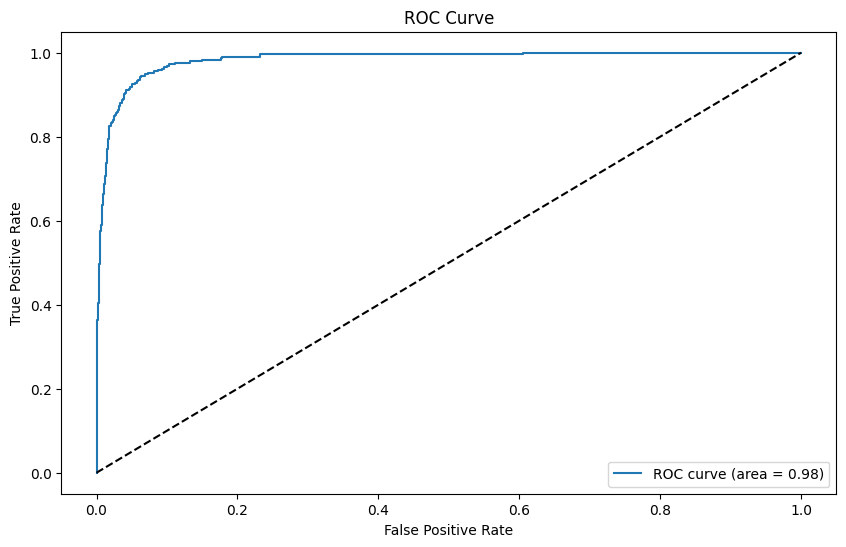

Evaluation Results: {'MSE': 0.24946238088035463, 'Accuracy': 0.8321917808219178, 'Precision': 0.8167229435855741, 'Recall': 0.8321917808219178, 'F1 Score': 0.821481239328565, 'ROC AUC': 0.9796877843527039}


In [44]:
# Assuming 'evaluate_model' is a function you have defined to assess performance
results = evaluate_model(model, test_loader)
print("Evaluation Results:", results)

In [45]:
#store model in .pth file
torch.save(model.state_dict(), 'final_model.pth')